**Machine Learning** 

**Raúl Abraham Nieto Pacheco 51556**

# Proyecto:  Selección de Clientes para campañas de préstamos bancarios.

# Contenido

3. [Introducción](#Introducción)

3. [Descripción del problema](#Descripción del Problema)

4. [Descripción de los datos](#Descripción de los datos) 
     - [Análisis Exploratorio](#Análisis Exploratorio)

5. [Tratamiento de Datos](#Tratamiento de Datos)
      - [Limpieza](#Limpieza)
      
6. [Data Partition](#Data Partition)      
      - [Transformación](#Transformación)
      
7. [Selección de variables](#Selección de variables) 
      - [Correlación](#Correlación)
      - [árboles de decisión](#árboles de decisión) 
      - [ANOVA-Fvalue](#ANOVA-Fvalue)
      - [AUC-variables](#AUC-variables)
      - [PCA](#PCA)

8. [Modelos](#Modelos)
      - [SVM](#SVM)
      - [Regresión Logística](#Regresión Logística)
      - [Naive Bayes](#Naive Bayes)
      - [Redes Neuronales](#Redes Neuronales)
      - [Random Forest](#Random Forest)

9. [Selección del Modelo](#Selección del Modelo)
      - [Cross-validation](#Cross-validation)
      - [Champion Model](#Champion Model)      

10. [Selección del umbral de Clasificación](#Selección del umbral de Clasificación)

11. [Conclusiones](#Conclusiones)

12. [Anexos](#Anexos)

13. [Referencias](#Referencias)

# Introducción



Es bien sabido que el otorgamiento de créditos es uno de los negocios más rentables para los bancos, es por ello que estos asignan mucho presupuesto a la generación de campañas para la colocación de estos dirigidas a clientes y no clientes de tal modo que el objetivo, en el primer caso, además de acrecentar el negocio también es incrementar la fildelidad del cliente con el banco y en el segundo caso hablamos de atraer nuevos clientes con ofertas crediticias atractivas.

Por supuesto, se cuenta con información de clientes actuales y en este caso se pueden crear campañas dirigidas donde esto significa una personalización en el modo de comunicarle la oferta y esto es posible ya que se cuenta  con datos como saldos, créditos, productos, movimientos,etc. del cliente de tal modo que se pueden hacer perfilamientos de estos a través de inferencias estadísticas que nos ayuden a seleccionar a los clientes de tal modo que la respuesta sea máxima y el costo lo menor posible, es decir si  seleccionamos a los “mejores” clientes podemos ahorrar en gastos de comunicación(email, sms, etc.) ya que estaríamos escogiendo a los más propensos a aceptar la oferta.

Entonces, para poder hacer una selección óptima tenemos que encontrar las características más importantes,de los clientes, relacionadas con  la aceptación de un préstamo crediticio, además tomar en cuenta que sea solvente para poder pagarlo,  de tal modo que podamos jerarquizar a cada uno de ellos con respecto a la posibilidad de que acepten la oferta y con ello lograr que la campaña sea exitosa en términos de tasa de aceptación y de costos.

# Descripción del Problema 


Se quiere hacer una campaña para colocar préstamos de crédito para los clientes de un banco, hoy día la selección de estos clientes está basada  en criterios simples como por ejemplo aquellos que de acuerdo con los datos qe se tienen son los que tienen menor liquidez esto conlleva a preguntarse si los clientes seleccionados son los correctos de acuerdo con una métrica como la efectividad de la campaña, entonces es obvio que no se disponen de modelos de cálculo de propensiones para predecir quiénes son los clientes que les interesa contratar los préstamos, entonces como **objetivo: se busca construir un clasificador que pueda mejorar la efectividad de la campaña(1.17%) haciendo una selección inteligente.**

Se realizará un modelo que sea capaz de predecir la propensión que tiene cada cliente de aceptar la campaña. la idea es que este modelo pueda proporcionar una lista de clientes que sean los más adecuados a aceptar los préstamos que el banco les ofrece utilizando una base de datos conformada principalmente por datos de saldos del cliente en el tiempo, así como saldos en los distintos productos de activo y pasivo con los que cuentan hoy dentro del banco, además de variables nominales como el sexo, estado de la república al que pertenece etc.
se tienen poco menos de 100 variables disponibles independientes y una variable dependiente que es la respuesta si los clientes que tenemos en la base han contratado algún préstamo analizando la información del último año, y la idea es que con la construcción de este, podamos calificar a los clientes propensos para aceptar futuras campañas.

Dado el alto número de variables es natural pensar en analizar la reducción de variables para poder hacer el clasificador utilizando el menor número de variables sin perder información, entonces dado que tenemos variables de tipos mixtos vale la pena considerar el uso de pca para reducción de variables numéricas y técnicas de mca para datos categóricos y finalmente utilizar varios algoritmos de clasificación ejemplo el SVM para clasificar  los clientes que son los adecuados para resoder a la campaña.

Finalmente, para crear una conversación comercial tenemos que etiquetar a los clientes de forma que podamos gestionarlos en las campañas de forma distinta, no es suficiente con clasificar quienes son los clientes a acampañar sino además sabemos que dentro de estos existen distintos niveles de propensión entonces es importante saber quién es el cte más y menos propenso a aceptar la oferta para poder comunicar las ofertas de forma priorizada ya que por temas de negocio no se comunican todos los ctes. al mismo tiempo sino por bloques, entonces debemos etiquetar a los ctes. de acuerdo con su propensión de tal modo que se eiqueten como "muy propensos" al bloque de ctes. que se va acomunicar primero, "propensos medios" al segundo bloque etc....
por tanto es necesario traducir la probabilidad o score de los modelos a una etiqueta...

# Descripción de los datos 



Se cuenta con un dataset de 176,330 registros(ctes.) con 92 campos o variables donde existe una variable de identificación de clientes (id2) y una variable respuesta a modelar que es **contrata** la cual es una variable binaria  donde **1** significa que el cte. acepta contratar un préstamo y **0** en otro caso.
La tasa de aceptación general es de **1.17%**  
resumen de tipos de variables **float64(67), int64(13), object(12)** 

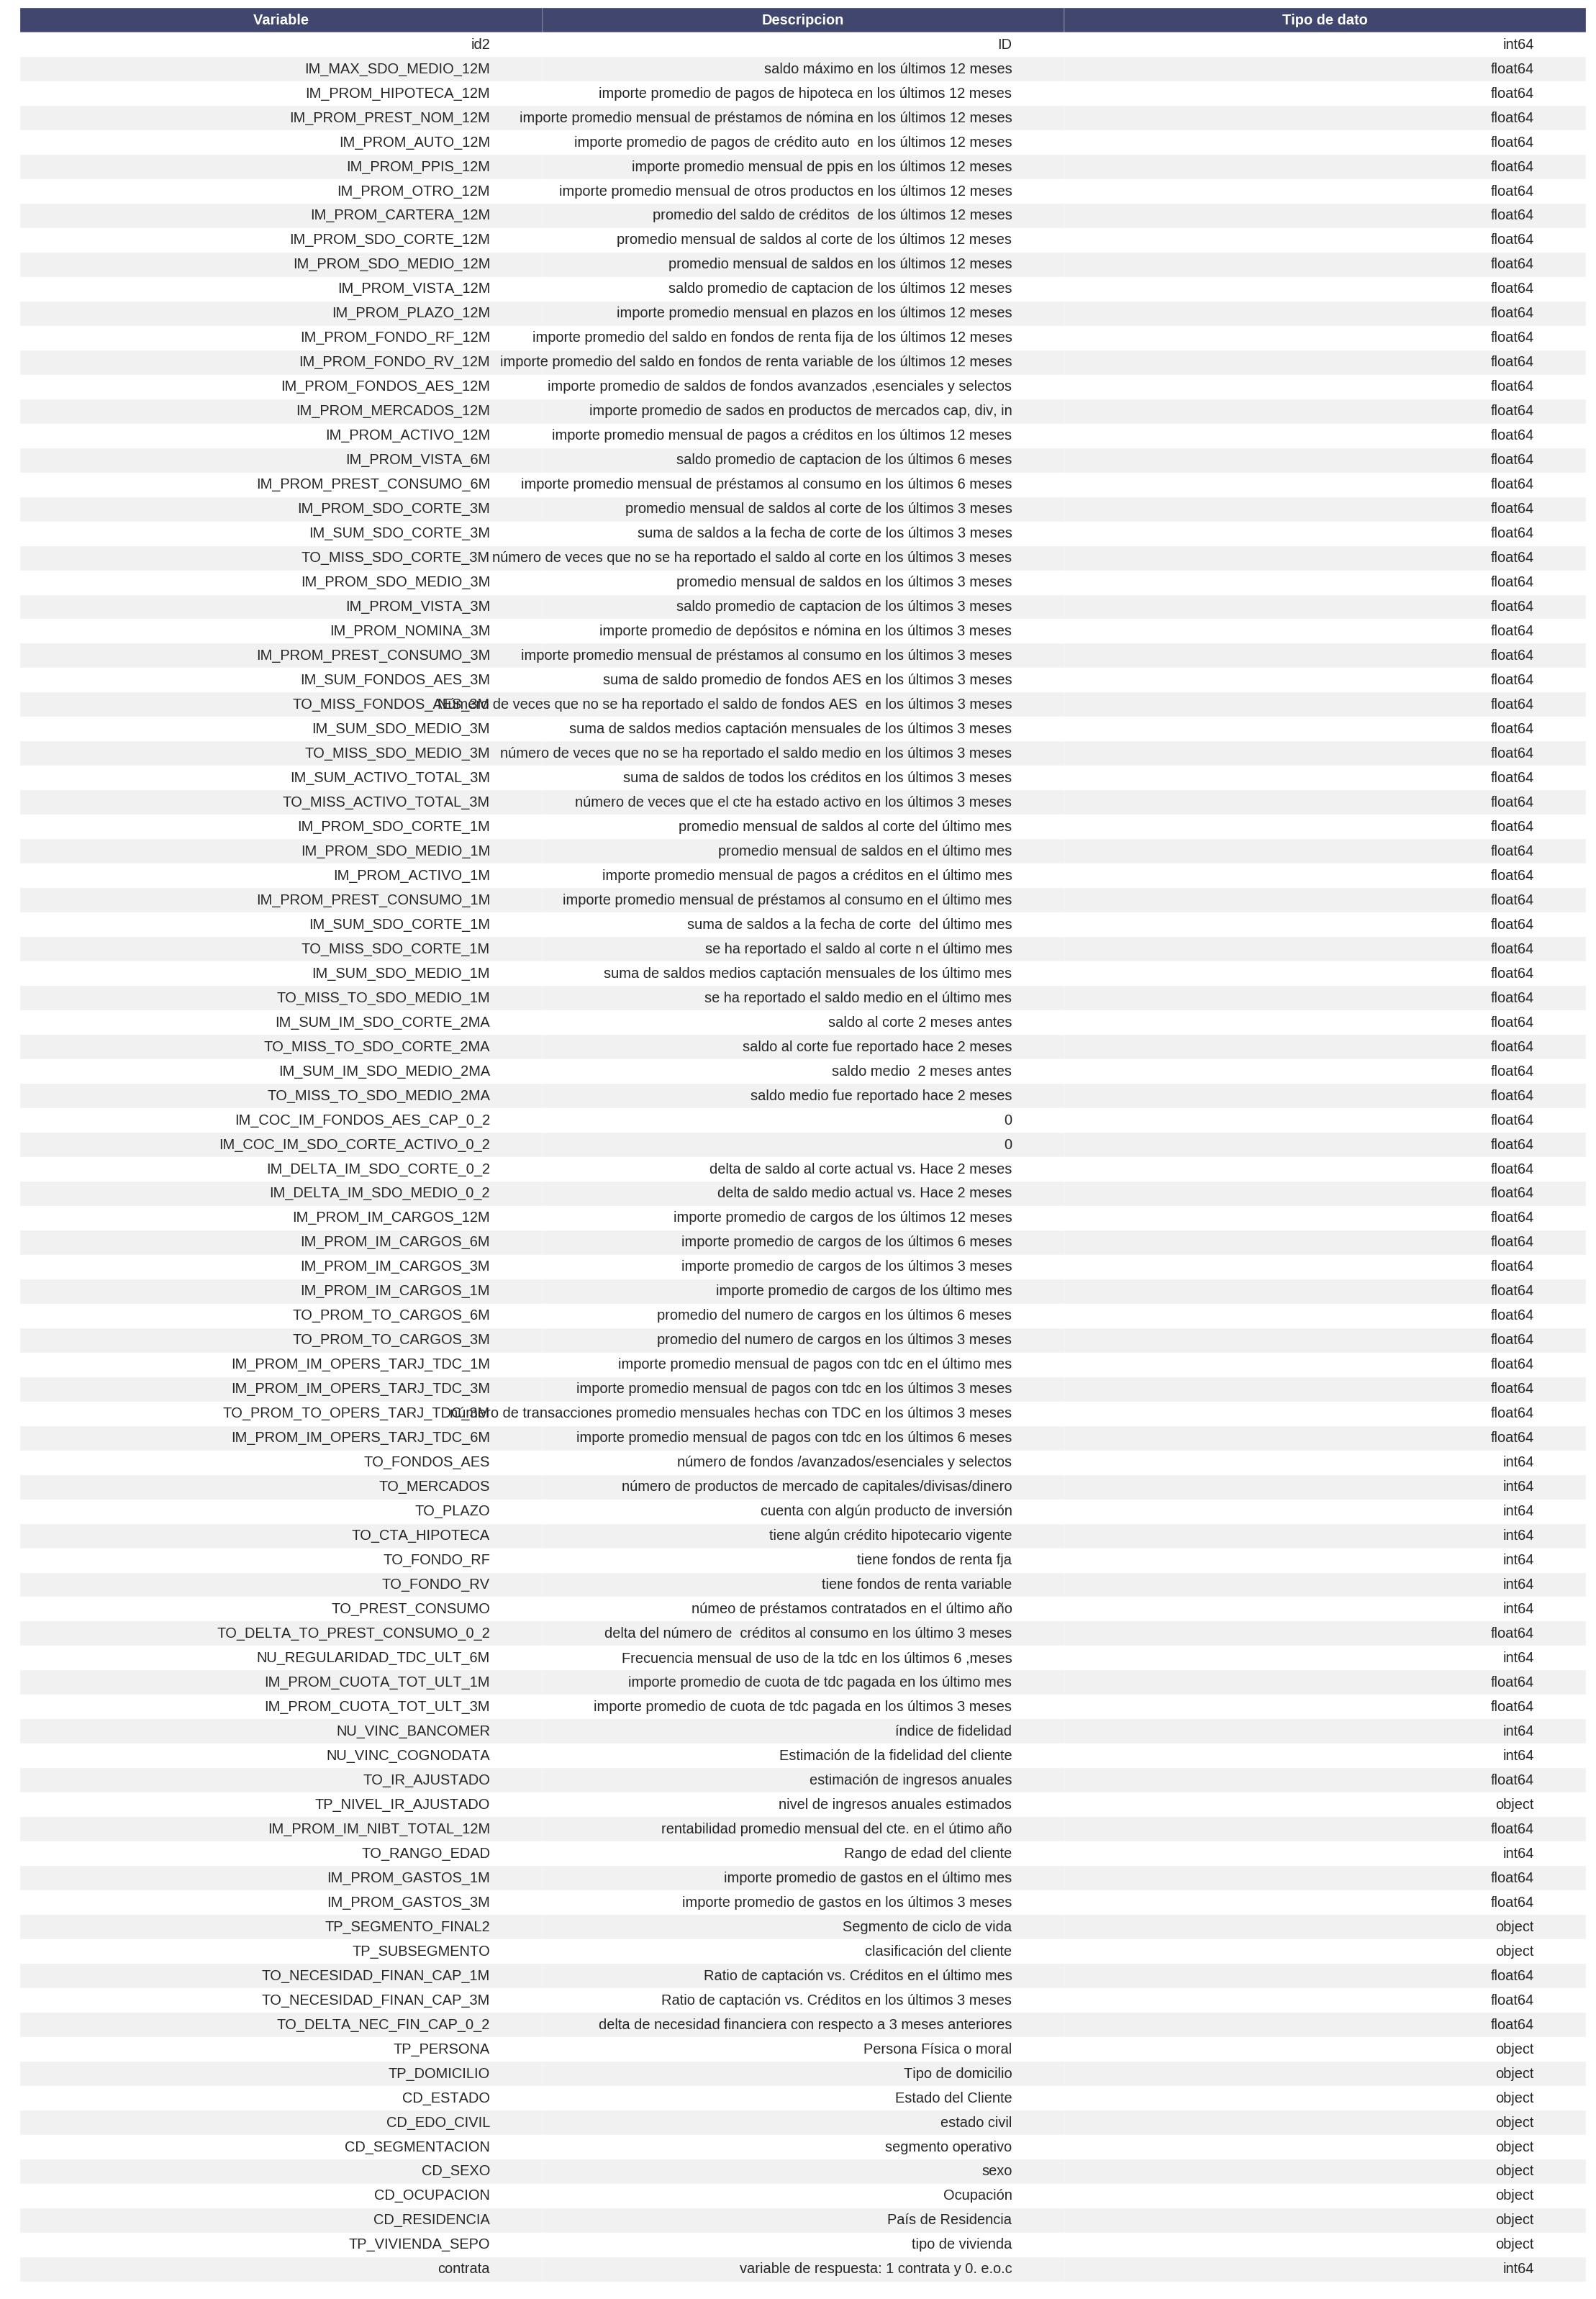

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
import six 
pd.options.display.max_colwidth = 100 
pd.options.display.max_rows = 92
metadata=pd.read_csv('layout_cons.csv',sep=',') 
metadata
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(metadata[['Variable','Descripcion','Tipo de dato']], header_columns=0, col_width=13.0,font_size=20)

**Figura 1.-Descripción de Variables** 

La explicación de las variables se resume en importes de saldos de productos, promedios mensuales de gastos, número promedio de transacciones todo esto visto en diferentes momentos del tiempo en un periodo anual por ejemplo muchas variables como el importe promedio de cargos se analizan a 12, 6 y 3 meses entonces tenemos 3 variables que por obvias razones están correlacionadas (casi siempre).
todo lo anterior se repite para la mayoría de las variables numéricas, en el caso de las categóricas basta revisar cada descripción de estas. 

# Análisis Exploratorio(EDA)



Se carga la información y a continuación vamos a analizar los datos:

In [2]:
df=pd.read_csv('multivsamp.csv',sep=';')
#df.head()


**Variables numéricas:**

In [3]:
vnum=df.select_dtypes(['float64','int64']) 
del vnum['id2'] 
vnum=list(vnum) 
vnom=df.select_dtypes(['object']) 
vnom=list(vnom)
#df[vnum].describe()

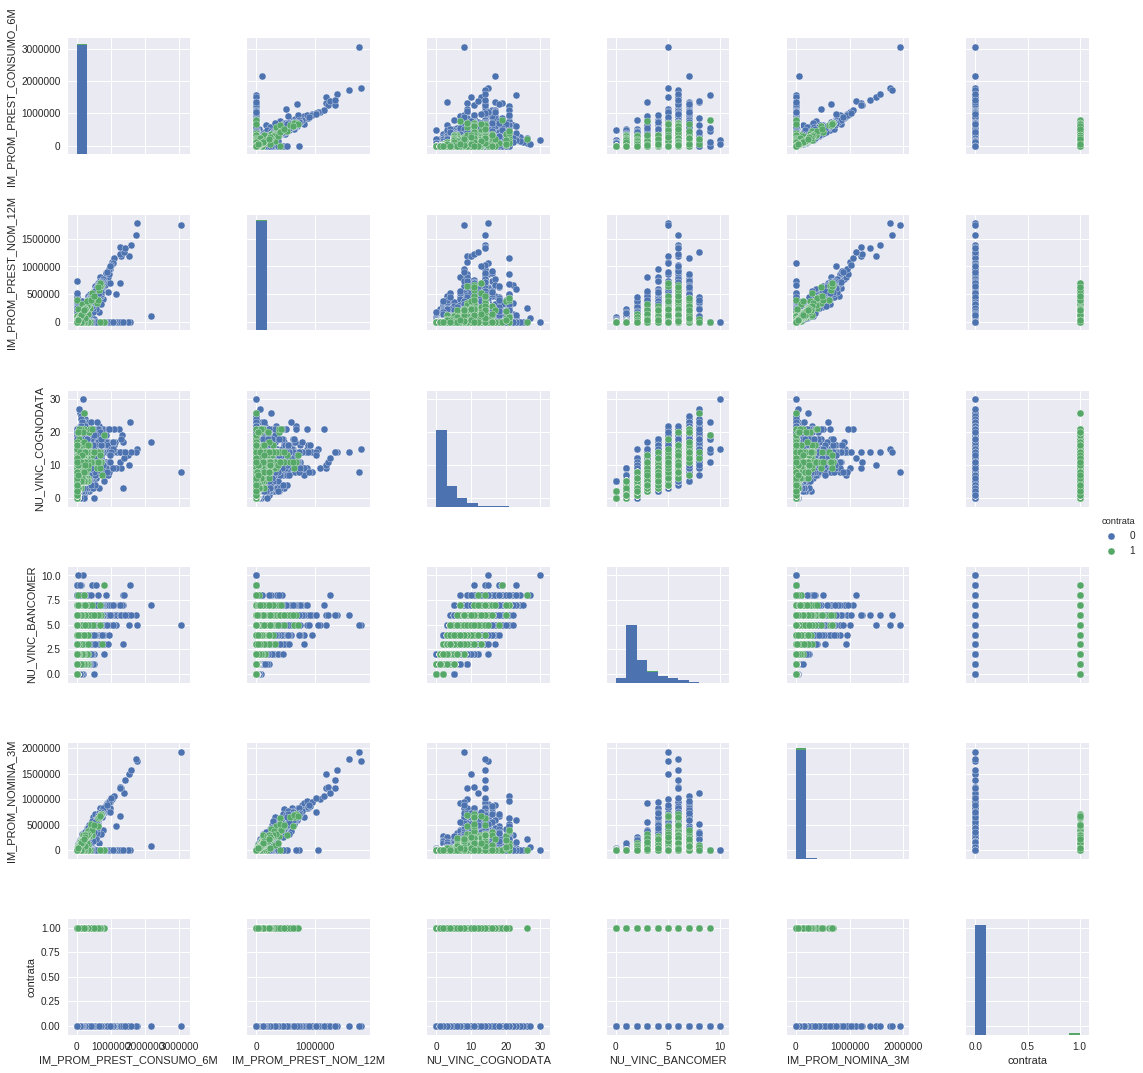

In [4]:
sns.pairplot(df[['IM_PROM_PREST_CONSUMO_6M','IM_PROM_PREST_NOM_12M','NU_VINC_COGNODATA','NU_VINC_BANCOMER','IM_PROM_NOMINA_3M','contrata']], hue='contrata')

**Figura 2.- Pairplot de algunas variables numéricas**.-El resto de las variables se pueden ver en el  [Anexo1](#Anexo1).



De acuerdo con las distribuciones de las variables numéricas podemos ver que la mayoría de estas se carga hacia el cero esto se da porque muchas de las variables son saldos e importes de productos con los que quizás no cuenta el cliente así que para todos aquellos que no tengan dicho producto el dato será 0, por ejemplo veamos IM_PROM_NOMINA_3M donde la mayoría de los valores es cero, pero lo que esto signfica es que existen muchos clientes que no tienen nómina del banco entonces todos estos no pueden tener un saldo por eso es 0.
Además no se ve muy claro alguna variables que discrimine un poco las contrataciones.
Otro dato importante es que las variables están muy correlacionadas ya que muchas son la misma variable vista en distintos momentos.

**Variables nominales:**

In [5]:
df[vnom].describe()
a=df[vnom].describe()

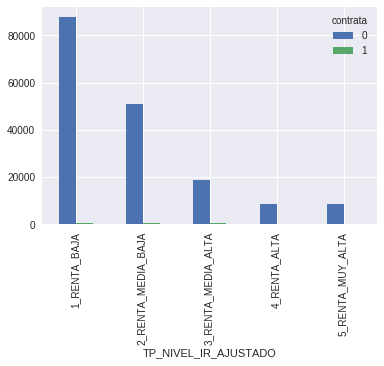

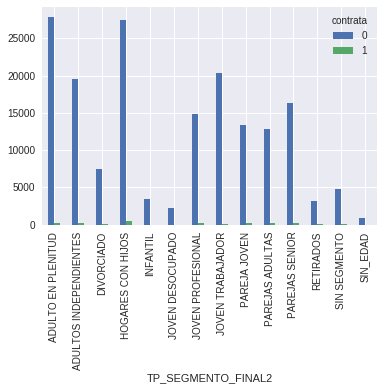

In [6]:
for w in vnom[0:2]:
    a=df.groupby([w,'contrata']).size()
    a=a.unstack()
    a.plot(kind='bar')

**Figura 3.-Gráfica de Frecuencias de variables categóricas**. El resto de las variables se pueden observar en el [Anexo2](#Anexo2).



En general podemos ver los siguientes hallazgos, la variable TP_NIVEL_IR_AJUSTADO en realidad no es nominal es una variable ordinal ya que el 5 representa intervalo más alto de ingresos estimados anuales y el 1 el menor(**Figura 3**).
La variable TP_PERSONA sólo tiene una categoría por tanto no sirve para el modelado,casi igual tp_domicilio, CD_RESIDENCIA y TP_VIVIENDA_SEPO, por otro lado no se discriminan las contrataciones prácticamnte en ninguna variable. 

# Tratamiento de Datos


Analizando la completez de los datos vamos a hacer un mapa de missings para revisar que tan completa está nuestra información...

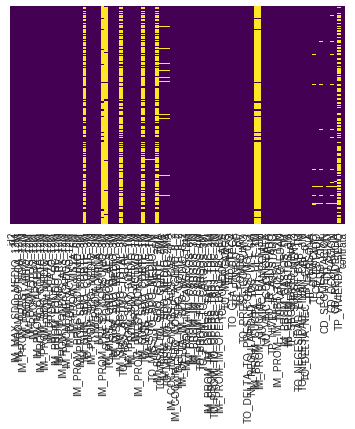

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Figura 4.-Mapa de Datos con todas las variables**. En amarillo se muestran los valores ausentes por variable.



Como podemos observar existen varias variables que contienen una importante cantidad de valores ausentes(**Figura 4**), por tanto vamos a valorar a que variables deben imputarse y/o eliminarse bajo otros criterios, en este caso los datos ausentes, para el caso de las variables numéricas, significa que los ctes. no tienen, en la gran mayoría de los casos, el producto al que se hace referencia o que no tienen el dato reportado, pero en este caso esos ejemplos serán reemplazados por 0 ya que no afectan el significado del problema.

Vamos a cambiar el tipo de datos de algunas variables para hacer que tengan sentido de forma natural, primero cambiaremos el tipo de variable de TP_NIVEL_IR_AJUSTADO de categórica a ordinal.
Además,las variables NU_VINC_COGNODATA y NU_VINC_BANCOMER las haremos continuas en lugar de enteras o integers.

In [8]:
mapper = {1: '1_RENTA_BAJA', 2: '2_RENTA_MEDIA_BAJA', 3: '3_RENTA_MEDIA_ALTA', 
          4: '4_RENTA_ALTA', 3: '5_RENTA_MUY_ALTA'}
ordvar = df['TP_NIVEL_IR_AJUSTADO'].replace(mapper)

df['TP_NIVEL_IR_AJUSTADO']=pd.factorize(ordvar)[0]


# Limpieza 

**Descripción variables numéricas**

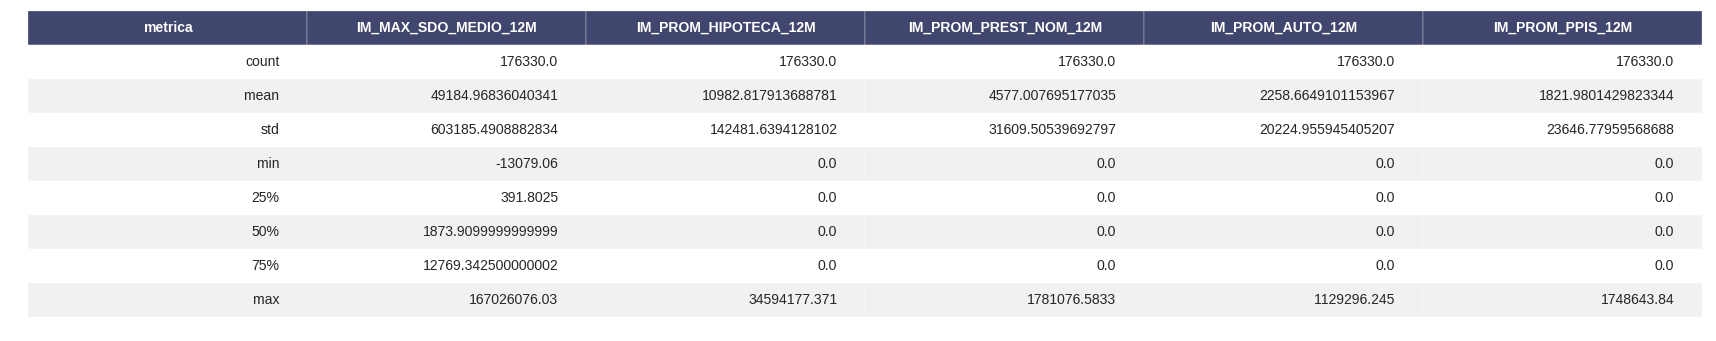

In [9]:
df['NU_VINC_BANCOMER']=df['NU_VINC_BANCOMER'].astype('float64') 
df['NU_VINC_COGNODATA']=df['NU_VINC_COGNODATA'].astype('float64')
w=df[vnum[0:5]].describe()
w['metrica']=w.index 
w=w[['metrica','IM_MAX_SDO_MEDIO_12M','IM_PROM_HIPOTECA_12M','IM_PROM_PREST_NOM_12M','IM_PROM_AUTO_12M','IM_PROM_PPIS_12M']]
render_mpl_table(w, header_columns=0, col_width=5.0,font_size=14)

**Figura 5.-Estadisticos de algunas variables numéricas** 



Se muestra el sumarizado de las variables numéricas dado que no se muestran todas por el número que hay vamos a buscar aquellas que no aporten valor a la variable de respuesta entonces si encontramos variables donde su máximo sea igual a su mínimo entonces el valor de la variable es único y se deben eliminar. 

In [10]:
a=df.describe()
w=a.loc['max']==a.loc['min']
w[w==True].index

Index(['TO_MISS_SDO_MEDIO_3M', 'TO_MISS_TO_SDO_MEDIO_1M',
       'TO_MISS_TO_SDO_MEDIO_2MA'],
      dtype='object')

Estas 3 variables tienen un sólo valor por tanto vamos a eliminarlas del dataset. 

Luego para aquellas variables que tienen en su gran mayoría ceros en sus datos  es decir por ejemplo que su cuartíl 1 y cuartíl 3 son iguales a 0 vamos a crear variables pseudobinarias ya que lo que en realidad el significado de tener un dato mayor que cero significa que el cliente posee el producto en algunos y en otros que el dato ha sido informado por tanto hace más setido utilizarlos así.

In [11]:
a=df.describe()
w=(a.loc['25%']+a.loc['75%'])==0
L=w[w==True].index
for i in L:
    if i!='contrata':
        df[i]=df[i].apply(lambda x: 1 if x>0 else 0)

In [12]:
ct=df.select_dtypes(['int64']) 
ent=list(ct)

In [13]:
cat=df.select_dtypes(['object']) 
nom=list(cat)

**Descripción variables categóricas**

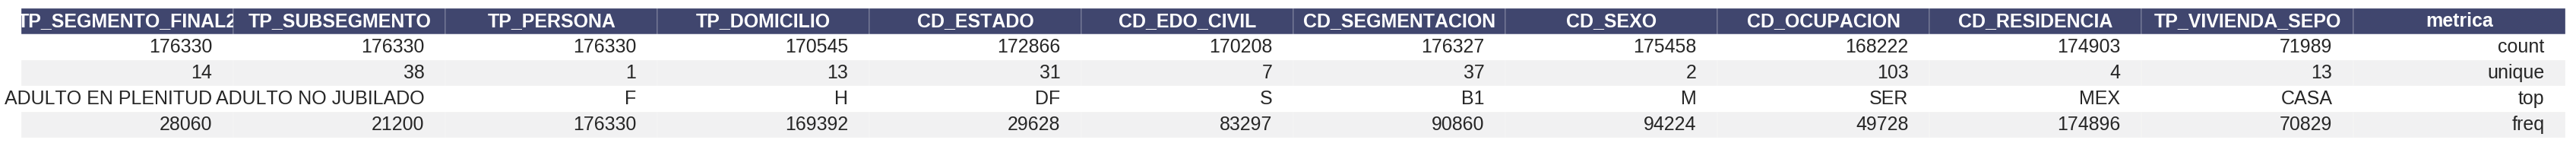

In [14]:
f=df[nom].describe()
f['metrica']=f.index 
render_mpl_table(f, header_columns=0, col_width=5.0,font_size=25)

**Figura 6.-Estadísticos de las variables categóricas**. Los estadísticos se muestran en la variable métrica.



Al revisar las variables categóricas podemos ver que por ejemplo la variable tipo de persona (TP_PERSONA) tiene 1 sólo valor(**Figura 6**) por tanto esta variable debe ser descartada ya que no aportará valor al modelo, la variable CD_RESDENCIA muestra que casi todos los ctes. viven México lo cual es obvio dado que es un banco mexicano por tanto esta variable tampoco se utilizará mismo caso de la variable TP_VIVIENDA_SEPO que además cuenta con más del 60% de los valores ausentes(**Figura 7**).
TP_DOMICILIO también se elimina ya que prácticamente todos los ctes. reportan que el domicilio que tienen dado de alta es su hogar.

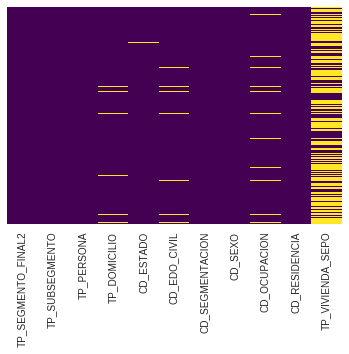

In [15]:
sns.heatmap(df[nom].isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Figura 7.-Mapa de Datos con variables categóricas.** En amarillo se muestran los valores ausentes por variable.



Se eliminan las variables comentadas: 

TP_PERSONA,CD_RESIDENCIA,TP_VIVIENDA_SEPO,TP_DOMICILIO,TO_MISS_SDO_MEDIO_3M,
TO_MISS_TO_SDO_MEDIO_1M y TO_MISS_TO_SDO_MEDIO_2MA.

In [16]:
del df['TP_PERSONA']
del df['CD_RESIDENCIA']
del df['TP_VIVIENDA_SEPO']
del df['TP_DOMICILIO']
del df['TO_MISS_SDO_MEDIO_3M']
del df['TO_MISS_TO_SDO_MEDIO_1M']
del df['TO_MISS_TO_SDO_MEDIO_2MA']

# Data Partition

Vamos hacer nuestra partición de datos donde ocuparemos el 80% de la base para entrenar nuestros modelos y el otro 20% como dataset de validación, este dataframe de validación sólo se usará para ver **RESULTADOS** finales.
A partir de este punto todo el tratamiento de datos que se le haga al entrenamiento también se hará con dataset de validación.

In [140]:
features=['IM_MAX_SDO_MEDIO_12M','IM_PROM_HIPOTECA_12M','IM_PROM_PREST_NOM_12M','IM_PROM_AUTO_12M',
'IM_PROM_PPIS_12M','IM_PROM_OTRO_12M','IM_PROM_CARTERA_12M','IM_PROM_SDO_CORTE_12M','IM_PROM_SDO_MEDIO_12M',
'IM_PROM_VISTA_12M','IM_PROM_PLAZO_12M','IM_PROM_FONDO_RF_12M','IM_PROM_FONDO_RV_12M','IM_PROM_FONDOS_AES_12M',
'IM_PROM_MERCADOS_12M','IM_PROM_ACTIVO_12M','IM_PROM_VISTA_6M','IM_PROM_PREST_CONSUMO_6M','IM_PROM_SDO_CORTE_3M',
'IM_SUM_SDO_CORTE_3M','TO_MISS_SDO_CORTE_3M','IM_PROM_SDO_MEDIO_3M','IM_PROM_VISTA_3M','IM_PROM_NOMINA_3M',
'IM_PROM_PREST_CONSUMO_3M','IM_SUM_FONDOS_AES_3M','TO_MISS_FONDOS_AES_3M','IM_SUM_SDO_MEDIO_3M','IM_SUM_ACTIVO_TOTAL_3M',
'TO_MISS_ACTIVO_TOTAL_3M','IM_PROM_SDO_CORTE_1M','IM_PROM_SDO_MEDIO_1M','IM_PROM_ACTIVO_1M','IM_PROM_PREST_CONSUMO_1M',
'IM_SUM_SDO_CORTE_1M','TO_MISS_SDO_CORTE_1M','IM_SUM_SDO_MEDIO_1M','IM_SUM_IM_SDO_CORTE_2MA','TO_MISS_TO_SDO_CORTE_2MA',
'IM_SUM_IM_SDO_MEDIO_2MA','IM_COC_IM_FONDOS_AES_CAP_0_2','IM_COC_IM_SDO_CORTE_ACTIVO_0_2','IM_DELTA_IM_SDO_CORTE_0_2',
'IM_DELTA_IM_SDO_MEDIO_0_2','IM_PROM_IM_CARGOS_12M','IM_PROM_IM_CARGOS_6M','IM_PROM_IM_CARGOS_3M','IM_PROM_IM_CARGOS_1M',
'TO_PROM_TO_CARGOS_6M','TO_PROM_TO_CARGOS_3M','IM_PROM_IM_OPERS_TARJ_TDC_1M','IM_PROM_IM_OPERS_TARJ_TDC_3M',
'TO_PROM_TO_OPERS_TARJ_TDC_3M','IM_PROM_IM_OPERS_TARJ_TDC_6M','TO_FONDOS_AES','TO_MERCADOS','TO_PLAZO',
'TO_CTA_HIPOTECA','TO_FONDO_RF','TO_FONDO_RV','TO_PREST_CONSUMO','TO_DELTA_TO_PREST_CONSUMO_0_2','NU_REGULARIDAD_TDC_ULT_6M',
'IM_PROM_CUOTA_TOT_ULT_1M','IM_PROM_CUOTA_TOT_ULT_3M','NU_VINC_BANCOMER','NU_VINC_COGNODATA','TO_IR_AJUSTADO',
'TP_NIVEL_IR_AJUSTADO','IM_PROM_IM_NIBT_TOTAL_12M','TO_RANGO_EDAD','IM_PROM_GASTOS_1M','IM_PROM_GASTOS_3M',
'TP_SEGMENTO_FINAL2','TP_SUBSEGMENTO','TO_NECESIDAD_FINAN_CAP_1M','TO_NECESIDAD_FINAN_CAP_3M','TO_DELTA_NEC_FIN_CAP_0_2',
'CD_ESTADO','CD_EDO_CIVIL','CD_SEGMENTACION','CD_SEXO','CD_OCUPACION']

In [18]:
#ad=np.random.randint(4)
#ad

In [142]:
from sklearn.cross_validation import train_test_split 
X=df[features]#df[feat_AUC]
y=df['contrata'] 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)#ad=0
print('La densidad del set de test es: 1.17%')

La densidad del set de test es: 1.17%


In [20]:
pd.options.mode.chained_assignment = None  # default='warn'
#X_train['contrata']

Los valores para las variables categóricas se reemplazan por la categorías más frecuentes en cada una de ellas y

In [21]:
cat=X_train.select_dtypes(['object']) 
nom=list(cat)
for v in nom:
    dat=X_train[v].describe()[2]
    X_train[v]=X_train[v].fillna(dat)
    X_test[v]=X_test[v].fillna(dat)
    

In [22]:
#X_train['contrata']

In [23]:
cat=X_train.select_dtypes(['object']) 
nom=list(cat)

In [24]:
#a=df[nom].fillna(df.mode())
#sns.heatmap(df[nom].isnull(),yticklabels=False,cbar=False,cmap='viridis')
#X_train['contrata']

Para valores numéricos vamos a imputar los missings con ceros y

In [25]:
cont=X_train.select_dtypes(['float64'])          
num=list(cont)
X_train[num]=X_train[num].fillna(0)
X_test[num]=X_test[num].fillna(0)

ct=X_train.select_dtypes(['int64']) 
#del ct['id2'] 
#del ct['contrata']         
ent=list(ct)
X_train[ent]=X_train[ent].fillna(0)
X_test[ent]=X_test[ent].fillna(0)

In [26]:
#X_train['contrata']


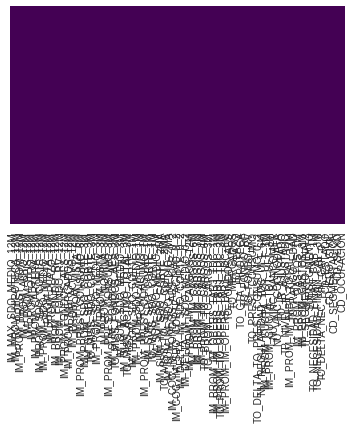

In [27]:
sns.heatmap(X_test.isnull(),yticklabels=False,cbar=False,cmap='viridis') #quitar esta

Finalmente tenemos todos los valores ausentes imputados y la variables irrelevantes omitidas.

# Transformación


Vamos  a explorar las variables con respecto al target de contratación para analizar  datos como la distribución de las variables y su relación con la variable 'contrata'(**Variable respuesta**) así como identificar qué variables requieren transformaciones o quizás cuales de ellas están muy correlacionadas no sin antes normalizarlas en el caso continuo para hacerlas comparables además de evitar problemas de escala y transformar las variables categóricas en númericas de alguna manera, para que estas últimas se puedan utilizar como inputs en los modelos.

**Estandarización y normalización de variables numéricas:** 
Además de estandarizar las variables restando su media y dividiendo por su desviacón estándar, vamos a normalizarlas aplicando una versión del logaritmo natural $sign(x)*ln(|x|+1)$, esto para respetar el signo ya quetenemos variables con datos negativos, a cada una de ellas de tal modo que las variables numéricas se distribuyen y correlacionan como en la **Figura 8**.

<span style="color:red; font-family:Georgia; font-size:1.5em;">**En este paso estandarizamos los datos de test usando la media y desviación del entrenamiento y aplicamos la versión del logaritmo en ambas particiones.**</span>


In [28]:
from sklearn import preprocessing 
scalerx = preprocessing.StandardScaler().fit(X_train[num])
X_train[num]=scalerx.transform(X_train[num])
X_test[num]=scalerx.transform(X_test[num])
    

In [29]:
#X_train['contrata']


In [30]:
#%%time
import math 
for w in num:
    X_train[w]=X_train[w].apply(lambda x: np.sign(x)*math.log(abs(x)+1))
    X_test[w]=X_test[w].apply(lambda x: np.sign(x)*math.log(abs(x)+1))

In [31]:
#X_train['contrata']

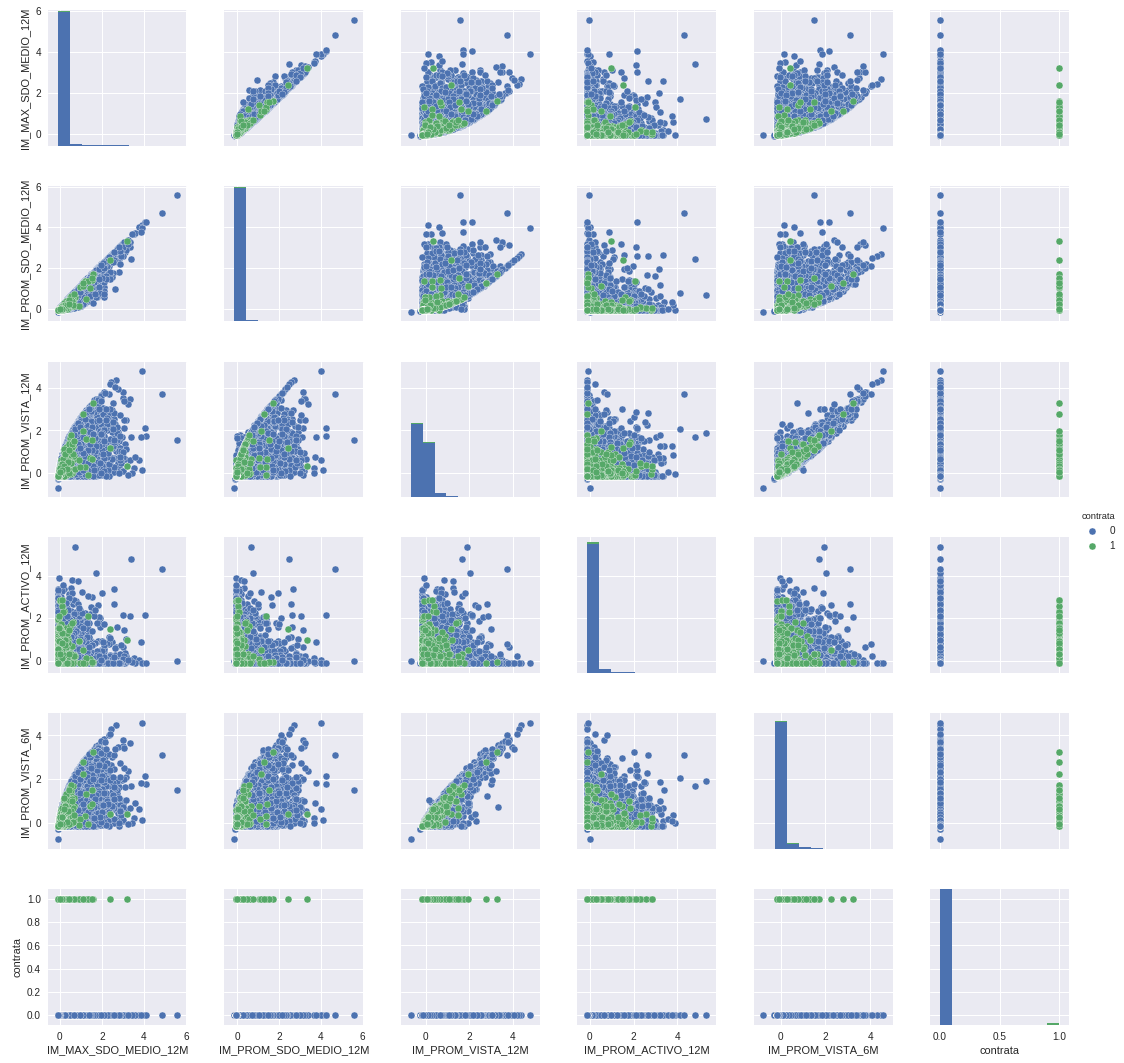

In [32]:
aux=X_train
aux['contrata']=y_train
sns.pairplot(aux[num[0:5]+['contrata']], hue='contrata')

In [33]:
del X_train['contrata']
#X_train['contrata']

**Figura 8.- pairplot de variables estandarizadas y normalizadas usando logaritmo natural.** El resto de variables se pueden observar en el [Anexo3](#Anexo3).



Con las variables numéricas normalizadas y los datos limpios es más clara la correlación que existe entre varias de ellas.

**Reagrupación de categorías**.

Al revisar las categorías vemos que la mayoría de los clientes se concentran en pocas categorías por tanto vamos a reagrupar para tener menor número de categorías donde aplique.
Reagrupación de variables categóricas: 

CD_OCUPACION  se agupan: OTR=${x:x\in[SER,EPL,EDU,VTA,PEN]}$ 
  
CD_SEGMENTACION se agrupan: OT=${x:x\not\in [B1,R1]}$

CD_EDO_CIVIL se agrupan: O=${x:x\not\in[S,C]}$

CD_ESTADO se agrupan: OT=${x:x\not\in[DF,EM,JA,VE,PU,GU]}$

TP_SUBSEGMENTO se grupan: OTROSEGM= ${x:x\not\in}$[ADULTO NO JUBILADO,ADULTO INDEPENDIENTE,JOVEN TRABAJADOR,PAREJAS SENIOR,PAREJA JOVEN,JOVEN PROFESIONAL] 


TP_SEGMENTO_FINAL2 se agrupan: OTROSEGM=${x:x\not\in}$[ADULTO EN PLENITUD,HOGARES CON HIJOS,JOVEN TRABAJADOR,ADULTOS INDEPENDIENTES]
 
**El resto de categorías de cada variable  permanece igual.**

In [34]:
#all strings in numeric
for nm in nom:
    cabin_tab = pd.crosstab(index=X_train[nm],  # Make a crosstab
                        columns="count")              # Name the count column
    #print(cabin_tab.sort_values(by='count',ascending=False)/cabin_tab.sum()) 
    #sns.countplot(x=nm,data=df)
    

<span style="color:red; font-family:Georgia; font-size:1.5em;">**En este paso también reagrupamos las variables de test usando la forma que usamos en train.**</span>

In [35]:
X_train['CD_OCUPACION']=X_train['CD_OCUPACION'].apply(lambda x: 'OTR' if not x in ['SER','EPL','EDU','VTA','PEN'] else x) 
X_train['CD_OCUPACION'].unique()  
X_train['CD_SEGMENTACION']=X_train['CD_SEGMENTACION'].apply(lambda x: 'OT' if not x in ['B1','R1'] else x) 
X_train['CD_SEGMENTACION'].unique()  
X_train['CD_EDO_CIVIL']=X_train['CD_EDO_CIVIL'].apply(lambda x: 'O' if not x in ['S','C'] else x) 
X_train['CD_EDO_CIVIL'].unique() 
X_train['CD_ESTADO']=X_train['CD_ESTADO'].apply(lambda x: 'OT' if not x in ['X_train','EM','JA','VE','PU','GU'] else x) 
X_train['CD_ESTADO'].unique() 
X_train['TP_SUBSEGMENTO']=X_train['TP_SUBSEGMENTO'].apply(lambda x: 'OTROSEGM' if not x 
in ['ADULTO NO JUBILADO','ADULTO INDEPENDIENTE','JOVEN TRABAJADOR','PAREJAS SENIOR','PAREJA JOVEN','JOVEN PROFESIONAL'] else x) 
X_train['TP_SUBSEGMENTO'].unique() 

X_train['TP_SEGMENTO_FINAL2']=X_train['TP_SEGMENTO_FINAL2'].apply(lambda x: 'OTROSEGM' if not x 
in ['ADULTO EN PLENITUD','HOGARES CON HIJOS','JOVEN TRABAJADOR','ADULTOS INDEPENDIENTES'] else x) 
X_train['TP_SEGMENTO_FINAL2'].unique() 

#test..........................
X_test['CD_OCUPACION']=X_test['CD_OCUPACION'].apply(lambda x: 'OTR' if not x in ['SER','EPL','EDU','VTA','PEN'] else x) 
X_test['CD_OCUPACION'].unique()  
X_test['CD_SEGMENTACION']=X_test['CD_SEGMENTACION'].apply(lambda x: 'OT' if not x in ['B1','R1'] else x) 
X_test['CD_SEGMENTACION'].unique()  
X_test['CD_EDO_CIVIL']=X_test['CD_EDO_CIVIL'].apply(lambda x: 'O' if not x in ['S','C'] else x) 
X_test['CD_EDO_CIVIL'].unique() 
X_test['CD_ESTADO']=X_test['CD_ESTADO'].apply(lambda x: 'OT' if not x in ['X_test','EM','JA','VE','PU','GU'] else x) 
X_test['CD_ESTADO'].unique() 
X_test['TP_SUBSEGMENTO']=X_test['TP_SUBSEGMENTO'].apply(lambda x: 'OTROSEGM' if not x 
in ['ADULTO NO JUBILADO','ADULTO INDEPENDIENTE','JOVEN TRABAJADOR','PAREJAS SENIOR','PAREJA JOVEN','JOVEN PROFESIONAL'] else x) 
X_test['TP_SUBSEGMENTO'].unique() 

X_test['TP_SEGMENTO_FINAL2']=X_test['TP_SEGMENTO_FINAL2'].apply(lambda x: 'OTROSEGM' if not x 
in ['ADULTO EN PLENITUD','HOGARES CON HIJOS','JOVEN TRABAJADOR','ADULTOS INDEPENDIENTES'] else x) 
X_test['TP_SEGMENTO_FINAL2'].unique() 


array(['OTROSEGM', 'ADULTO EN PLENITUD', 'ADULTOS INDEPENDIENTES',
       'JOVEN TRABAJADOR', 'HOGARES CON HIJOS'], dtype=object)

Después de reagrupar las variables categóricas vamos recodificarlas para convertirlas en variables numéricas, entonces para esto vamos a crear variables binarias para cada variable por cada categoría de tal modo que entonces ahora contamos en total con 110  variables y 108  que pueden ser inputs de nuestros modelos(ya que la variable target 'contrata' y el 'id2' no pueden ser inputs).

In [36]:
for nm in nom:
    X_train = pd.concat([X_train,pd.get_dummies(X_train[nm], prefix=nm).astype("int64")],axis=1)
    X_test = pd.concat([X_test,pd.get_dummies(X_test[nm], prefix=nm).astype("int64")],axis=1)
    del X_train[nm] 
    del X_test[nm]

**Datos de entrenamiento:**

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141064 entries, 144762 to 43567
Columns: 108 entries, IM_MAX_SDO_MEDIO_12M to CD_OCUPACION_VTA
dtypes: float64(40), int64(68)
memory usage: 117.3 MB


**Datos de prueba:**

In [38]:
X_test.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35266 entries, 51853 to 175971
Columns: 108 entries, IM_MAX_SDO_MEDIO_12M to CD_OCUPACION_VTA
dtypes: float64(40), int64(68)
memory usage: 29.3 MB


Dado que la tenemos muchas variables que son la misma sólo que vistas en diferentes momentos en el tiempo entonces es natural pensar en que tengamos variables correlacionadas(**Figura 9**) por tanto mirando la matriz de correlaciones podemos observar que tenemos muchas variables correlacionadas y cuando esto sucede significa redundancia de información por tanto es importante tratar de reducir dimensionalidad y para esto vamos a hacerlo utilizando la técnica de componentes principales como una de las posibles formas de seleccionar variables.

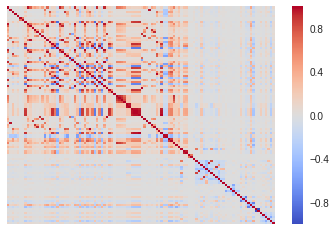

In [39]:
cont=X_train.select_dtypes(['float64','int64']) 
#del cont['id2'] 
#del cont['contrata']         
num=list(cont) 
features=num
tc=X_train[features].corr()
sns.heatmap(tc,annot=False,cmap='coolwarm',yticklabels=False,xticklabels=False)

**Figura 9.-Matriz de correlaciones entre variables.** 



# Selección de variables


Para la selección de variables vamos a probar 5 formas distintas de seleccionar las variables más importantes y luego en la parte del modelado veremos cual selección es la que mejores resultados nos da utilizando los mismos modelos:



# Correlación


Vamos a analizar la correlación de cada variable con respecto a nuestra variable target y así definir cuales son las variables que más relevancia tienen para modelar nuestro evento de tal modo que descartemos aquellas que no nos dan información. 

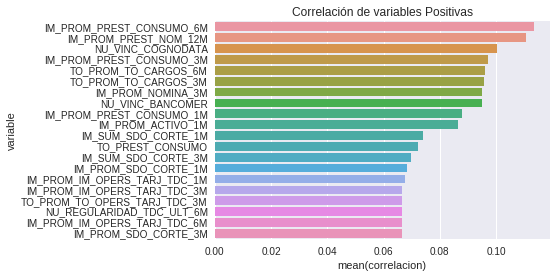

CPU times: user 188 ms, sys: 252 ms, total: 440 ms
Wall time: 152 ms


In [40]:
tabcor=pd.DataFrame(features,columns=[['variable']])
tabcor['correlacion']=0
j=0
for i in tabcor['variable']:
    tabcor['correlacion'].iloc[j]=np.corrcoef(X_train[i], y_train)[1][0]
    j=j+1 
#tabcor=pd.Dataframe(features,a,colnames=[['variable','correlacion']])
tabcor.sort_values(by='correlacion',ascending=False)
ax = plt.axes()
sns.barplot(y='variable',x='correlacion',data=tabcor.sort_values(by='correlacion',ascending=False)[0:20])
ax.set_title('Correlación de variables Positivas')
%time plt.show()

**Figura 10.- Lista de variables más correlacionadas con el target positivamente** 



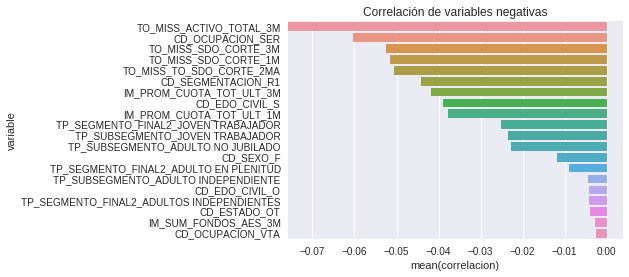

In [41]:
ax = plt.axes()
sns.barplot(y='variable',x='correlacion',data=tabcor.sort_values(by='correlacion',ascending=True)[0:20])
ax.set_title('Correlación de variables negativas')
plt.show()

**Figura 11.-Lista de variables más correlacionadas con el target negativamente** El mapa completo de las variabes se puede ver en el [Anexo4](#Anexo4).



Podemos ver que dentro de las variables más correlacionadas con las contrataciones de préstamos tenemos NU_VINC_COGNODATA que es una variable que significa a grandes rasgos el número de productos del banco con los que cuenta el cliente y la relación es positiva(**Figura 10**) "a mayor productos" mayor propensión a contratar.
La variable TO_MISS_ACTIVO_TOTAL_3M es la más correlacionada negativamente(**Figura 11**), es decir a mayor número de meses que el cliente no ha estado activo menor probabilidad tendrá de contratar el crédito.



**Vamos a seleccionar aquellas variables que tengan una correlación mínima de 0.05 en valor absoluto**

In [42]:
import math
a=tabcor.sort_values(by='correlacion',ascending=False)
#a[abs(a['correlacion'])>0.05]

In [43]:
feat_corr=a[abs(a['correlacion'])>0.05]['variable']
len(feat_corr)

32

de tal modo que obtenemos 32 variables con mayor correlación con la contratación de préstamos.

Las variables se pueden observar en el [Anexo5](#Anexo5).

# árboles de decisión(Random Forest)




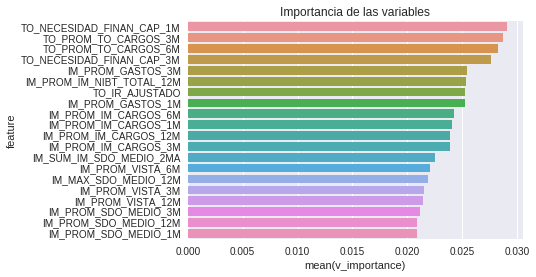

In [44]:
from sklearn.ensemble import ExtraTreesClassifier 
def discrete_to_matrix(df=None, var_name=None, class_name=None):
    vector_bin = df[var_name]
    bin_mtx = pd.get_dummies(vector_bin)
    bin_class = df[class_name]
    return bin_mtx, bin_class


def var_importance(bin_mtx=None,bin_class=None, n_tree=10): 
    modelo = ExtraTreesClassifier(n_estimators = n_tree)
    modelo.fit(bin_mtx, bin_class)
    var_imp = pd.DataFrame({
    'feature': bin_mtx.columns.values.tolist(),
    'v_importance' : modelo.feature_importances_.tolist()})
    var_imp = var_imp.sort_values(by = 'v_importance', ascending=False)
    return var_imp
dfs=X_train.sample(frac=0.1, replace=True)
var_importance(bin_mtx=X_train[features],bin_class=y_train, n_tree=50)

ax = plt.axes()
sns.barplot(y='feature',x='v_importance',data=var_importance(bin_mtx=
                X_train[features],bin_class=y_train, n_tree=50)[0:20])
ax.set_title('Importancia de las variables')
plt.show()               

**Figura 12.-Nivel de importancia de las variables a partir de árboles** 



A diferencia de la correlación cuando usamos un estilo de random forest con 50 árboles las variables más importantes con respecto a nuestro evento vemos que ninguna variable sobresale demasiado por tanto(**Figura 12**) la información está muy distribuída entre varias variables pero también sabemos que existe mucha redundancia de información.

In [45]:
b=var_importance(bin_mtx=X_train[features],bin_class=y_train, n_tree=50)
feat_tree=b[b['v_importance']>0.01]['feature'] 
len(feat_tree)

36

utilizando un random forest para seleccionar las variables tenemos 36 seleccionadas bajo el corte de importancia mayor a 0.01.

La lista de Variables se puede observar en el [Anexo6](#Anexo6)

# ANOVA-Fvalue

Utilizaremos el método de f_classif basado en la prueba estadística F para la selección de variables que sean relevantes, vamos a seleccionar aquellas cuyo p-value sea menor a 0.05 equivalente a un F-statistics mayor.

In [46]:
from sklearn.feature_selection import SelectKBest, f_classif

def select_kbest_clf(data_frame, target, k=2):
    """
    Selecting K-Best features for classification
    :param data_frame: A pandas dataFrame with the training data
    :param target: target variable name in DataFrame
    :param k: desired number of features from the data
    :returns feature_scores: scores for each feature in the data as 
    pandas DataFrame
    """
    feat_selector = SelectKBest(f_classif, k=k)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = data_frame.drop(target, axis=1).columns
    
    return feat_scores
aux=X_train
aux['contrata']=y_train
iris_data = aux

kbest_feat = select_kbest_clf(iris_data, "contrata", k=2)
kbest_feat = kbest_feat.sort(["F Score", "P Value"], ascending=[False, False])
kbest_feat[kbest_feat['P Value']<0.05] 
feat_F=kbest_feat[kbest_feat['P Value']<0.05]['Attribute']
len(feat_F)

/home/abraham/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:27: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


65

In [47]:
del X_train['contrata']

En este caso seleccionamos 65 variables. 

La lista completa de variabes se puede ver en el [Anexo7](#Anexo7)

# AUC-variables

Utilizaremos el método del área bajo la curva AUC o índice ROC para seleccionar aquellas variables que más discriminen la aceptación de las ofertas de préstamos esta técnica está altamente correlacionada con usar el índice de Gini, para este caso vamos a seleccionar aquellas variables cuyo AUC>0.6

In [48]:
from sklearn.metrics import roc_auc_score, auc,precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
w=pd.DataFrame(features,columns=[['variable']])
w['roc']=0
for k in range(len(w)):
    fpr, tpr, thresholds=roc_curve(y_train,X_train[w['variable'].iloc[k]],pos_label=1)
    w['roc'].iloc[k]=auc(fpr,tpr) 

ll=w.sort_values(by='roc',ascending=False)   
feat_AUC=ll[ll['roc']>0.6]['variable']

In [49]:
len(feat_AUC)

43

Para este caso seleccionamos 43 variables. 

a lista completa de variables la podemos ver en el [Anexo8](#Anexo8).

# PCA 

Utilizaremos el método de componentes principales para eliminar la redundancia de información y después vamos a verificar,utilizando las variables originales y las PCA, cuales son las más importantes: 

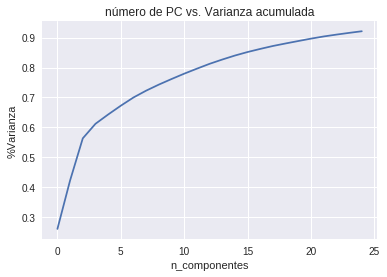

In [50]:
from sklearn.decomposition import PCA
pca=PCA(n_components=25) 
pca.fit(X_train[features])
explained_variance = pca.explained_variance_ratio_
var1=np.cumsum(explained_variance)

ax = plt.axes()
plt.plot(var1) 
ax.set_xlabel('n_componentes')
ax.set_ylabel('%Varianza')
ax.set_title('número de PC vs. Varianza acumulada')
plt.show()

**Figura 13.- % de varianza explicada acumulada por el número de componentes escogidas** 



Podemos observar que con 25 componentes podemos explicar más del 90%(**Figura 13**) de la varianza por tanto este es número de componentes que vamos a utilizar, entonces se agregarán al dataset y se seleccionarán las variables más importantes para modelar...

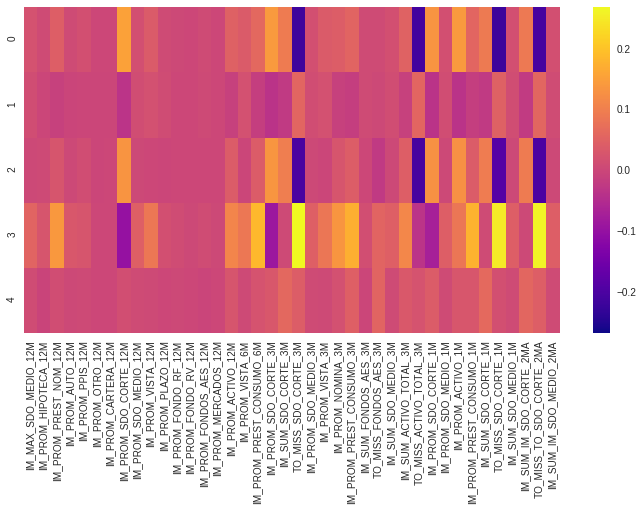

In [51]:
df_comp = pd.DataFrame(pca.components_,columns=features)
df_comp
plt.figure(figsize=(12,6))
sns.heatmap(df_comp[features[0:40]][0:5],cmap='plasma',) 
#sns.heatmap(df_comp[features[40:90]][5:13],cmap='plasma',)

**Figura 14.-Gráfico de influencia de cada variable en las primeras 5 componentes principales**. El resto de componentes se pueden ver completas en el [Anexo9](#Anexo9).

En la **Figura 14** podemos observar las variables que más influyen en las primeras 5 componentes principales, por ejemplo para la  componente 1(PCA1.-se marca como 0 en la **Figura 14**) las variabes más influyentes son IM_SUM_IM_SDO_MEDIO_2MA, TO_MISS_SDO_CORTE_1M, TO_MISS_ACTIVO_TOTAL_3M,
TO_MISS_SDO_CORTE_3M, de forma negativa Y entre otras IM_PROM_SDO_CORTE_12M de forma positiva entonces esta componente puede interpretarse como indicador de falta de información de saldos del cliente debido a su nula actividad en un periodo, entonces un valor mayor implicaría que el cte. reporta actividad casi todos los meses además de contar con el dato de IM_PROM_SDO_CORTE_12M.  

Otro ejemplo es la componente 4 (PCA4.-aparece como 3 en la **Figura 14**) vemos que las variables más influyentes son IM_PREST_CONSUMO_6M, IM_PREST_CONSUMO_1M, TO_MISS_SDO_CORTE_1M, TO_MISS_TO_SDO_CORTE_2MA de forma positiva e IM_PROM_SDO_CORTE_12M, IM_PROM_SDO_CORTE_1M, IM_PROM_SDO_CORTE_3M de forma negativa lo cual se puede interpretar como aquellos clientes que dado sus altos saldos de deuda de créditos dejan de tener actividad y por ello sus saldos de liquidez se ve afectado por tanto la componente habla de una necesidad financiera.

debido a que tenemos muchas componentes la interpretabilidad de cada una es bastante extensa para este trabajo mostraremos estas primeras 5.


<span style="color:red; font-family:Georgia; font-size:1.5em;">**Aplicamos pca.transform a los datos de prueba como los ajustamos en el train para calcular las componentes como en el entrenamieto.**</span>

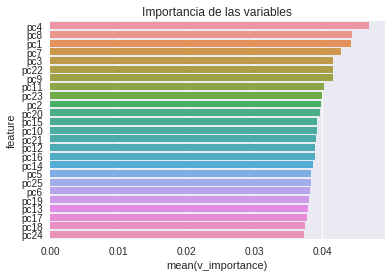

In [52]:
vpca=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15'
      ,'pc16','pc17','pc18','pc19','pc20','pc21','pc22','pc23','pc24','pc25'
     ]
x_pca=pca.transform(X_train[features])
dfpca=pd.DataFrame(x_pca,columns=[vpca])
dfpca['contrata']=np.array(y_train)
#test.............
x_pcat=pca.transform(X_test[features])
dfpcat=pd.DataFrame(x_pcat,columns=[vpca])
dfpcat['contrata']=np.array(y_test)


dfpca
#dfs['pc1']=x_pca[:,0] 
#dfs['pc2']=x_pca[:,1]
#dfs['pc3']=x_pca[:,2]
#dfs['pc4']=x_pca[:,3]
#dfs['pc5']=x_pca[:,4]
#dfs.describe()vpca
var_importance(bin_mtx=dfpca[vpca],bin_class=dfpca['contrata'], n_tree=20)
ax = plt.axes()
sns.barplot(y='feature',x='v_importance',data=var_importance(bin_mtx
=dfpca[vpca],bin_class=dfpca['contrata'], n_tree=50)
)
ax.set_title('Importancia de las variables')
plt.show() 

**Figura 15.- Importancia de las componentes principales usando el método de random forest de la Figura 12**



De acuerdo con las distintas selecciones de variables prácticamente con todas encontramos modelos que alcanzan curvas ROC  AUC de más de 80 (**Revisar** [Apéndice A](#Apéndice A).), pero en estricto sentido nos vamos a quedar con la selección de las primeras 25 componentes principales ya que de todas las selecciones es la que menor número de variables ocupa además de eliminar la redundancia de información entre ellas cosa que con otra forma de seleccionar los datos no sucede necesariamente además de que nuestro dataset tiene variables muy correlacionadas.



**Distribución de las primeras 5 componentes principales separadas por la variable target** 

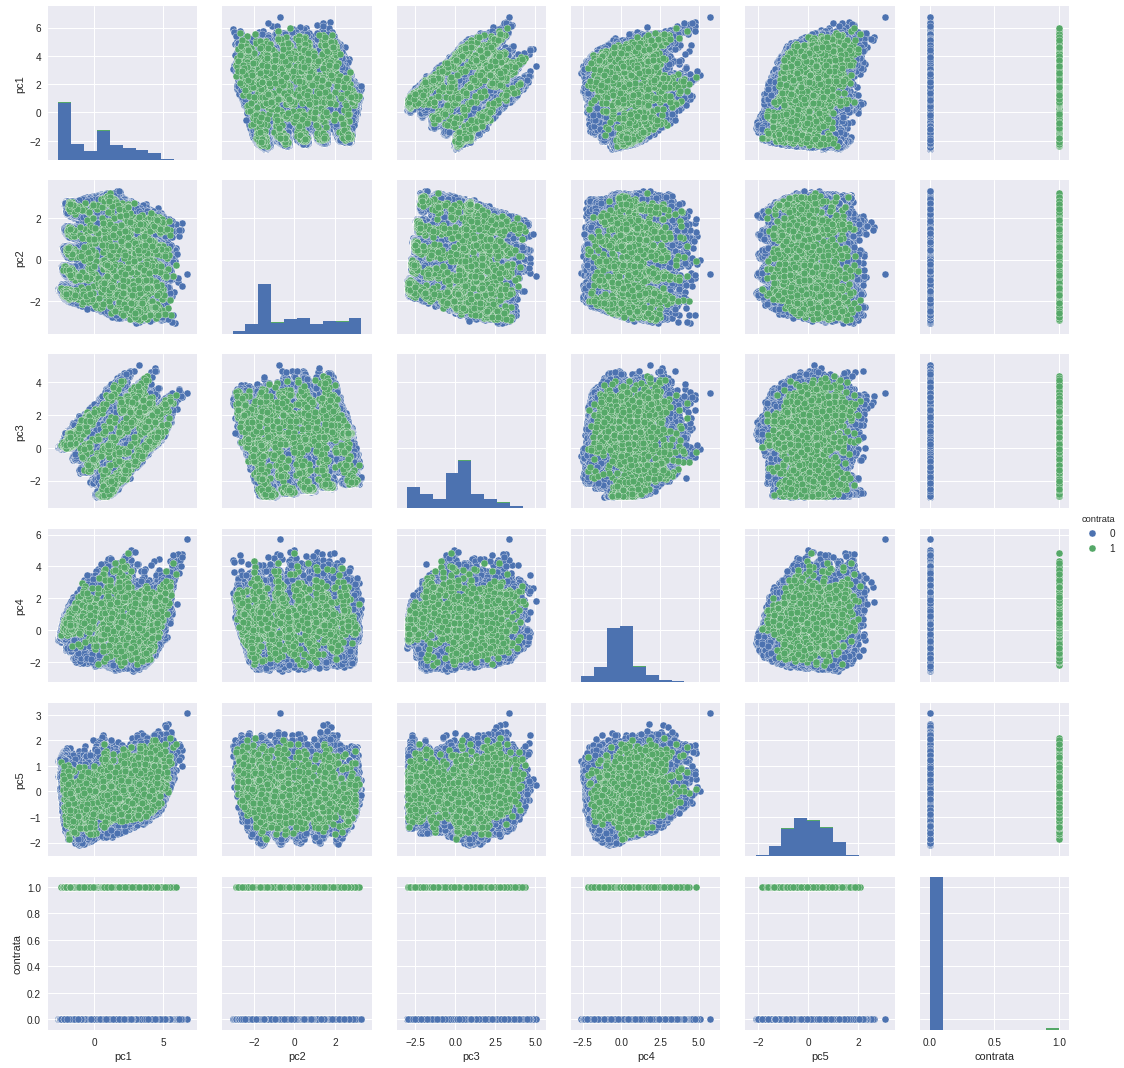

In [53]:
sns.pairplot(dfpca[vpca[0:5]+['contrata']], hue='contrata')

**Figura 16.-Pairplot de las primeras 5 componentes principales**. 



De acuerdo con el resultado vemos que el valor de la importancia de las variables mejora utilizando las 25 componentes principales además sólo con estas vamos a modelar.

Por otro lado, podemos ver que la distribución de las componentes es aprox normal(**Figura 16**) por lo que con esto buscamos que se aprovechen mejor los algoritmos.

In [2]:
#len(dfpcat[vpca])
#sa=np.random.randint(10)
#sa
#dfpca[vpca].to_csv('aux_train.csv')
#dfpca['contrata'].to_csv('yaux_train.csv')
#dfpcat[vpca].to_csv('aux_test.csv')
#dfpcat['contrata'].to_csv('yaux_test.csv')
#e=pd.read_csv('yaux_train.csv',header=None)
#len(e)

yaux_train=pd.read_csv('yaux_train.csv',header=None)
yaux_test=pd.read_csv('yaux_test.csv',header=None)
aux_train=pd.read_csv('aux_train.csv') 
aux_test=pd.read_csv('aux_test.csv')
aux_train.drop('Unnamed: 0',inplace=True,axis=1)
aux_test.drop('Unnamed: 0',inplace=True,axis=1)
aux_train=np.array(aux_train)
aux_test=np.array(aux_test)
yaux_train=np.array(yaux_train[1])
yaux_test=np.array(yaux_test[1])

In [55]:
aux_train=np.array(dfpca[vpca])#df[feat_AUC]
yaux_train=np.array(dfpca['contrata'])
aux_test=np.array(dfpcat[vpca])#df[feat_AUC]
yaux_test=np.array(dfpcat['contrata'])


In [4]:
from sklearn.cross_validation import train_test_split 

#X=np.array(dfpca[vpca])#df[feat_AUC]
#y=np.array(dfpca['contrata']) 
X_train,X_test,y_train,y_test=train_test_split(aux_train,yaux_train,test_size=0.2,random_state=6)#sa=6
 

In [143]:
#np.mean(y_test)

In [57]:
#np.shape(X_test)0.011767624853790806

# Modelos


Para la parte del modelado vamos a probar con 5 modelos distintos utilizaremos Naive Bayes, red neuronal, un svm ,una regresión logística y un random forest con esto vamos a comparar las bajo las distintas métricas y escoger el mejor modelo de acuerdo con la solución al problema planteado.
 

<span style="color:red; font-family:Georgia; font-size:2em;">**Todos los resultados y métricas obtenidas en esta sección están evaluados con la partición de TEST obtenida del set de entrenamiento definida al principio del problema(80%),es decir del set de entrenamiento vamos a hacer una partición de train y test tomando el 20% de los datos para test o validación, así como los cross-validation, recordar que los datos de test finales(elegidos al principio del reporte) los vamos a tocar hasta la evaluación final.**</span>

In [6]:
import os
import numpy as np
import pandas as pd
from pandas import Series, DataFrame 
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn import datasets 
from sklearn.svm import l1_min_c
%matplotlib inline
import matplotlib.pyplot as plt
import csv 
import pandas
import sklearn
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold, cross_val_score, train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.learning_curve import learning_curve 
import math  
from math import*
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.cross_validation import train_test_split 
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# SVM


Para las maquinas de soporte vectorial vamos a probar con el kernel lineal, pero primero vamos a hacer un grid search para eligir los mejores parámetros del modelo,el **gridsearch** trata de probar diferentes combinaciones de parámetros hasta encontrar los 'mejores' basados en alguna métrica, este proceso funciona haciendo validación cruzada para obtener los resultados y compararlos **Cómo lo hicimos en clase con la regularización** encontrando la mejor $\lambda$.

**La métrica que vamos a ocupar en este y todos los algoritmos será AUC ya que de acuerdo con el contexto del problema  nos dirá que parámetros nos dan mejor precisión y recall sin todavía pensar en el punto de corte.**


**Nota: se ajustan parámetros con C's pequeñas [0.1,0.5, 1.0, 1.5] y $\gamma$=[0.1,0.01,0.001,0.0001] dado que usar C's mayores implica tiempo de procesamiento muy alto por el tamaño de la base.**

Entonces los Mejores Parámetros para svm son:

{'C': 1.5, 'gamma': 0.1, 'kernel': 'linear'}

El output completo se puede ver en el [Apéndice B](#Apéndice B) punto 1.

Lo que significan estos parámetros es que en promedio de $k=3$ iteraciones(**esto es un 3-fold cross validation**) tienen el mejor AUC.

In [61]:
print('el mejor AUC promedio del cross validation:',grid.best_score_)
grid.best_estimator_

el mejor AUC promedio del cross validation: 0.626472402186


SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Los parámetros que maximizan AUC son:
**Algoritmo SVM, complejidad: kernel lineal gamma=.1, C=1.5**

In [16]:
from sklearn.svm import SVC
svml=SVC(C=1.5, gamma=0.1,probability=True,kernel='linear')
svml.fit(X_train,y_train)
pred=svml.predict(X_test) 
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     27881
          1       0.00      0.00      0.00       332

avg / total       0.98      0.99      0.98     28213

[[27881     0]
 [  332     0]]


/home/abraham/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Podemos ver que que el svm con los parámetros utilizados no arroja discriminación entre las clases esto es debido a que la densidad de nuestro problema es muy baja y también que el punto de corte por **default** es de 0.5 entonces este modelo no scorea ninguna observación arriba de ese punto, por tanto las métricas de precision, recall y f1-score no nos ayudan a ver el desempeño verdadero de este modelo, más adelante veremos su curva ROC.


# Regresión Logística

En este algoritmo también usaremos gridsearch para encontrar los mejores parámetros  al igual que hicimos en SVM basado también en AUC como métrica de referencia.

vamos a probar los parámetros penalty=[’l2’,'l1] recordar que estos hacen referencia la tipo de regularización de los coeficientes $l1$ elimina variables llevando coeficientes a 0 para evitar overfitting y también usaremos el parámetro $C=[0.001, 0.01, 0.1, 1, 10]$ es nuestra **$\lambda$** 

Entonces los Mejores Parámetros para la regresión Logística son:

{'C': 0.01, 'penalty': 'l2'}

El output completo se puede ver en el [Apéndice B](#Apéndice B) punto 2.

In [ ]:
param_grid = {'C': [0.01, 0.1, 1,10,100,1e5], 'penalty': ['l1','l2']}
grid = GridSearchCV(linear_model.LogisticRegression(),param_grid,scoring='roc_auc',refit=True,verbose=3)
grid.fit(X_train,y_train) 
grid.best_params_

In [64]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            print('el mejor AUC promedio del cross validation:',grid.best_score_)
grid.best_estimator_

el mejor AUC promedio del cross validation: 0.812388810696


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Los parámetros que maximizan AUC son:
**Algoritmo Regresión Logística, complejidad: C=0.01 penalty=l2** l2 es la regularización Ridge.

In [65]:
rl=linear_model.LogisticRegression(C=0.01,penalty='l2')
rl.fit(X_train,y_train)
pred=rl.predict(X_test) 
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     27881
          1       0.00      0.00      0.00       332

avg / total       0.98      0.99      0.98     28213

[[27881     0]
 [  332     0]]


/home/abraham/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


La regresión logística tampoco califica ningún caso arriba de 0.5, veremos su curva ROC.

# Naive Bayes 

**Algoritmo Naive Bayes, complejidad: Gaussiano** en este caso el algoritmo sólo usa el parámetro prior que no es otra cosa que la densidad de 1's(1.17%) que se leen de los datos por tanto este parámetro se queda así.

In [66]:
NB=GaussianNB()
NB.fit(X_train,y_train) 
pred=NB.predict(X_test) 
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          0       0.99      0.97      0.98     27881
          1       0.04      0.12      0.06       332

avg / total       0.98      0.96      0.97     28213

[[26978   903]
 [  292    40]]


El algoritmo Naive Bayes, de acuerdo con la matriz de confusión, clasifica mas de 900 casos(clasificados arriba de 0.5) como 1's o contrataciones de los cuales la tasa de respuesta(efectividad) o precisión es de 4% lo cual mejora más de 3 veces la efectividad o densidad original (1.17%)  este dato suena muy bien pero, si vemos el recall apenas capturamos el 12% de las contrataciones o clientes que aceptan las ofertas recordar que este 12% son 40 clientes. mismo caso veremos la curva ROC para definir el desempeño real del algoritmo.

# Redes Neuronales

Para las redes neuronales crearemos 3 modelos con con número de neuronas y funciones de activación distintas.

En esta primera Red vamos a dejar fijo el número de capas ocultas=1 y vamos a probar con las funciones de activación 'relu','tanh','logistic', neuronas=[3,10,50,100] ....

Entonces los Mejores Parámetros para la mlp1 son:

{'activation': 'relu',
 'hidden_layer_sizes': (50,),
 'max_iter': 40000,
 'random_state': 0,
 'verbose': 0}

El output completo se puede ver en el [Apéndice B](#Apéndice B) punto 3.

In [ ]:
from sklearn.neural_network import MLPClassifier 
param_grid = {'activation': ['relu','tanh','logistic'], 'hidden_layer_sizes': [(3,),(10,),(50,),(100,)],
              'max_iter':[40000],'random_state':[0],'verbose':[0]}
grid = GridSearchCV(MLPClassifier(),param_grid=param_grid,scoring='roc_auc', refit=True, verbose=3)
grid.fit(X_train,y_train) 
grid.best_params_

In [68]:
print('el mejor AUC promedio del cross validation:',grid.best_score_)
grid.best_estimator_

el mejor AUC promedio del cross validation: 0.836584934903


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=40000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=0,
       warm_start=False)

**Algoritmo Red Neuronal, complejidad: función de activación relu,neuronas=50, capas ocultas=1 **

In [69]:
mlp = MLPClassifier(verbose=0, random_state=0,max_iter=40000,activation='relu',hidden_layer_sizes=(50,))
mlp.fit(X_train, y_train)
pred=mlp.predict(X_test) 
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     27881
          1       1.00      0.03      0.06       332

avg / total       0.99      0.99      0.98     28213

[[27881     0]
 [  321    11]]


El modelo mlp1(Multilayer perceptron) con 50 neuronas y función de activación relu califica 11 casos arriba de 0.5 por tanto los clasifica como 1's, con esto teemos una precisión de 100% lo cual implica que mejoramos la densidad original más de 95 veces pero, nuestro recall es de apenas 3% o sea 11 clientes, estos datos, al igual que en los casos anteriores no son métricas contundentes para medir el desempeño del modelo ya que están basados en el punto de corte 0.5, veremos la curva ROC adelante.

# mlp2

**Para la segunda Red Neuronal vamos probar modificando el número de capas y neuronas ocultas, usando la función de activación logistica**
hidden_layers=[(12,2),(15,3),(20,4),(25,2),(50,3),(100,)] vamos a escoger el mejor par de hidden layers y capas ocultas que de la mejor AUC... para obtener los paramétros de la red.

<br>
<div style="text-align: left">Entonces los Mejores Parámetros para la mlp2 son:</div>
<br>
<div style="text-align: left">{'activation': 'logistic',
 'hidden_layer_sizes': (20, 4),
 'max_iter': 40000,
 'random_state': 0,
 'verbose': 0}</div>
<br>
<div style="text-align: left">El output completo se puede ver en el [Apéndice B](#Apéndice B) punto 4.</div>

In [ ]:
 param_grid = {'activation': ['logistic'], 'hidden_layer_sizes': [(12,2),(15,3),(20,4),(25,2),(50,3),(100,)],
              'max_iter':[40000],'random_state':[0],'verbose':[0]}
grid = GridSearchCV(MLPClassifier(),param_grid=param_grid,scoring='roc_auc', refit=True, verbose=3)
grid.fit(X_train,y_train) 
grid.best_params_

In [71]:
print('el mejor AUC promedio del cross validation:',grid.best_score_)
grid.best_estimator_

el mejor AUC promedio del cross validation: 0.836937675666


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=40000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=0,
       warm_start=False)

**Algoritmo Red Neuronal(mlp2), complejidad: función de activación logística,neuronas=(20,4)** en este caso tenemos una red profunda en este punto tal vez esta función ya no es tan interpretable pero ojo nuestro problema de negocio implica buscar la mejor efectividad o precision de contrataciones.

In [72]:
from sklearn.neural_network import MLPClassifier 
mlp2 = MLPClassifier(verbose=0, random_state=0,max_iter=40000,hidden_layer_sizes=(20,4),activation='logistic')
mlp2.fit(X_train, y_train)
pred=mlp2.predict(X_test) 
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     27881
          1       0.00      0.00      0.00       332

avg / total       0.98      0.99      0.98     28213

[[27881     0]
 [  332     0]]


/home/abraham/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


El modelo mlp2(Multilayer perceptron) con (20,4) neuronas y función de activación logística no clasifica casos como 1's, igual veremos su desempeño en la curva ROC y si resultara ganador revisaríamos el umbral adecuado.

# mlp3

**Para la 3a Red Neuronal vamos probar modificando el número de capas y neuronas ocultas, usando la función de activación tanh(Tangente Hiperbólica) hidden_layers=[(12,4),(15,3),(20,4),(25,3),(50,3),(50,2)] vamos a escoger el mejor par de hidden layers y capas ocultas y también el número máximo de iteraciones=[400,4000,40000,100000] que de la mejor AUC... para obtener los paramétros de la red.**<br>

Entonces los Mejores Parámetros para la mlp3 son:
<br>
{'activation': 'tanh',
 'hidden_layer_sizes': (15, 3),
 'max_iter': 400,
 'random_state': 0,
 'verbose': 0}.
<br>
El output completo se puede ver en el [Apéndice B](#Apéndice B) punto 5.

In [ ]:
 param_grid = {'activation': ['tanh'], 'hidden_layer_sizes': [(12,4),(15,3),(20,4),(25,3),(50,3),(50,2)] ,
              'max_iter':[400,4000,40000,100000],'random_state':[0],'verbose':[0]}
grid = GridSearchCV(MLPClassifier(),param_grid=param_grid,scoring='roc_auc', refit=True, verbose=3)
grid.fit(X_train,y_train) 
grid.best_params_

In [74]:
print('el mejor AUC promedio del cross validation:',grid.best_score_)
grid.best_estimator_

el mejor AUC promedio del cross validation: 0.835567762301


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=400, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=0,
       warm_start=False)

**Algoritmo Red Neuronal(mlp3), complejidad: función de activación tangente hip,neuronas=15, capas ocultas=3 y 400 iteraciones **

In [80]:
from sklearn.neural_network import MLPClassifier 
mlp3 = MLPClassifier(verbose=0, random_state=0,max_iter=400,hidden_layer_sizes=(15,3),activation='tanh')
mlp3.fit(X_train, y_train)
pred=mlp3.predict(X_test) 
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     27881
          1       0.91      0.03      0.06       332

avg / total       0.99      0.99      0.98     28213

[[27880     1]
 [  322    10]]


El modelo mlp3(Multilayer perceptron) con 15 neuronas, 3 capas ocultas  y función de activación tangente hiperbólica y  califica 11 casos arriba de 0.5 por tanto los clasifica como 1's, on esto tenemos una precisión de 91% lo cual implica que mejoramos la densidad original más de 89 veces pero, nuestro recall es de apenas 3% o sea 10 clientes, estos datos, al igual que en los casos anteriores no son métricas contundentes para medir el desempeño del modelo ya que están basados en el punto de corte 0.5, veremos la curva ROC adelante.

In [7]:
import tensorflow as tf
input_size=25
hidden_layers=25
output_size=1

x=tf.placeholder(tf.float32,shape=[None,input_size])
y=tf.placeholder(tf.float32,shape=[None,output_size])

In [8]:
W1=tf.Variable(tf.random_uniform([input_size,hidden_layers])) 
W2=tf.Variable(tf.random_uniform([hidden_layers,output_size])) 
b1=tf.Variable(tf.zeros([hidden_layers])) 
b2=tf.Variable(tf.zeros([output_size])) 

ini=tf.global_variables_initializer() 
sess=tf.InteractiveSession()
sess.run(ini)

z1=tf.sigmoid(tf.add(tf.matmul(x,W1),b1)) 
z2=tf.sigmoid(tf.add(tf.matmul(z1,W2),b2)) 
lossfn= tf.reduce_mean(( (y * tf.log(z2)) +  
  ((1 - y) * tf.log(1.0 - z2)) ) * -1) # cross entropy 
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(lossfn)

In [9]:
ini=tf.global_variables_initializer() 
with tf.Session() as sess:
    corrpred=tf.equal(tf.round(z2),y)
    acc=tf.reduce_mean(tf.cast(corrpred,tf.float32))
    #print(sess.run(acc,feed_dict={x:Xd,y:yd}))
sess.run(ini)
#while (sess.run(acc,feed_dict={x: Xd,y: yd})) != 1.0:
#    sess.run(train_step,feed_dict={x: Xd, y: yd})`

for i in range(100000):
    sess.run(train_step, feed_dict={x: X_train, y: y_train.reshape(-1,1)}) 

In [10]:
correct_prediction = tf.equal(tf.round(z2),y) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X_train, y: y_train.reshape(-1,1)})) # las corremos

0.988215


In [11]:
zz1=tf.sigmoid(tf.add(tf.matmul(x,W1),b1)) 
zz2=tf.sigmoid(tf.add(tf.matmul(zz1,W2),b2))

In [12]:
zx=sess.run(zz2,feed_dict={x:X_test}) 
dd=np.round(zx)
np.sum(dd)

0.0

In [14]:
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test,dd))
print(confusion_matrix(y_test,dd)) 

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     27881
          1       0.00      0.00      0.00       332

avg / total       0.98      0.99      0.98     28213

[[27881     0]
 [  332     0]]


/home/abraham/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


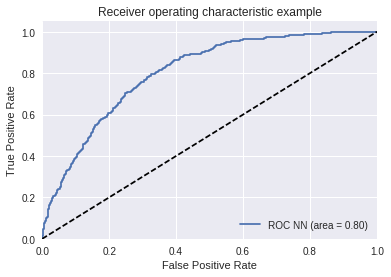

In [15]:
from sklearn.metrics import roc_auc_score, auc,precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
fprk, tprk, thresholds=roc_curve(y_test,zx)
nn_auc=auc(fprk,tprk)
from sklearn.metrics import roc_curve, auc
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fprk, tprk, label='ROC NN (area = %0.2f)' % nn_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Random Forest

**Para el Random Forest vamos a probar con números distintos de árboles entonces vamos a escoger n_estimators=[10,15,35,50,100,200] (número de árboles) para ver con cuantos maximizamos la AUC promedio, junto con el número de particiones dentro de cada rama=[2,4,8].**
<br>
<div style="text-align: left">Entonces los Mejores Parámetros para el Random Forest son:</div>
<br>
<div style="text-align: left">{'criterion': 'gini', 'min_samples_split': 8, 'n_estimators': 200}</div>
<br>
<div style="text-align: left">El output completo se puede ver en el [Apéndice B](#Apéndice B) punto 6.</div> 
<br>


In [ ]:
param_grid = {'min_samples_split': [2,4,8], 'criterion': ['gini'] ,
              'n_estimators':[10,15,35,50,100,200]}
grid = GridSearchCV(RandomForestClassifier(),param_grid=param_grid,scoring='roc_auc', refit=True, verbose=3)
grid.fit(X_train,y_train) 
grid.best_params_

In [77]:
print('el mejor AUC promedio del cross validation:',grid.best_score_)
grid.best_estimator_

el mejor AUC promedio del cross validation: 0.789080113128


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**Algoritmo Random Forest, complejidad: 1000 árboles y 8 particiones por nodo** escogimos el criterio de partición el estadístico gini dado que que este método crea grupos homogéneos(Ganancia de información, queremos saber que tanto se diferencian estos clientes del general) en este caso nuestros 1's y 0's que son los contratos y al final queremos clientes homogéneos para las campañas.

In [81]:
RF=RandomForestClassifier(criterion='gini', min_samples_split=8,n_estimators=200)
RF.fit(X_train,y_train) 
pred=RF.predict(X_test) 
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     27881
          1       1.00      0.02      0.04       332

avg / total       0.99      0.99      0.98     28213

[[27881     0]
 [  326     6]]


El Random Forest clasifica 6 clientes como 1's donde tenemos una precisión de 100% pero un recall o captura de eventos de apenas el 2% veremos las curvas ROC.

# Selección del Modelo 


De acuerdo con las predicciones y el performance de cada modelo vamos a comparar sus distintas métricas, en particular para seleccionar el modelo ganador vamos a utilizar la **métrica AUC o índice ROC ya que este dato no depende de ningún punto de corte como serían en accuracy,F1-score** y los que se derivan de la matriz de confusión, entonces aquel modelo que capture más eventos con una menor tasa de falsos positivos será el más adecuado para resolver nuestro problema de negocio. 


<span style="color:red; font-family:Georgia; font-size:1.5em;">**Nota: en este punto vamos a comparar las curvas ROC de los modelos con la partición de TEST QUE SE HIZO DEL 80% de train, el set final de validación que definimos al principio del problema se utilizará después de los siguientes pasos:**</span> 

1.-comparación de modelos con test que viene del set de train que viene definido al pricipio del problema(80%).

2.-haremos un cross validation con 30 iteraciones de los modelos que se definieron y decidiremos cual es el mejor de acuerdo con el promedio de sus curvas ROC.

posterior a estos pasos probaremos el mejor modelo en la partición test definida al principio del problema y ahí verificaremos si el modelo ganador en realidad es el que mejor ajusta.

In [82]:
from sklearn.metrics import roc_auc_score, auc,precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_test,svml.predict_proba(X_test)[:,1],pos_label=1)
#fpr1, tpr1, thresholds1=roc_curve(y_test,svmp.predict_proba(X_test)[:,1],pos_label=1)
#fpr2, tpr2, thresholds2=roc_curve(y_test,svmrbf.predict_proba(X_test)[:,1],pos_label=1)
fpr3, tpr3, thresholds3=roc_curve(y_test,rl.predict_proba(X_test)[:,1],pos_label=1)
fpr4, tpr4, thresholds4=roc_curve(y_test,NB.predict_proba(X_test)[:,1],pos_label=1)
fpr5, tpr5, thresholds5=roc_curve(y_test,mlp.predict_proba(X_test)[:,1],pos_label=1)
fpr6, tpr6, thresholds6=roc_curve(y_test,mlp2.predict_proba(X_test)[:,1],pos_label=1)
fpr7, tpr7, thresholds7=roc_curve(y_test,mlp3.predict_proba(X_test)[:,1],pos_label=1)
fpr8, tpr8, thresholds8=roc_curve(y_test,RF.predict_proba(X_test)[:,1],pos_label=1)

In [83]:
svml_auc=auc(fpr,tpr)
#svmp_auc=auc(fpr1,tpr1)
#svmprbf_auc=auc(fpr2,tpr2)
rl_auc=auc(fpr3,tpr3)
NB_auc=auc(fpr4,tpr4)
mlp1_auc=auc(fpr5,tpr5)
mlp2_auc=auc(fpr6,tpr6)
mlp3_auc=auc(fpr7,tpr7)
RF_auc=auc(fpr8,tpr8)

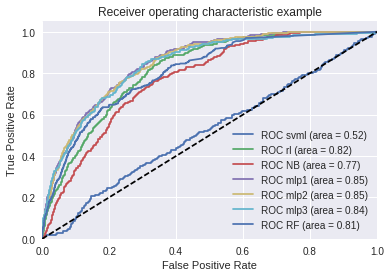

In [84]:
from sklearn.metrics import roc_curve, auc
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC svml (area = %0.2f)' % svml_auc)
#plt.plot(fpr1, tpr1, label='ROC svmp (area = %0.2f)' % svmp_auc)
#plt.plot(fpr2, tpr2, label='ROC svmrbf (area = %0.2f)' % svmprbf_auc)
plt.plot(fpr3, tpr3, label='ROC rl (area = %0.2f)' % rl_auc)
plt.plot(fpr4, tpr4, label='ROC NB (area = %0.2f)' % NB_auc)
plt.plot(fpr5, tpr5, label='ROC mlp1 (area = %0.2f)' % mlp1_auc)
plt.plot(fpr6, tpr6, label='ROC mlp2 (area = %0.2f)' % mlp2_auc)
plt.plot(fpr7, tpr7, label='ROC mlp3 (area = %0.2f)' % mlp3_auc)
plt.plot(fpr8, tpr8, label='ROC RF (area = %0.2f)' % RF_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**Figura 17.- Comparativo de curvas ROC y su área bajo la curva(AUC).** 



De acuerdo con la gráfica comparativa de cuvas ROC el mejor modelo es el mlp1 y mlp2 (**Figura 17**) ya que el índice ROC o AUC=0.85 de las redes neuronales es mayor que los del resto.

# Cross-validation 


Con los resultados anteriores hemos seleccionado nuestro modelo ganador, pero hay que recordar que el performance del modelo o en otras palabras el índice ROC están probados en **una de muchas particiones posibles de datos de train y test**, entonces puede suceder que el mejor modelo en esta muestra no sea el mejor en alguna otra, para revisar la verosimilitud de resultado vamos hacer un proceso de cross validation repetido 30 veces al menos, seleccionando distintos datos de entrenamiento y test,con las mismas proporciones de partición i.e. test_size de 20%, de tal modo que este proceso se llama shuffle split.
Con estas 30 iteraciones de partición podemos analizar la distribución del índice roc de cada uno de los modelos entrenados en cada iteración de tal forma que podamos ver cual de ellos es el más estable o confiable para ser seleccionado y finalmente, nos quedaremos con aquel modelo que mejor performance presente a lo largo de las iteraciones y ese será nuestro modelo final.

In [85]:
#aux_train=X_train
#yaux_train=y_train

In [86]:
#X_train=aux_train
#y_train=yaux_train
#X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.3,random_state=np.random.randint(1000))
#print(np.mean(y_train),np.mean(y_test))

In [ ]:
%%time
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold

indice=30

mean_fpr = np.linspace(0, 1, 100)
all_tpr = []


titles = ['svml','rl','NB','mlp1','mlp2','mlp3','RF']
mm=[svml,rl,NB,mlp,mlp2,mlp3,RF] 
tppr=np.zeros((len(titles),len(mean_fpr)))

for j in range(len(titles)):
    mean_tpr = 0.0
    roci=[]
    for k in range(indice):
        X_train,X_test,y_train,y_test=train_test_split(aux_train,yaux_train,test_size=0.2,random_state=np.random.randint(1000))
        probas_ = mm[j].fit(X_train, y_train).predict_proba(X_test)#
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        roci.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (k, roc_auc))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    mean_tpr /= (k+1) 
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr) 
    tppr[j]=mean_tpr 
    plt.plot(mean_fpr, mean_tpr, 'k--',
    label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(titles[j])
    plt.legend(loc="lower right")
    plt.show()
    auci=np.asarray(roci)
    aucif=pd.DataFrame(auci,columns=['AUC'])
    aucif['Modelo']=titles[j]
    if j==0:
        gen=aucif
    else:
        gen=gen.append(aucif, ignore_index=True)
        

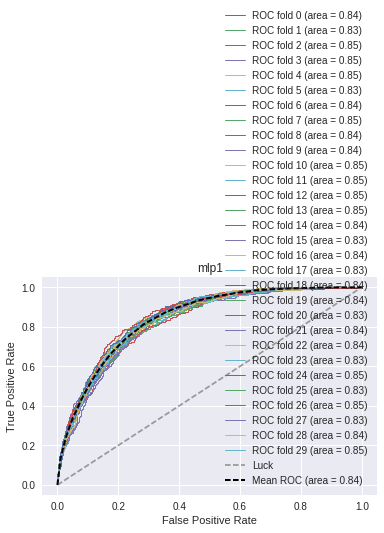

In [88]:
from PIL import Image
myImage = Image.open("/home/abraham/Proyml-vf-img/mlp1cv.png");
myImage

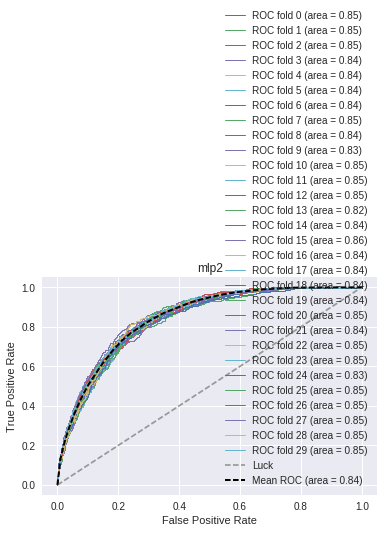

In [89]:
from PIL import Image
myImage = Image.open("/home/abraham/Proyml-vf-img/mlp2cv.png");
myImage

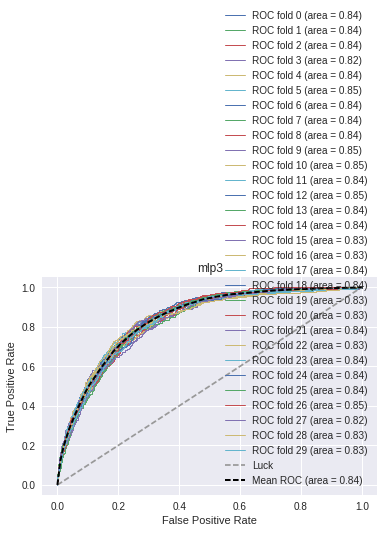

In [90]:
from PIL import Image
myImage = Image.open("/home/abraham/Proyml-vf-img/mlp3cv.png");
myImage

**Figura 18.- Desempeño de curvas ROC por cada modelo en cada una de las 30 iteraciones.** 

Podemos ver que para los modelos mlp1-mlp3 el AUC promedio=0.84.

El resto de los modelos pueden verse en el [Anexo10](#Anexo10).

De acuerdo con la **Figura 18** haciendo las distintas iteraciones con excepcion del modelo svml, el resto son muy estables en cuanto a la distribución del AUC, ahora bajo el AUC promedio los modelos mlp1-mlp3 tienen el mismo dato, y para poder diferenciarlos vamos a ver un boxplot de su distribución: 

In [95]:
#gen=gen.append(aucif, ignore_index=True)
#correlacion

#sns.factorplot("Modelo", #hue="Modelo",
#               y="AUC", data=gen, kind="box") 



In [96]:
#arbol dec.
#sns.factorplot("Modelo", #hue="Modelo",
#               y="AUC", data=gen, kind="box") 

In [97]:
#ANOVA-F.
#sns.factorplot("Modelo", #hue="Modelo",
#               y="AUC", data=gen, kind="box") 

In [98]:
#AUC -curva ROC
#sns.factorplot("Modelo", #hue="Modelo",
#               y="AUC", data=gen, kind="box") 

In [99]:
#PCA 18
#sns.factorplot("Modelo", #hue="Modelo",
#               y="AUC", data=gen, kind="box") 

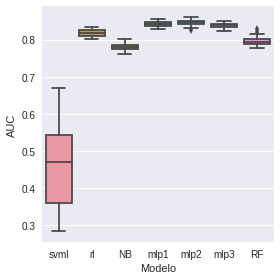

In [100]:
#PCA 25
sns.factorplot("Modelo", #hue="Modelo",
               y="AUC", data=gen, kind="box") 

**Figura 19.- Box-plot de la distribución de cada modelo con respecto a su AUC**

Modelo mlp1 es el más compacto en cuanto rango de AUC aunque no es muy distante de mlp2 y mlp3. 

En general, con excepción de svml, todos los modelos son muy compactos en su distribución de AUC lo que habla de la estabilidad proporcionada en el proceso de validación cruzada.

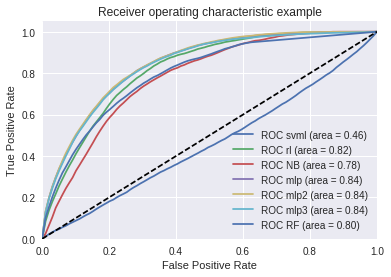

In [101]:
svml_auc=auc(mean_fpr,tppr[0])
#svmp_auc=auc(mean_fpr,tppr[1])
#svmrbf_auc=auc(mean_fpr,tppr[1])
rl_auc=auc(mean_fpr,tppr[1])
NB_auc=auc(mean_fpr,tppr[2])
mlp_auc=auc(mean_fpr,tppr[3])
mlp2_auc=auc(mean_fpr,tppr[4])
mlp3_auc=auc(mean_fpr,tppr[5])
RF_auc=auc(mean_fpr,tppr[6])


from sklearn.metrics import roc_curve, auc
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(mean_fpr, tppr[0], label='ROC svml (area = %0.2f)' % svml_auc)
#plt.plot(mean_fpr, tppr[1], label='ROC svmp (area = %0.2f)' % svmp_auc)
#plt.plot(mean_fpr, tppr[1], label='ROC svmrbf (area = %0.2f)' % svmrbf_auc)
plt.plot(mean_fpr, tppr[1], label='ROC rl (area = %0.2f)' % rl_auc)
plt.plot(mean_fpr, tppr[2], label='ROC NB (area = %0.2f)' % NB_auc)
plt.plot(mean_fpr, tppr[3], label='ROC mlp (area = %0.2f)' % mlp_auc)
plt.plot(mean_fpr, tppr[4], label='ROC mlp2 (area = %0.2f)' % mlp2_auc)
plt.plot(mean_fpr, tppr[5], label='ROC mlp3 (area = %0.2f)' % mlp3_auc)
plt.plot(mean_fpr, tppr[6], label='ROC RF (area = %0.2f)' % RF_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.show()

**Figura 20.- Gráfico de curvas ROC promedio de cada modelo resultantes de Figura 18**


Con las gráficas de caja y brazos de las AUC en cada iteración vemos que de forma marginal el mejor modelo o el más estable es la red neuronal mlp1 (**complejidad: función de activación relu,neuronas=50, capas ocultas=1**)que cuenta con un índice **promedio** de 0.84 y con una mediana similar,además si vemos la **Figura 19** podemos observar que el modelo mlp1 es ligeramente más compacto en su distribución es decir que el rango del área bajo la curva o AUC es más cercano a cero que los demás y por otro lado la caja y brazos de este modelo está ligeramente más abajo que mlp2 aunque este es menos compacto, pero tiene AUC's mayores en las iteraciones con respecto al resto lo cual también se confirma con la **Figura 20** donde vemos las AUC's promedio de cada modelo, por tanto es el modelo con mejor desempeño aunque su diferencia o ganancia es marginal con respecto a las otros 2 modelos del mismo tipo mlp2 y mlp3.

**Métrica de Éxito AUC**
La razón por la que nuestra métrica de éxito es la curva ROC es debido a que métricas como Precisión, accuracy,recall,F1-Score, tasa de error de clasificación dependen del punto de corte de la probabilidad o score que cada uno de los modelos puede generar, por default los puntos de corte para la creación de todas estas métricas es 0.5, pero en este caso tenemos pocas observaciones calificadas arriba de este score lo que por default en algunos modelos tuvimos precisiones y recalls en 0 debido a la baja densidad de 1's que tenemos en nuestro dataset **1.17%** por tanto el área bajo la curva roc nos habla de que con nuesto modelo mlp1 podemos capturar más eventos o contrataciones con un menor % de falsos positivos lo cual se adecúa perfecto a nuestro caso de negocio ya que lo que buscamos es mejorar la tasa de respuesta con un menor universo o en otras palabras reducción de costos para después maximizar la utilidad de colocar préstamos.

Entonces, lo único que falta por confirmar es si los modelos se comportan igual en nuestros datos de prueba(20%) definidos al principio del problema y definir con esto el champion model.

# [Champion Model](#Champion Model)

Una vez revisado el preformance de cada modelo a tráves del cross validation y la **Figura 19** vamos a utilizar nuestros datos originales de TEST para comparar los distintos modelos y decidir el que vamos a elegir y las razones.

Primero, nuestro Dataset de prueba tiene una densidad de 1.17%, esta será nuestra métrica a mejorar..

In [144]:
#yaux_test.mean()

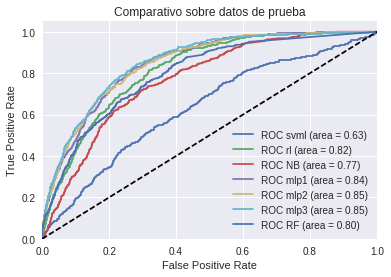

In [102]:
#aux_test=np.array(dfpcat[vpca])#df[feat_AUC]
#yaux_test=np.array(dfpcat['contrata'])


fpr, tpr, thresholds=roc_curve(yaux_test,svml.predict_proba(aux_test)[:,1],pos_label=1)
#fpr1, tpr1, thresholds1=roc_curve(yaux_test,svmp.predict_proba(aux_test)[:,1],pos_label=1)
#fpr2, tpr2, thresholds2=roc_curve(yaux_test,svmrbf.predict_proba(aux_test)[:,1],pos_label=1)
fpr3, tpr3, thresholds3=roc_curve(yaux_test,rl.predict_proba(aux_test)[:,1],pos_label=1)
fpr4, tpr4, thresholds4=roc_curve(yaux_test,NB.predict_proba(aux_test)[:,1],pos_label=1)
fpr5, tpr5, thresholds5=roc_curve(yaux_test,mlp.predict_proba(aux_test)[:,1],pos_label=1)
fpr6, tpr6, thresholds6=roc_curve(yaux_test,mlp2.predict_proba(aux_test)[:,1],pos_label=1)
fpr7, tpr7, thresholds7=roc_curve(yaux_test,mlp3.predict_proba(aux_test)[:,1],pos_label=1)
fpr8, tpr8, thresholds8=roc_curve(yaux_test,RF.predict_proba(aux_test)[:,1],pos_label=1)

svml_auc=auc(fpr,tpr)
#svmp_auc=auc(fpr1,tpr1)
#svmprbf_auc=auc(fpr2,tpr2)
rl_auc=auc(fpr3,tpr3)
NB_auc=auc(fpr4,tpr4)
mlp1_auc=auc(fpr5,tpr5)
mlp2_auc=auc(fpr6,tpr6)
mlp3_auc=auc(fpr7,tpr7)
RF_auc=auc(fpr8,tpr8)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC svml (area = %0.2f)' % svml_auc)
#plt.plot(fpr1, tpr1, label='ROC svmp (area = %0.2f)' % svmp_auc)
#plt.plot(fpr2, tpr2, label='ROC svmrbf (area = %0.2f)' % svmprbf_auc)
plt.plot(fpr3, tpr3, label='ROC rl (area = %0.2f)' % rl_auc)
plt.plot(fpr4, tpr4, label='ROC NB (area = %0.2f)' % NB_auc)
plt.plot(fpr5, tpr5, label='ROC mlp1 (area = %0.2f)' % mlp1_auc)
plt.plot(fpr6, tpr6, label='ROC mlp2 (area = %0.2f)' % mlp2_auc)
plt.plot(fpr7, tpr7, label='ROC mlp3 (area = %0.2f)' % mlp3_auc)
plt.plot(fpr8, tpr8, label='ROC RF (area = %0.2f)' % RF_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparativo sobre datos de prueba')
plt.legend(loc="lower right")
plt.show()

**Figura 20.1.- Gráfico de curvas ROC en nuestros datos de TEST original**

Con la **Figura 20.1**  podemos ver de acuerdo al desempeño de cada modelo en nuestros datos de Test originales que el **Champion Model** es mlp2 o mlp3, aunque vamos a elegir al segundo por menor complejidad, es decir recordemos que mlp2 tiene 20 neuronas y 4 capas ocultas y mlp3 15,3 respectivamente, también podríamos elegir mlp1 que tuvo una roc ligeramente menor pero dentro de lo esperado,**En nuestro problema de negocio el objetivo es encontrar el mejor algoritmo no el más interpretable(Polémico y debatible!) concientes de que una red neuronal no es interpretable elegimosesta como nuestro mejor algoritmo mlp3**

# Selección del umbral de Clasificación 



In [105]:
from sklearn.cross_validation import train_test_split 
#X=np.array(dfpca[vpca])#df[feat_AUC]
#y=np.array(dfpca['contrata']) 
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=np.random.random_integers(1000))
#np.mean(y_test)


In [ ]:
dfroc=pd.DataFrame(aux_test,columns=[vpca])
dfroc['contrata']=yaux_test
dfroc['score']=mlp3.predict_proba(dfroc[vpca])[:,1]
data=dfroc[['score','contrata']]
data.head()

In [115]:
print('Densidad original',np.round(np.mean(yaux_test),4)*100,'%')

Densidad original 1.17 %


In [116]:
data['no_contrata'] = 1 - data.contrata
# DEFINE 10 BUCKETS WITH EQUAL SIZE

data['bucket'] = pd.qcut(data.score, 25)

# GROUP THE DATA FRAME BY BUCKETS

grouped = data.groupby('bucket', as_index = False)

# CREATE A SUMMARY DATA FRAME

agg1 = grouped.min().score 

agg1 = pd.DataFrame(grouped.min().score) 
agg1.rename(columns={'score': 'min_scr'},inplace=True)
                                                    
agg1['max_scr'] = grouped.max().score

agg1['contrata'] = grouped.sum().contrata

agg1['no_contrata'] = grouped.sum().no_contrata

agg1['total'] = agg1.contrata + agg1.no_contrata


# SORT THE DATA FRAME BY SCORE

agg2 = (agg1.sort_values(by = 'min_scr',ascending=False)).reset_index(drop = True)

agg2['FPR'] = (agg2.no_contrata / agg2.contrata)

agg2['event_rate'] = (agg2.contrata / agg2.total).apply('{0:.2%}'.format)

 # CALCULATE KS STATISTIC

agg2['ks'] = np.round(((agg2.contrata / data.contrata.sum()).cumsum() - (agg2.no_contrata / data.no_contrata.sum()).cumsum()), 4) * 100

# DEFINE A FUNCTION TO FLAG MAX KS

flag = lambda x: '<----' if x == agg2.ks.max() else ''

# FLAG OUT MAX KS

agg2['max_ks'] = agg2.ks.apply(flag)


orig=float(agg2['contrata'].sum()/agg2['total'].sum()) 
def acum(base,var):
    cum=np.zeros(len(base))
    for i in range(len(base)):
        if i==0:
            cum[i]=base[var].iloc[i]
        else:
            cum[i]=cum[i-1]+base[var].iloc[i]
    return(cum)


agg2['cumtotal']=acum(agg2,'total')
agg2['cum_contrata']=acum(agg2,'contrata')
agg2['cum_no_contrata']=acum(agg2,'no_contrata') 
agg2['cum_FPR'] = (agg2.cum_no_contrata / agg2.cum_contrata).apply('{0:.2f}'.format) 
agg2['cum_event_rate'] = (agg2.cum_contrata / agg2.cumtotal).apply('{0:.2%}'.format) 
agg2['cum_TP'] = (agg2.cum_contrata / agg2['contrata'].sum()).apply('{0:.2%}'.format) 
agg2['cum_FP'] = (agg2.cum_no_contrata / agg2['no_contrata'].sum()).apply('{0:.2%}'.format) 
agg2['%Universo'] = (agg2.cumtotal / agg2.cumtotal.max()).apply('{0:.2%}'.format)
agg2['LIFT'] = ((agg2.cum_contrata / agg2.cumtotal)/orig)

agg2['Recall'] = (agg2.cum_contrata / agg2['contrata'].sum())
agg2['FPrate'] = (agg2.cum_no_contrata / agg2['no_contrata'].sum()) 
agg2['%Ctes'] = (agg2.cumtotal / agg2.cumtotal.max()) 
#agg2
       

**Estadístico ks** 

Una forma de seleccionar el umbral es basado en el estadístico KS(Kolmogorov-Smirnov) que es una métrica para medir la predictibilidad de un modelo con respuestas binarias,como nuestro caso, es una métrica muy utilizada en temas de riesgos y marketing.

$$
KS=max_{1<i<n}\lvert F_{n}(x_{i})-F_{0}(x_{i}) \rvert
$$
donde:

• $x_{i}$ es el i-ésimo valor observado en la muestra (cuyos
valores se han ordenado previamente de menor a mayor).

• $F_{n}(x_{i})$ es un estimador de la probabilidad de observar
valores menores o iguales que $x_{i}$.

• $F_{0}(x_{i})$ es la probabilidad de observar valores menores o
iguales que xi cuando H0 es cierta.


De acuerdo con la definición anterior podemos pensar a $F_{n}(x_{i})$ y $F_{0}(x_{i})$ como los valores de recall o tasa de verdaderos positivos y tasa de falsos positivos respectivamente entonces el estadístico KS es la mayor o máxima diferencia absoluta entre estas 2 distribuciones, es decir es donde la diferencia entre la proporción acumulada de falsos positivos y verdaderos positivos es máxima, entonces para seleccionar el mejor umbral hay que encontrar el bucket del score o probabilidad donde se encuentra esta diferencia y la **Figura 21** nos puede mostrar esto.

Entonces, nuestro KS se da en el punto $(Falso Positivo,Veradero Pos)=(0.27 ,0.83)$. 


**Construcción de la tabla de distribución de score para encontrar el mejor umbral**

In [ ]:
print('Punto de corte K-S:',np.array(agg2[agg2['max_ks']=='<----']['min_scr'])[0])
print('Mejora del modelo:',np.array(agg2[agg2['max_ks']=='<----']['LIFT'])[0]) 
print('Precision:',np.array(agg2[agg2['max_ks']=='<----']['cum_event_rate'])[0])
print('Recall:',np.array(agg2[agg2['max_ks']=='<----']['cum_TP'])[0])
print('% Universo seleccionado:',np.array(agg2[agg2['max_ks']=='<----']['%Universo'])[0])
print('AUC:',auc(np.array(agg2.cum_no_contrata / agg2['no_contrata'].sum()),np.array(agg2.cum_contrata / agg2['contrata'].sum())))

agg2[['min_scr','max_scr','contrata','no_contrata','ks','max_ks','cum_event_rate','cum_TP','cum_FP','%Universo','LIFT']]


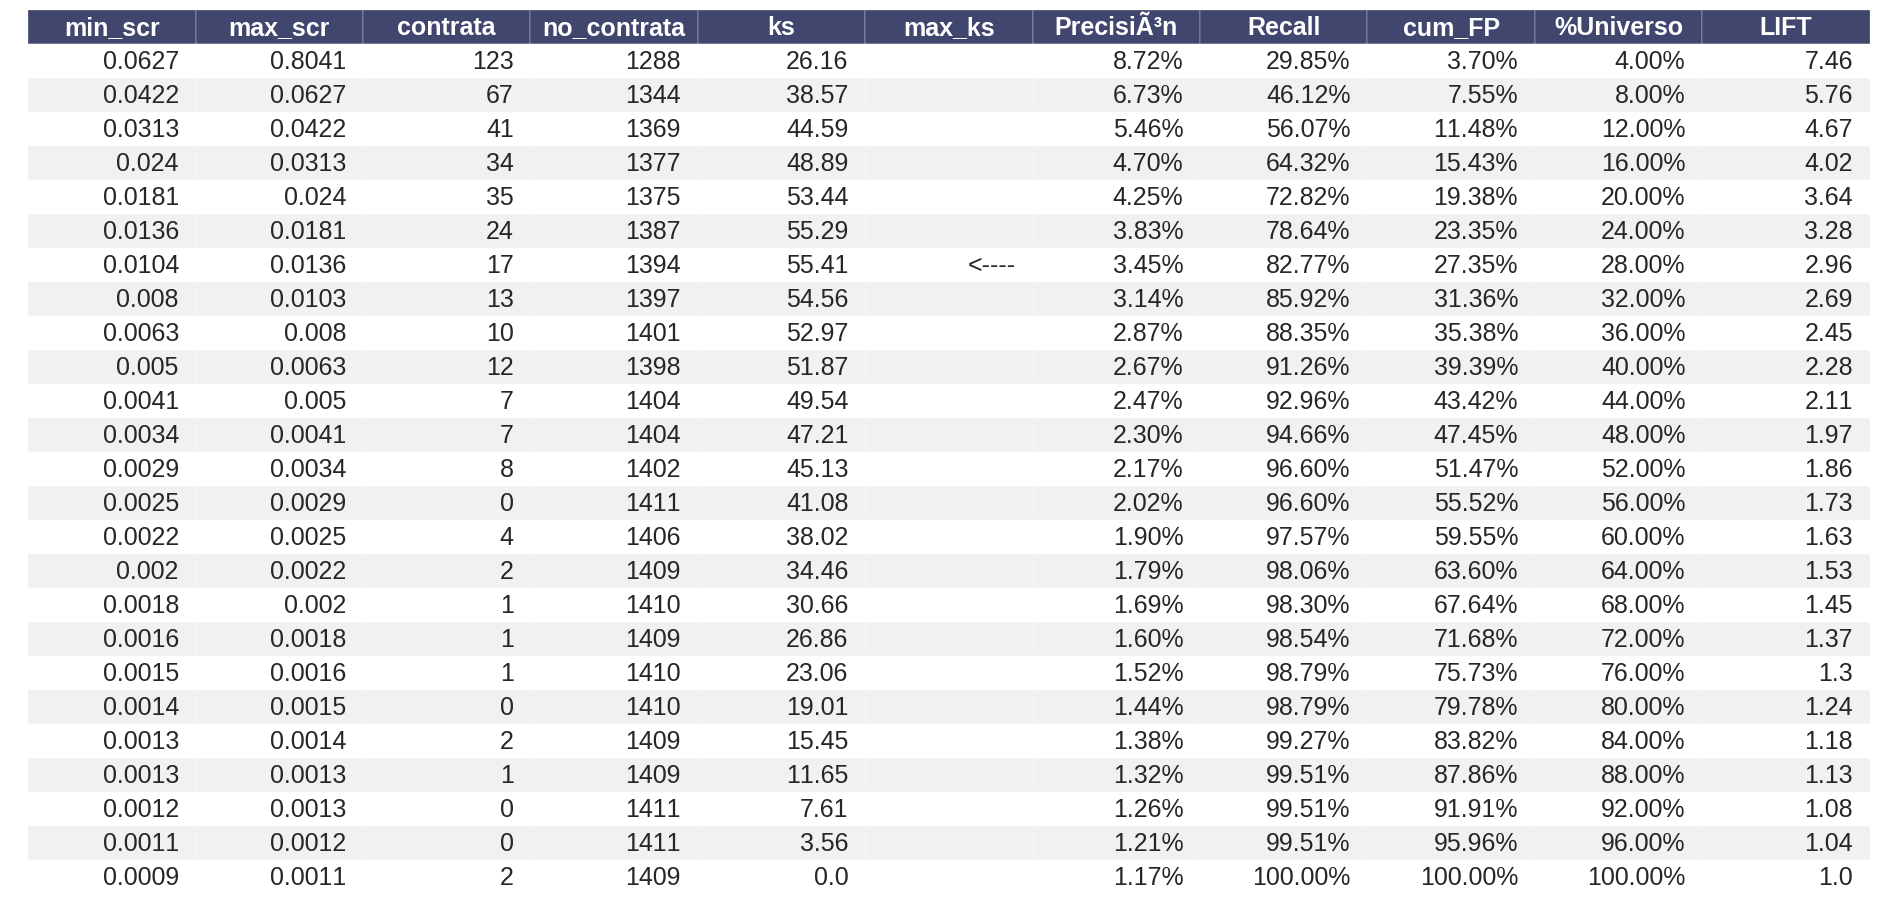

In [121]:
tabroc=pd.read_csv('tabroc2.csv',sep=",")
tabroc=tabroc.fillna(" ")
render_mpl_table(tabroc, header_columns=0, col_width=3.0,font_size=25)

**Figura 21.- Tabla de rangos de umbrales**

La tabla esta particionada en 25 buckets por intervalos de score cada bucket representa el 4% de los datos ordenados por score de forma descendente, entonces con esta tabla podemos ver la implicación de seleccionar distintos umbrales en términos de precisión, recall etc.


-Punto de corte K-S: 0.0104 

-Mejora del modelo: 2.96 veces 

-Precisión: 3.45% 

-Recall: 82.77% 

-% Universo seleccionado: 28.00% 

-AUC: 0.844



Podemos observar que el punto de corte basado en el estadístico KS es 0.0104 aproximadamente con el cual tenemos los siguientes resultados:

In [122]:
predks=np.array(data['score'].apply(lambda x: 1 if x>=0.0104  else 0))
contrata=np.array(data['contrata'])
#from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(contrata,predks))
print(confusion_matrix(contrata,predks))

             precision    recall  f1-score   support

          0       1.00      0.73      0.84     34854
          1       0.03      0.83      0.07       412

avg / total       0.99      0.73      0.83     35266

[[25344  9510]
 [   71   341]]


La matriz de confusión nos muestra que clasificamos a 9,851 como clientes tomadores de la oferta o en otras palabras son los clientes seleccionados para acampañar, de estos tenemos 341 clientes efectivos o que tomaron la oferta lo cual se traduce en una precisión cerca del 3.5%(3.45%), es decir, mi tasa de respuesta a la campaña. aunque la tasa suena baja recordar que con respecto a la densidad original estamos mejorando la efectividad casi 3 veces, además tenemos un recall de 83% es decir que con estos casi 10mil ctes. capturamos el 83% de los contratos.

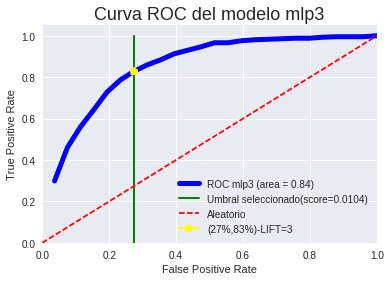

In [123]:
AUC=auc(agg2['FPrate'],agg2['Recall'])
# Plot of a ROC curve for a specific class
plt.figure()
l1=plt.plot(agg2['FPrate'], agg2['Recall'], label='ROC mlp3 (area = %0.2f)' % AUC,linewidth=5,color='blue') 
l2=plt.plot([0.2735, .2735], [0, 1], 'r-',label='Umbral seleccionado(score=0.0104)',linewidth=2,color='green')
l3=plt.plot([0, 1], [0, 1], 'k--',color='red',label='Aleatorio')
l4=plt.plot([0.2735, .2735], [0.8277, .8277], 'p-',color='yellow',ms=9,label='(27%,83%)-LIFT=3')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC del modelo mlp3',fontsize=18)
plt.legend(loc="lower right")
plt.show()

**Figura22.- Curva ROC + umbral de selección**

De acuerdo con la curva ROC al usar nuestro punto de corte 0.0104 alcanzamos a capturar casi el 83% de las contrataciones pero sólo con el 27% de los falsos positivos, es decir, eliminamos más del 72% de falsos positivos y nuestra tasa de clasificación errónea disminuye.
Además nuestra área bajo la curva AUC=0.84 lo cual es bastante buena.

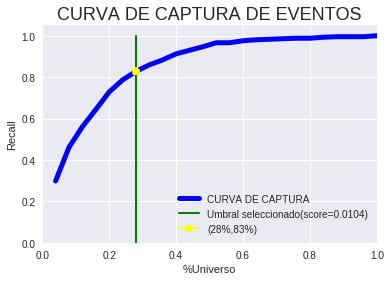

In [124]:
# Curva de captura o Recall
plt.figure()
l1=plt.plot(agg2['%Ctes'], agg2['Recall'], label='CURVA DE CAPTURA',linewidth=5,color='blue') 
l2=plt.plot([0.28, .28], [0, 1], 'r-',label='Umbral seleccionado(score=0.0104)',linewidth=2,color='green')
#l3=plt.plot([0, 1], [0, 1], 'k--',color='red',label='Aleatorio')
l4=plt.plot([0.28, .28], [0.8277, .8277], 'p-',color='yellow',ms=9,label='(28%,83%)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('%Universo')
plt.ylabel('Recall')
plt.title('CURVA DE CAPTURA DE EVENTOS',fontsize=18)
plt.legend(loc="lower right")
plt.show()

**Figura 23.-Curva de %universo vs. %eventos capturados o recall + umbral de selección**

Con esta curva podemos ver que con el 28% del universo de clientes capturamos el 83% de las contrataciones o Clientes que aceptan la oferta reduciendo de forma importante el tamaño de selección de la campaña.

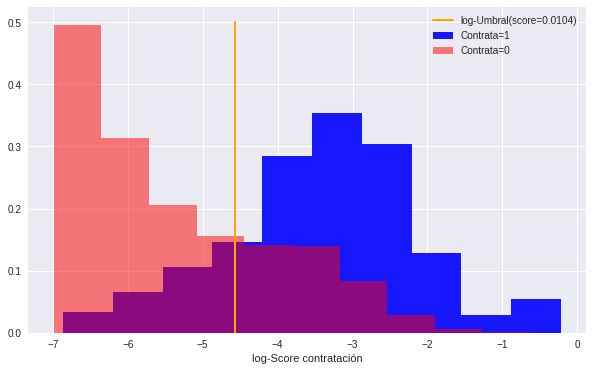

In [137]:
plt.figure(figsize=(10,6))
(data[data['contrata']==1]['score'].apply(lambda x: math.log(x))).hist(alpha=0.9,color='blue',
                                              bins=10,label='Contrata=1',normed=True)
(data[data['contrata']==0]['score'].apply(lambda x: math.log(x))).hist(alpha=0.5,color='red',
                                              bins=10,label='Contrata=0',normed=True)
plt.plot([-4.5659494728, -4.5659494728], [0, 0.5], 'r-',label='log-Umbral(score=0.0104)',linewidth=2,color='orange')

plt.legend()
plt.xlabel('log-Score contratación')

**Figura 24.-Gráfica del log-score + umbral de selección. ** 

Muestra las separación de las distribuciones del log-score de los clientes que contratan y no contratan, se puede ver que en los scores más altos la proporción de falsos postivos o universo de clientes que no contratan los préstamos, es menor, la separación ideal sería que en la gráfica las distribuciones no se intersectaran. 
En términos generales el modelo mlp3 separa bastante bien las poblaciones.

# Conclusiones


De acuerdo con nuestros resultados podemos concluir lo siguiente con respecto al modelo: 

1.-Mejoramos la efectividad de la campaña 3 veces es decir de una campaña de **1.17% a una de 3.45%.** 

2.-Se redujo el número de clientes a acampañar a tan sólo un 28% del universo, es decir descartamos a un 72% de los clientes que originalmente se les mandaban ofertas de préstamos lo cual reduce costos de comunicación.

3-De acuerdo con la matriz de confusión podemos observar que la efectividad o tasa de respuesta de los clientes descartados de la campaña o clasificados como no contratadores es de **71/25415=0.28%** lo cual es peor que seleccionar al azar (1.17%).

4.-Con el 28% del universo que se selcciona se captura casi el 83% de las contrataciones o clientes que contratan, es decir sólo sacrificamos el 17% de contrataciones.

5.-Más que un clasificador tenemos un modelo con un score que puede ordenar a los clientes de mayor a menor propensión a contratar un préstamo, esto nos ayuda a poder seleccionar los primeros $n$ clientes más propensos a tomar la oferta si es necesario escoger así.

**Siguientes pasos**

Uno de los problemas, planteados originalmente, a resolver es creación de distintas etiquetas de propenión a la toma de ofertas esta es necesaria para hacer grupos de prioridad de comunicación ya que como explicamos al principio no se comunican al mismo tiempo sino por bloques entonces al final para crear $k$ grupos de propensión (Muy prpenso,..,medio propenso,..,bajo propenso) tenemos que agrupar de acuerdo con nuestro score entonces hay que crear varios umbrales sobre el mismo score es decir un umbral para "Muy propensos", medios, bajos etc.
una forma de hacerlo es podemos buscar su estadístico KS después de cada corte por ejemplo comenzando con lo que ya tenemos, de los que clasificamos como 1's que son casi 10mil podemos buscar su KS y hacer un corte y análogamente con los que clasificamos como 0's y así hasta obtener la segmentación requerida.
Otro punto relevante es seguir buscando mejores parámetros par algunos algoritmos, con maquinas más potentes que puedan paralelizar ya que en este proyecto los tiempos de respuesta eran muy altos y por ello no se pudo probar con más.
Finalmente, una de las tareas pendientes es asignar un costo a los falsos positivos y falsos negativos para seleccionar un modelo basado en la utilidad que nos puede dar una campaña en vez de sólo utlizar la efectividad o precisión.



# Anexos


# Anexo1

**Variables numéricas originales**

In [25]:
#nu
#print(len(df))
#len(df.dropna(axis=1,how='all'))
#nu

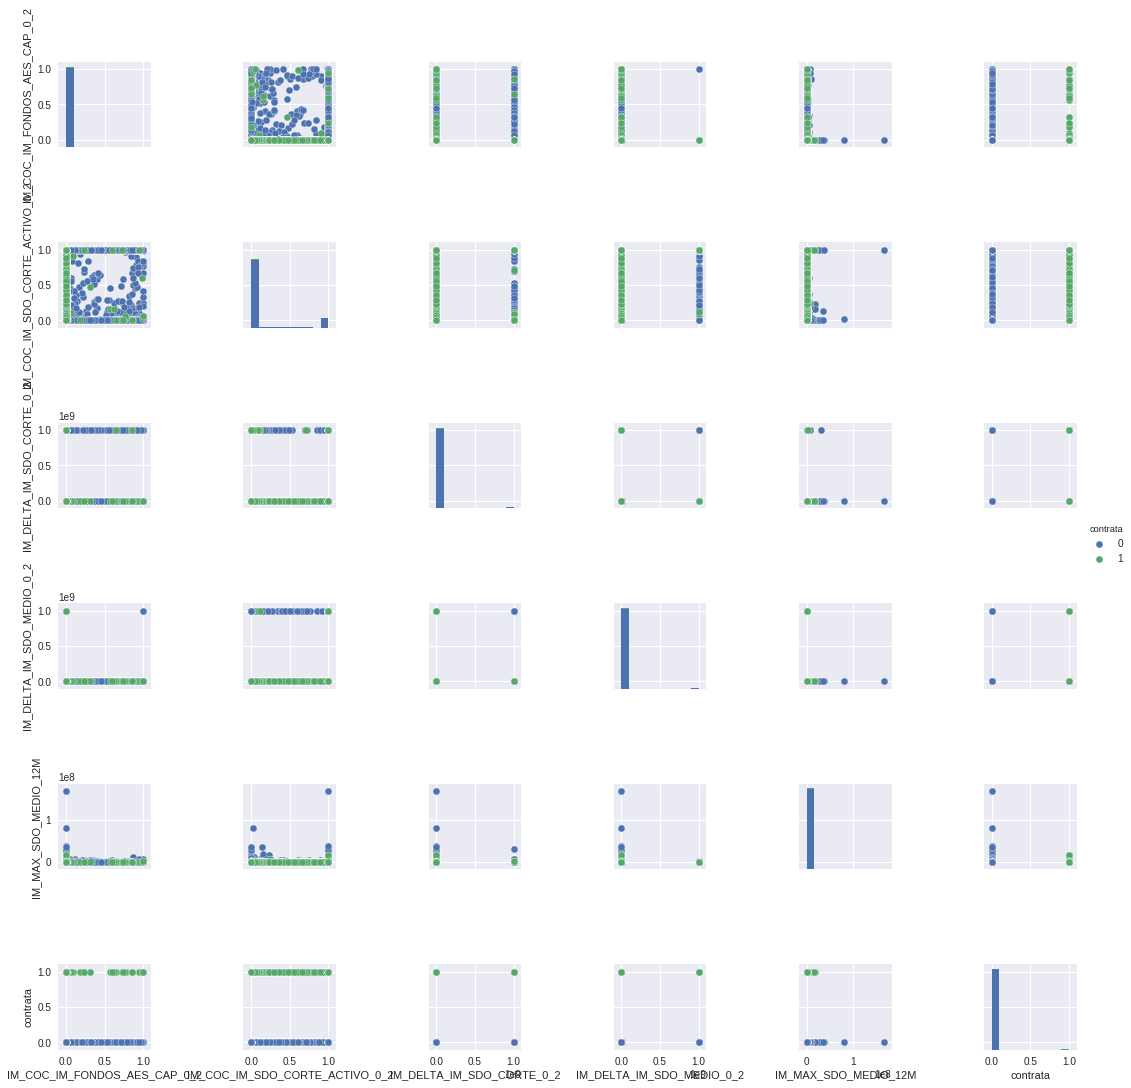

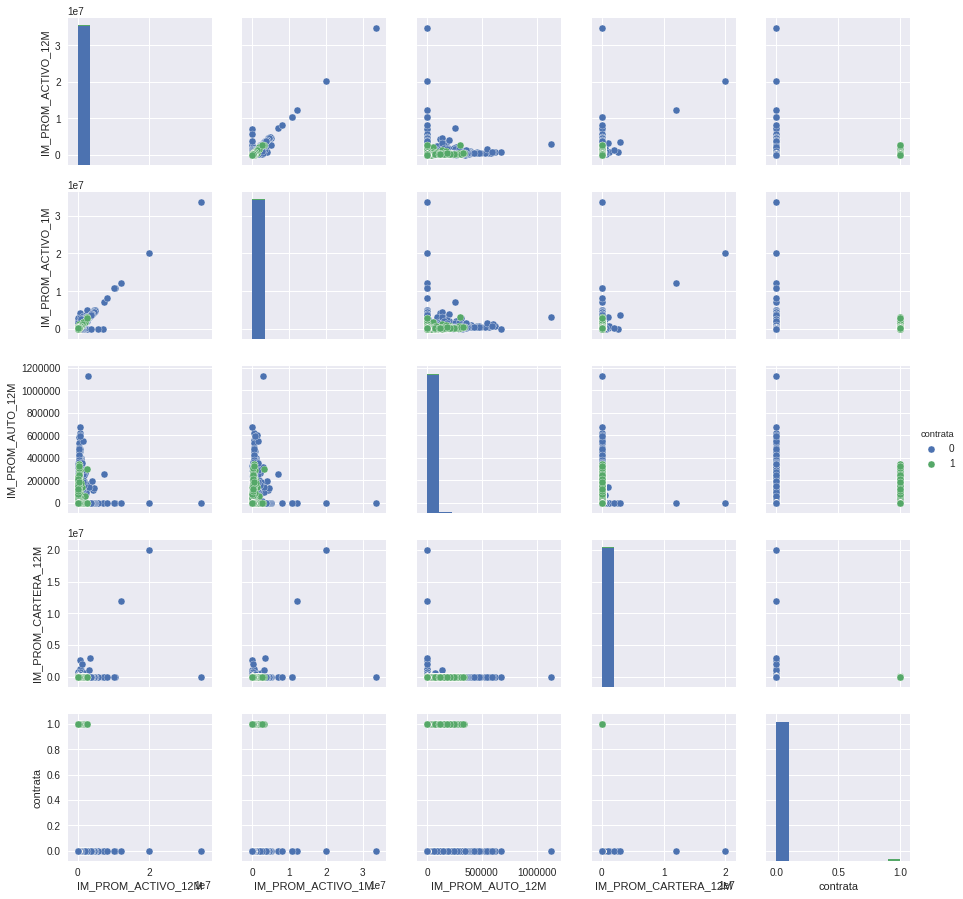

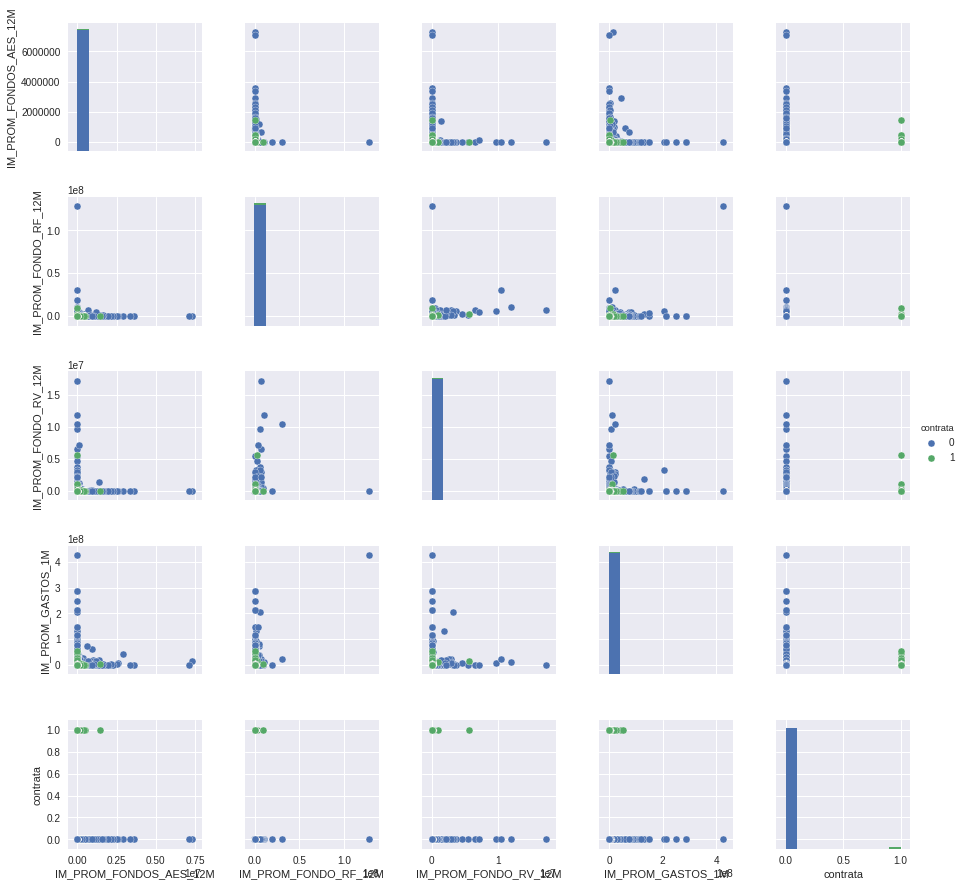

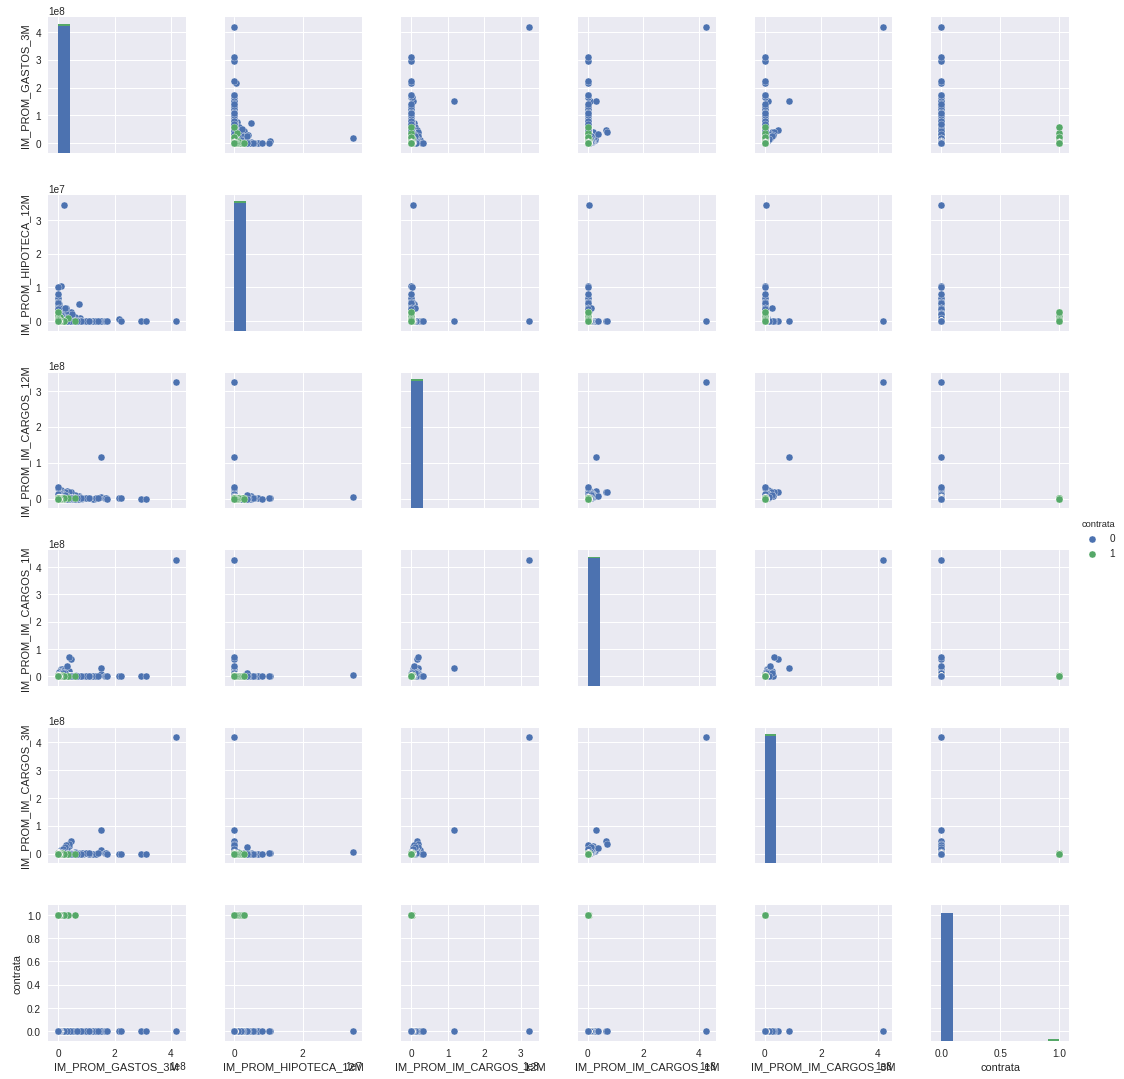

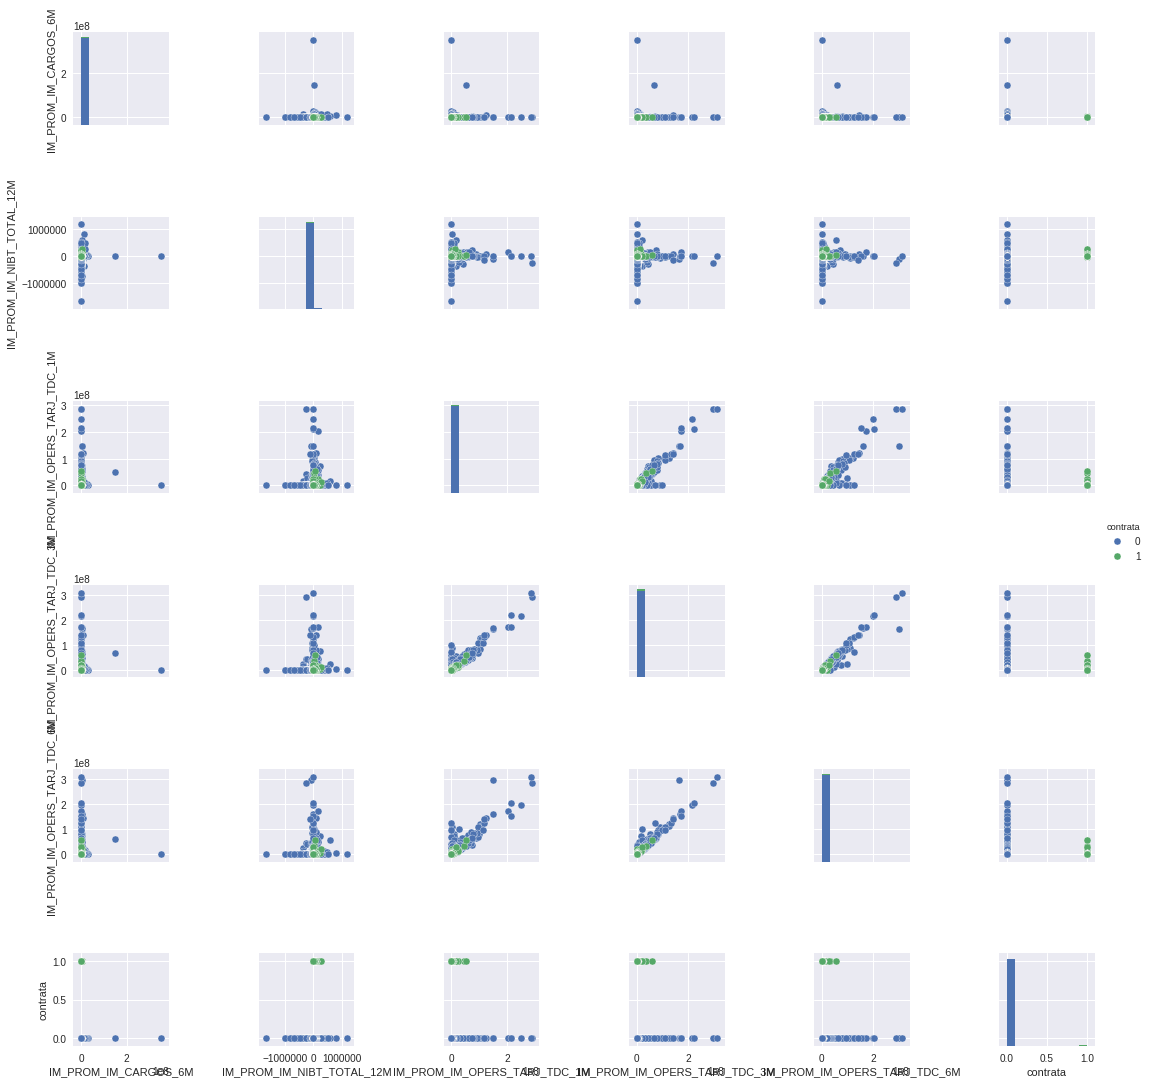

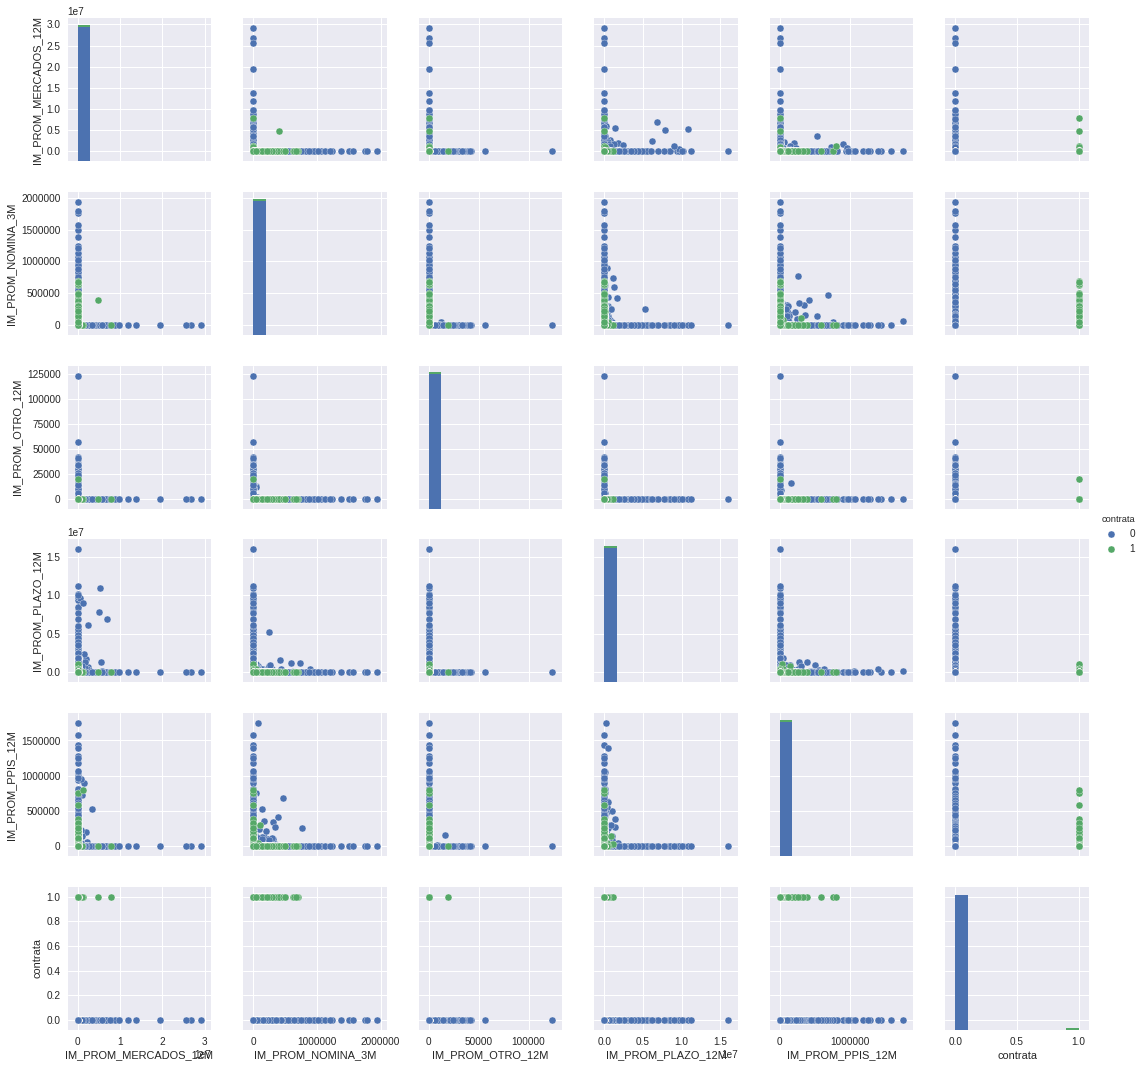

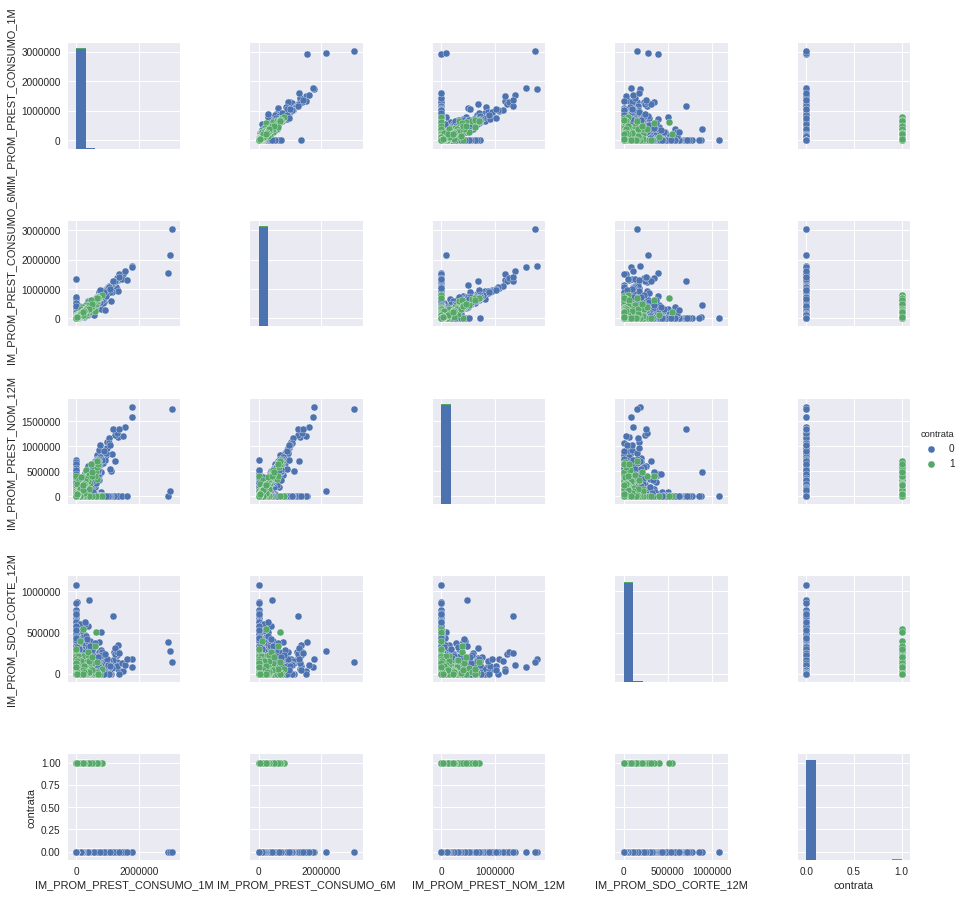

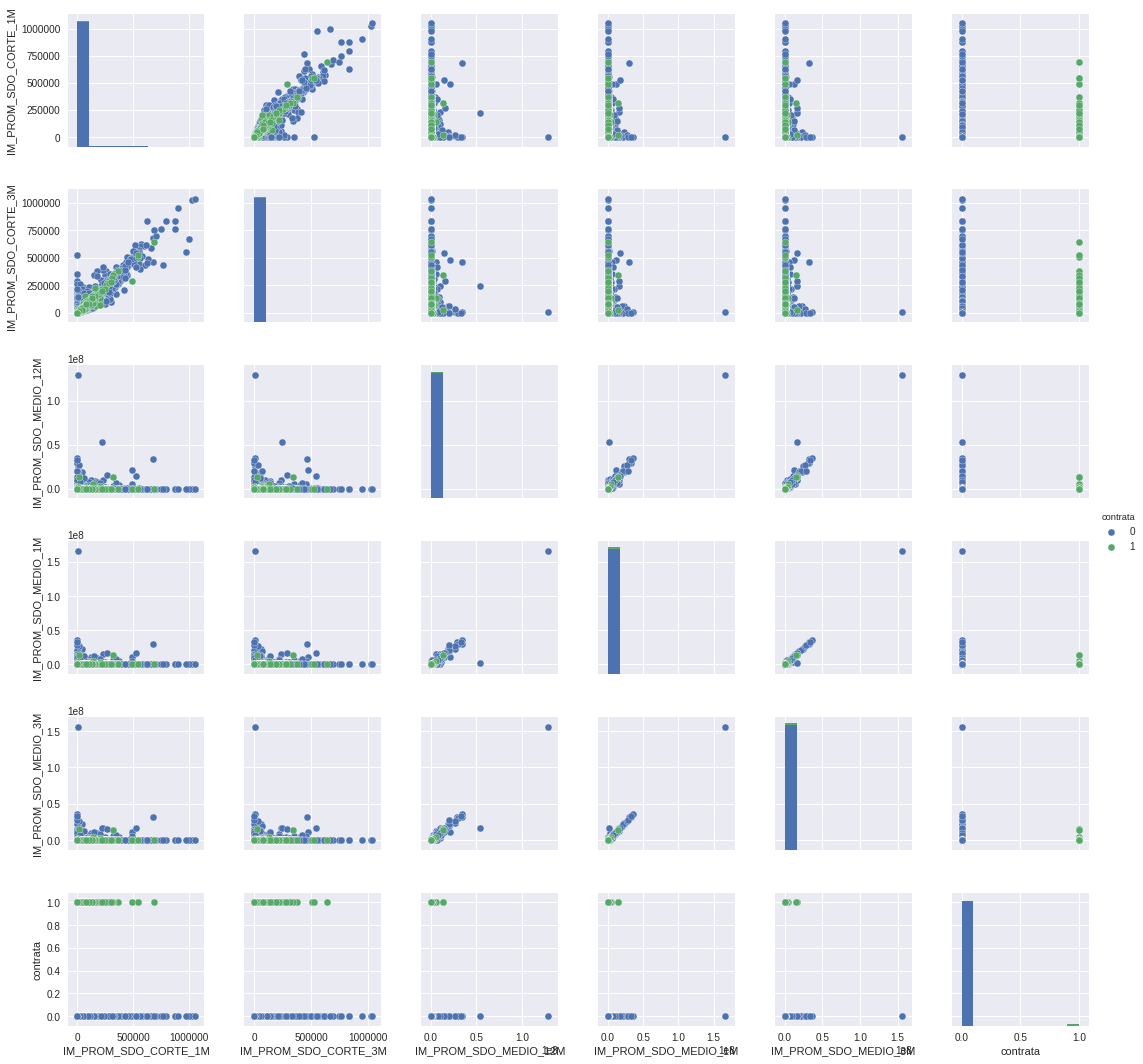

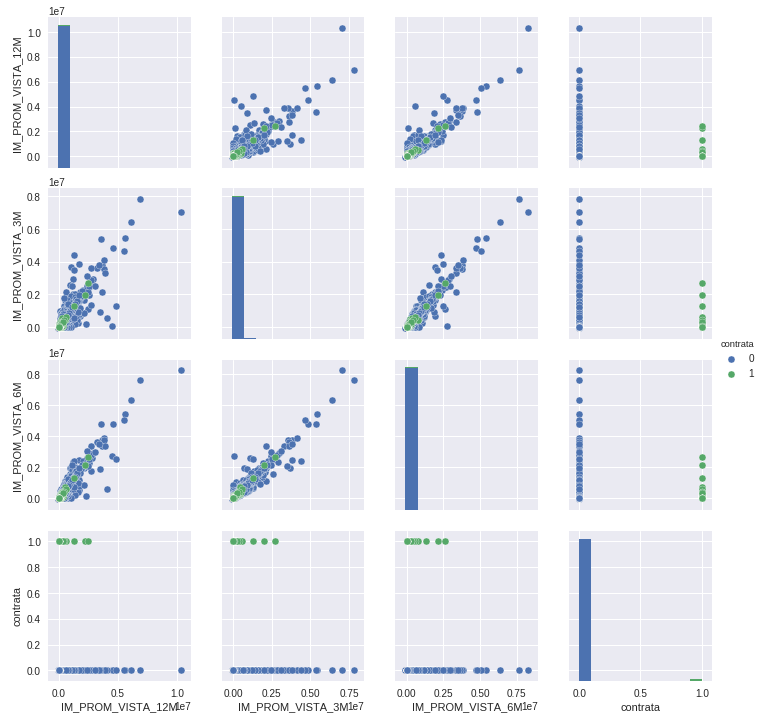

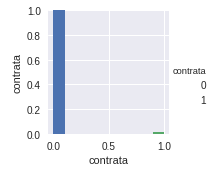

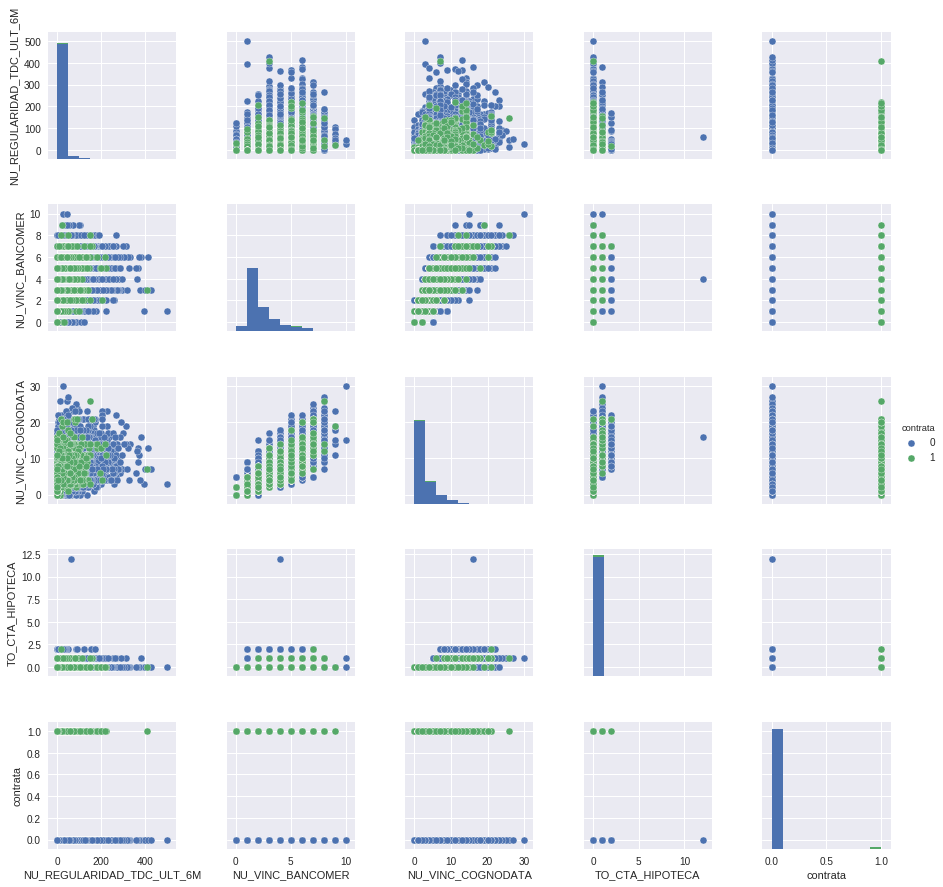

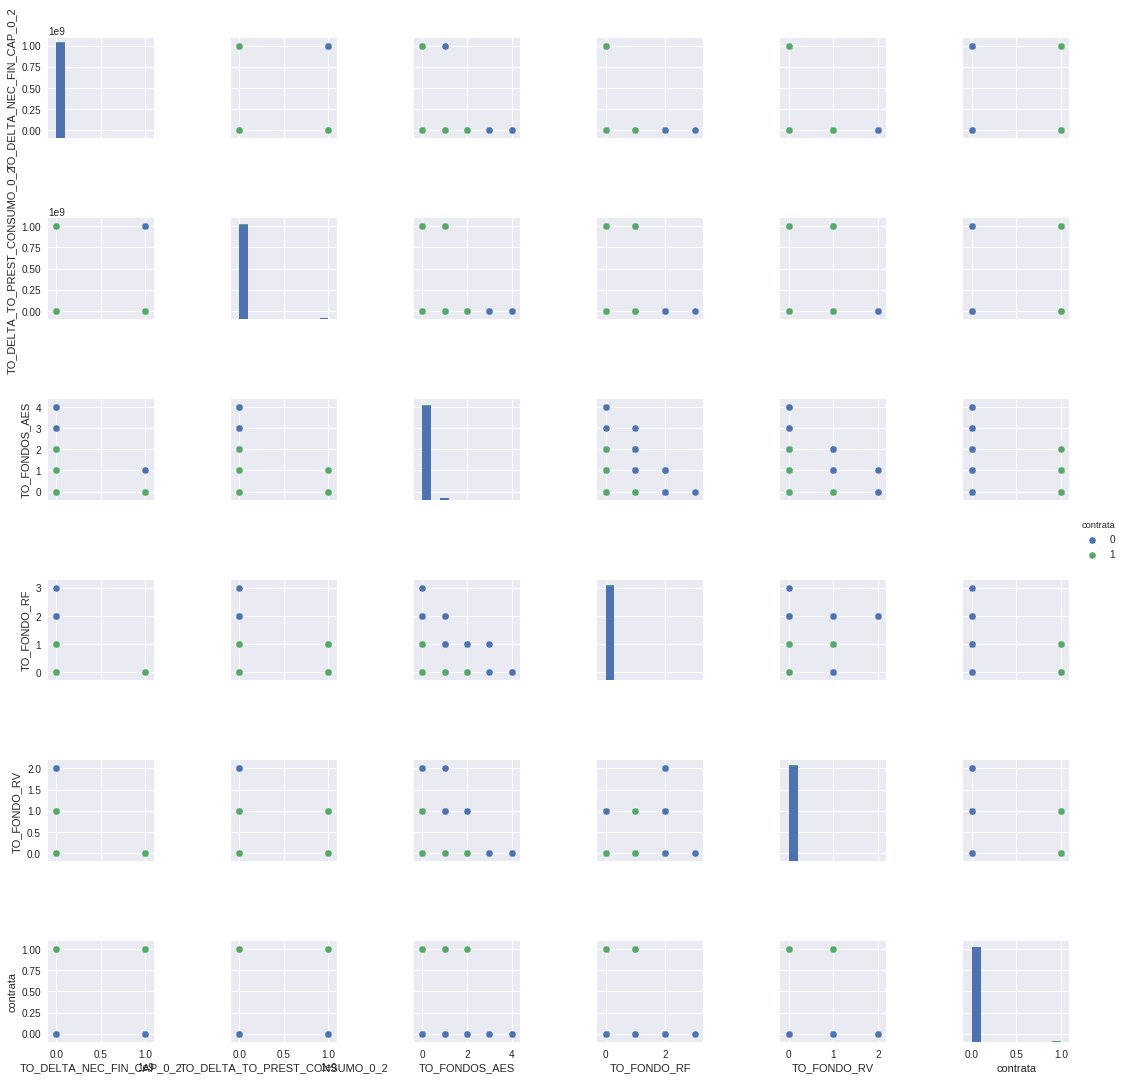

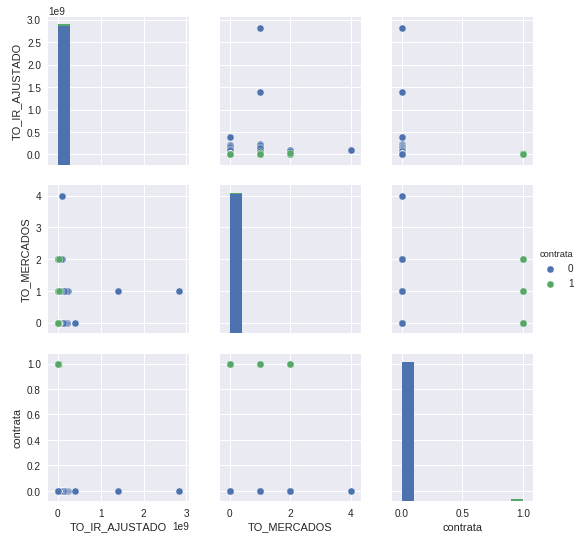

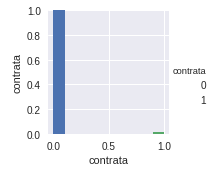

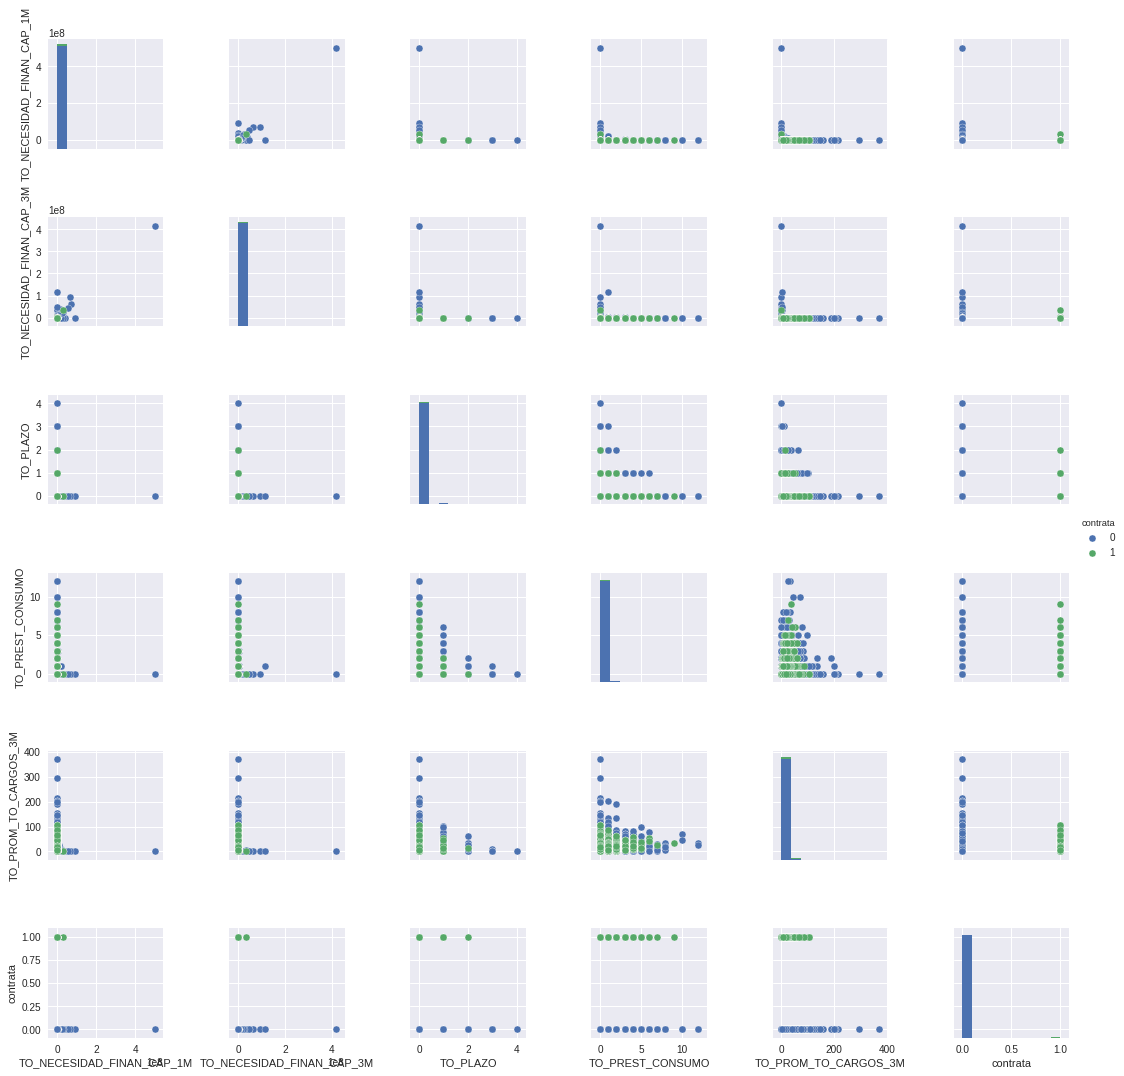

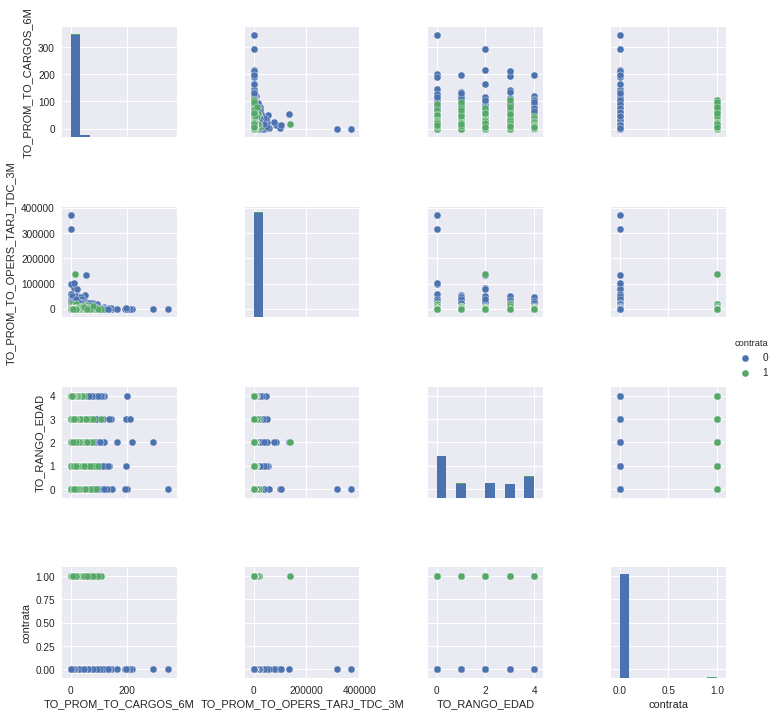

In [22]:

nu=sorted(vnum)
nu.remove('contrata')
for i in range(17):
    if (i>0 & i*5<80):
        sns.pairplot(df[nu[(i-1)*5:i*5]+['contrata']].dropna(axis=1), hue='contrata')
    elif(i*5>=80):
        sns.pairplot(df[nu[(i-1)*5:i*5-1]+['contrata']].dropna(axis=1), hue='contrata')
        

# Anexo2

**Variables categóricas originales**

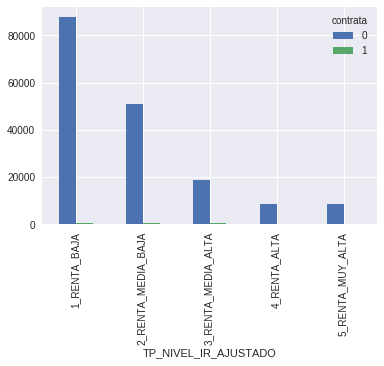

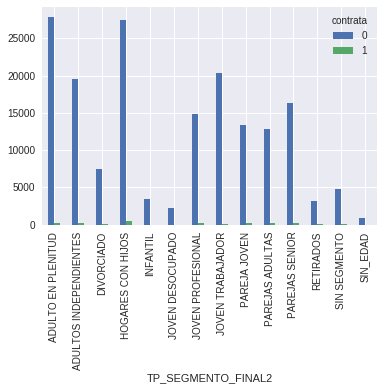

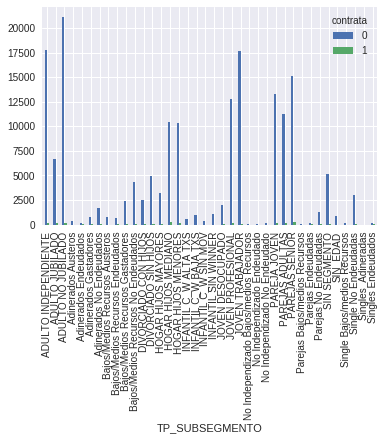

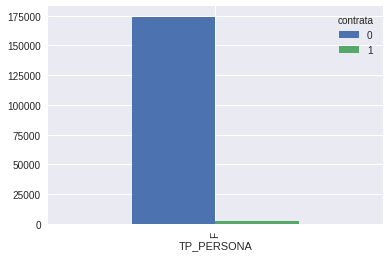

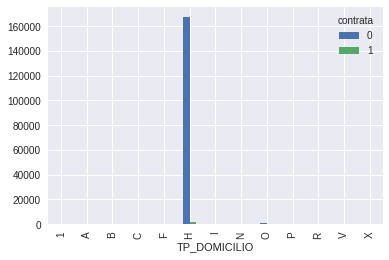

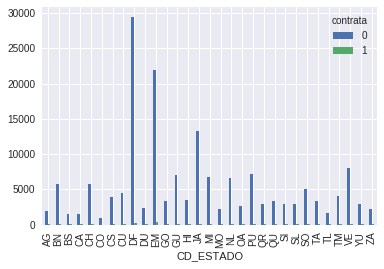

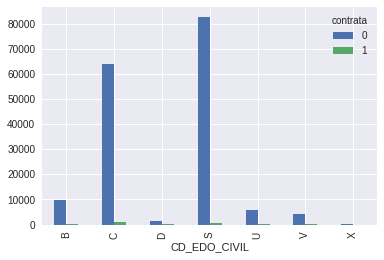

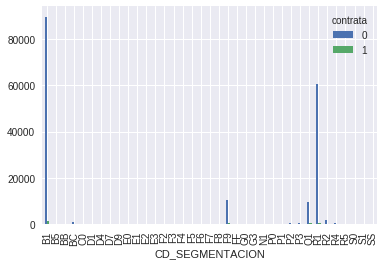

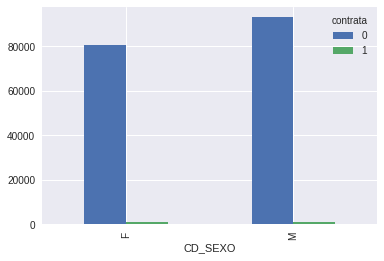

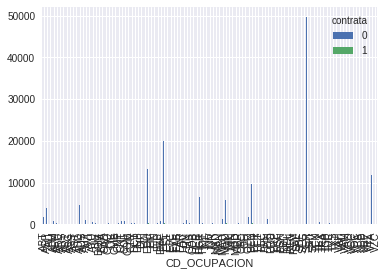

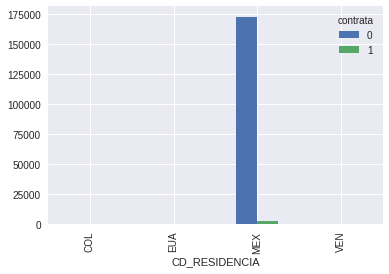

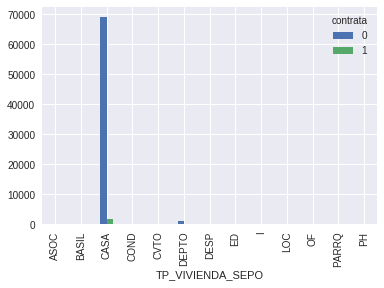

In [26]:
for w in vnom:
    a=df.groupby([w,'contrata']).size()
    a=a.unstack()
    a.plot(kind='bar')

# Anexo3

**Variables numéricas transformadas**

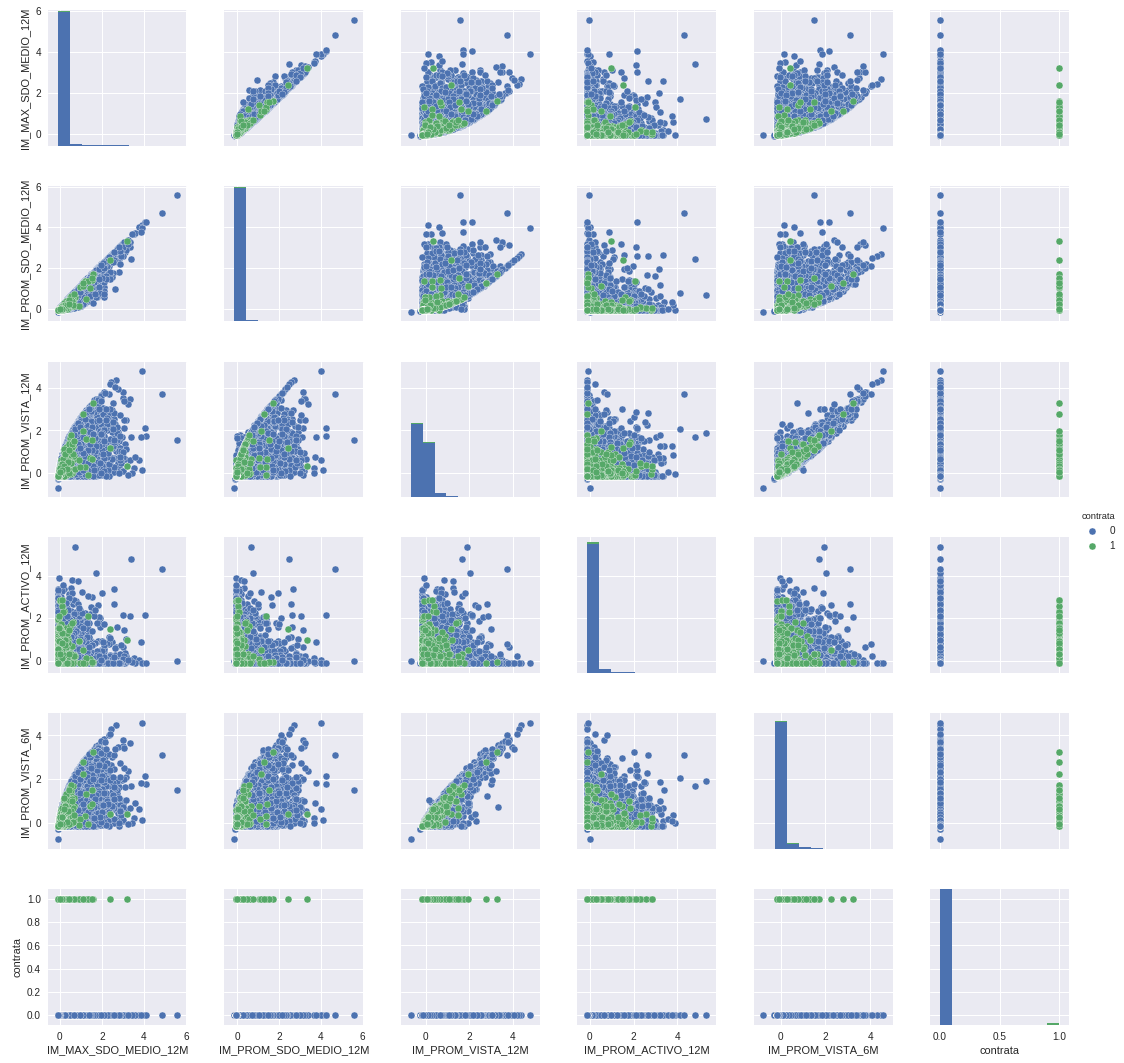

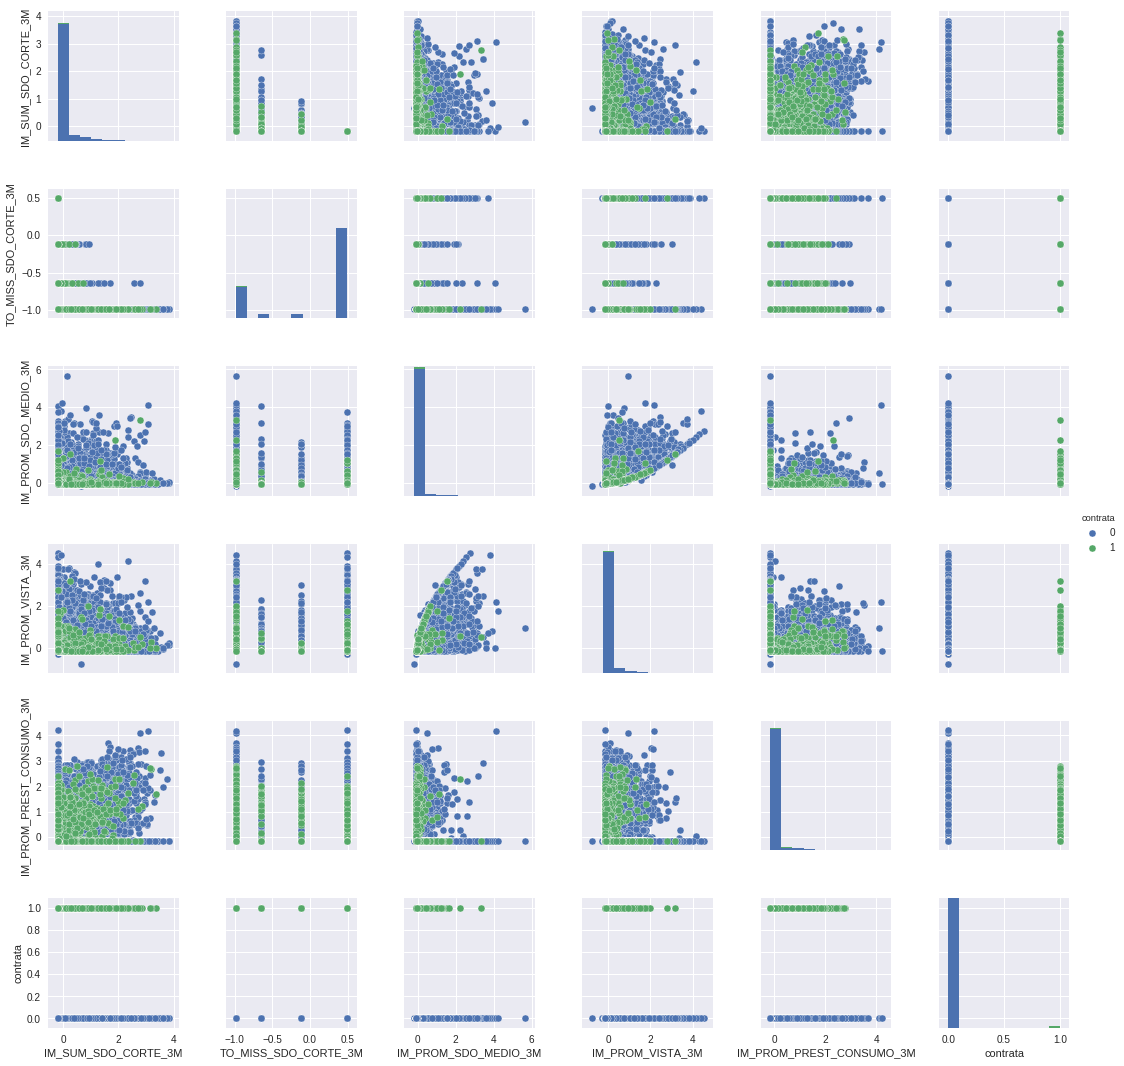

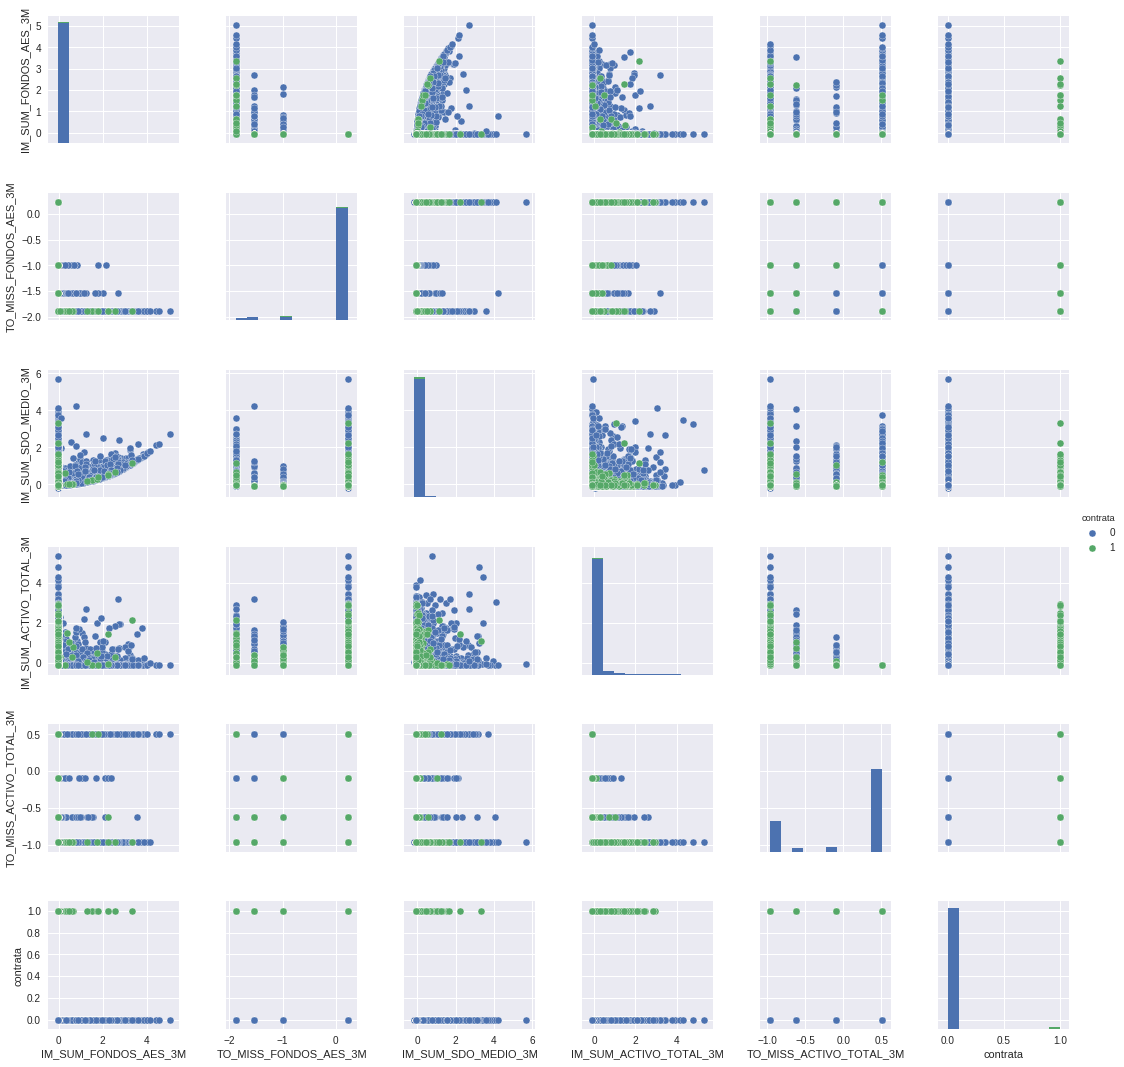

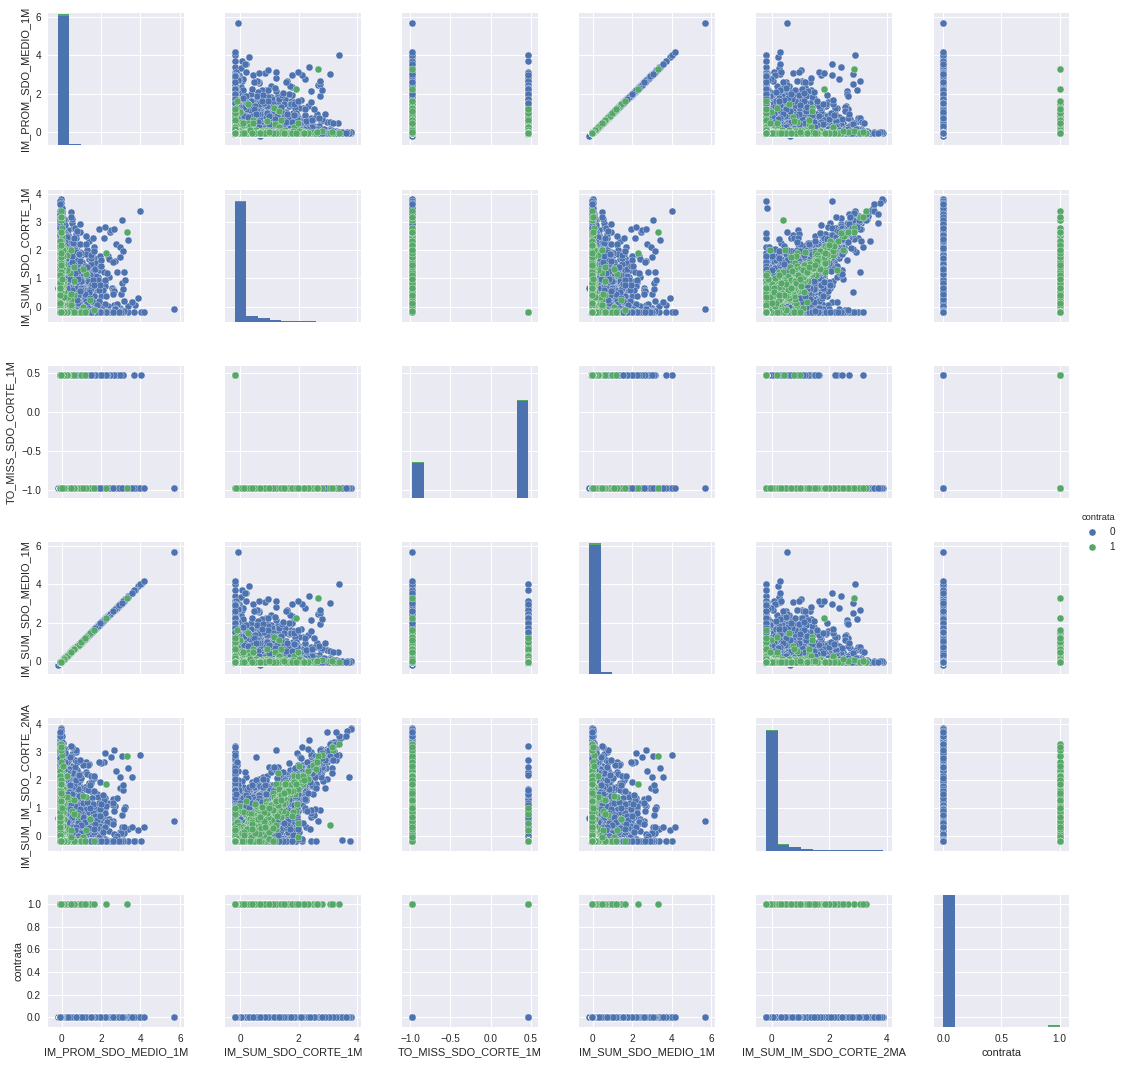

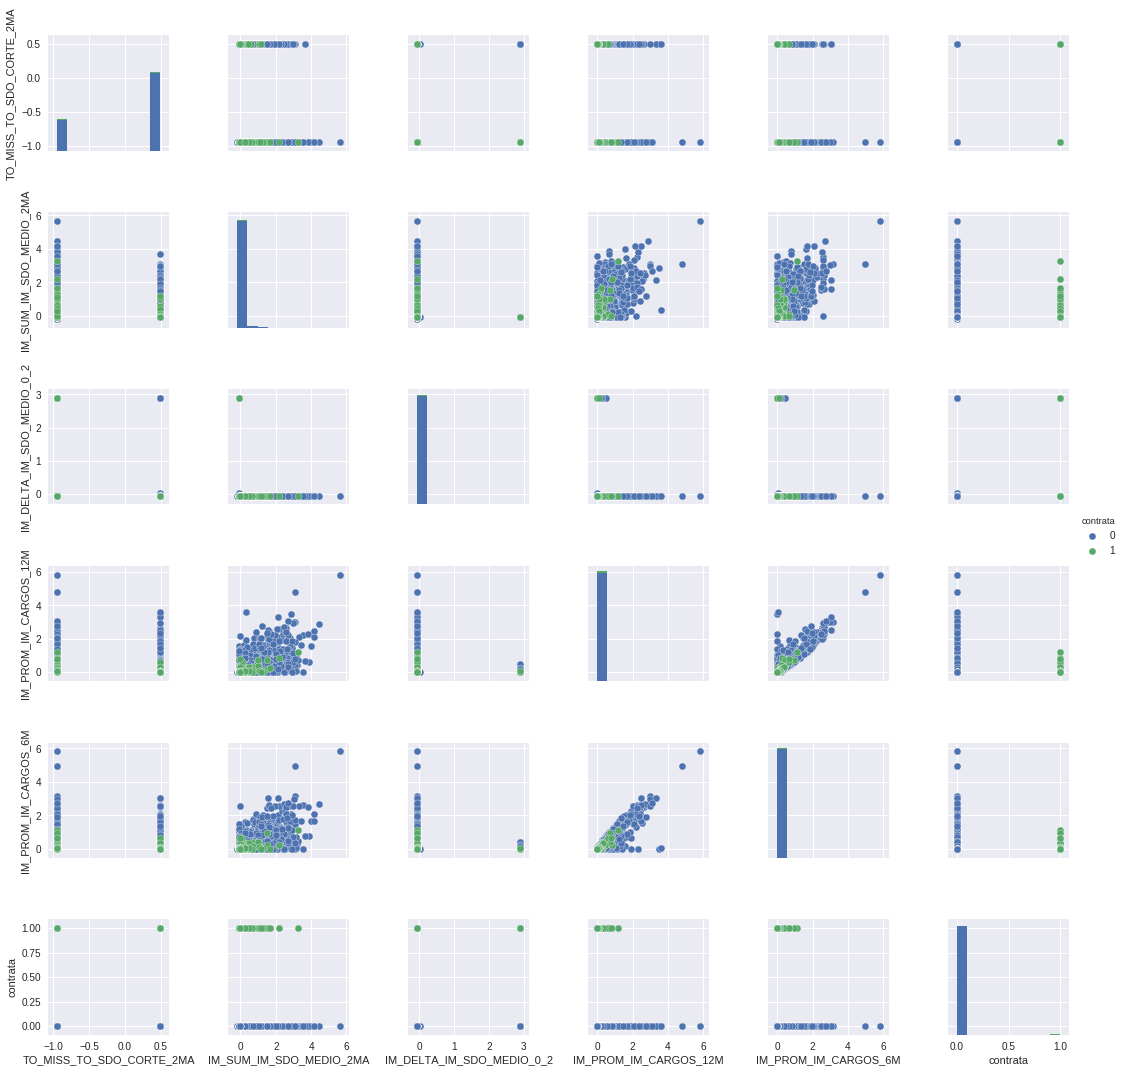

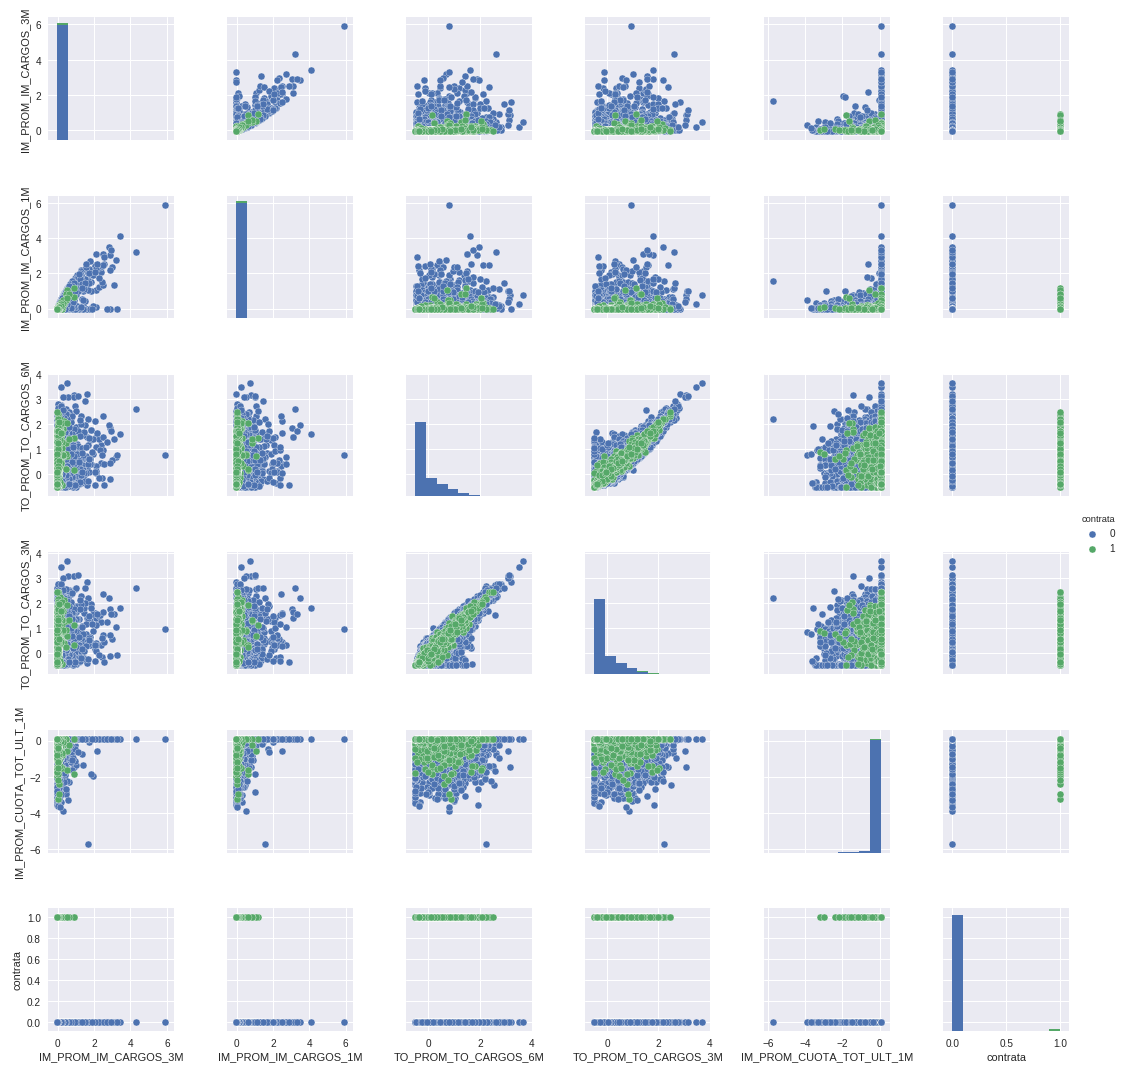

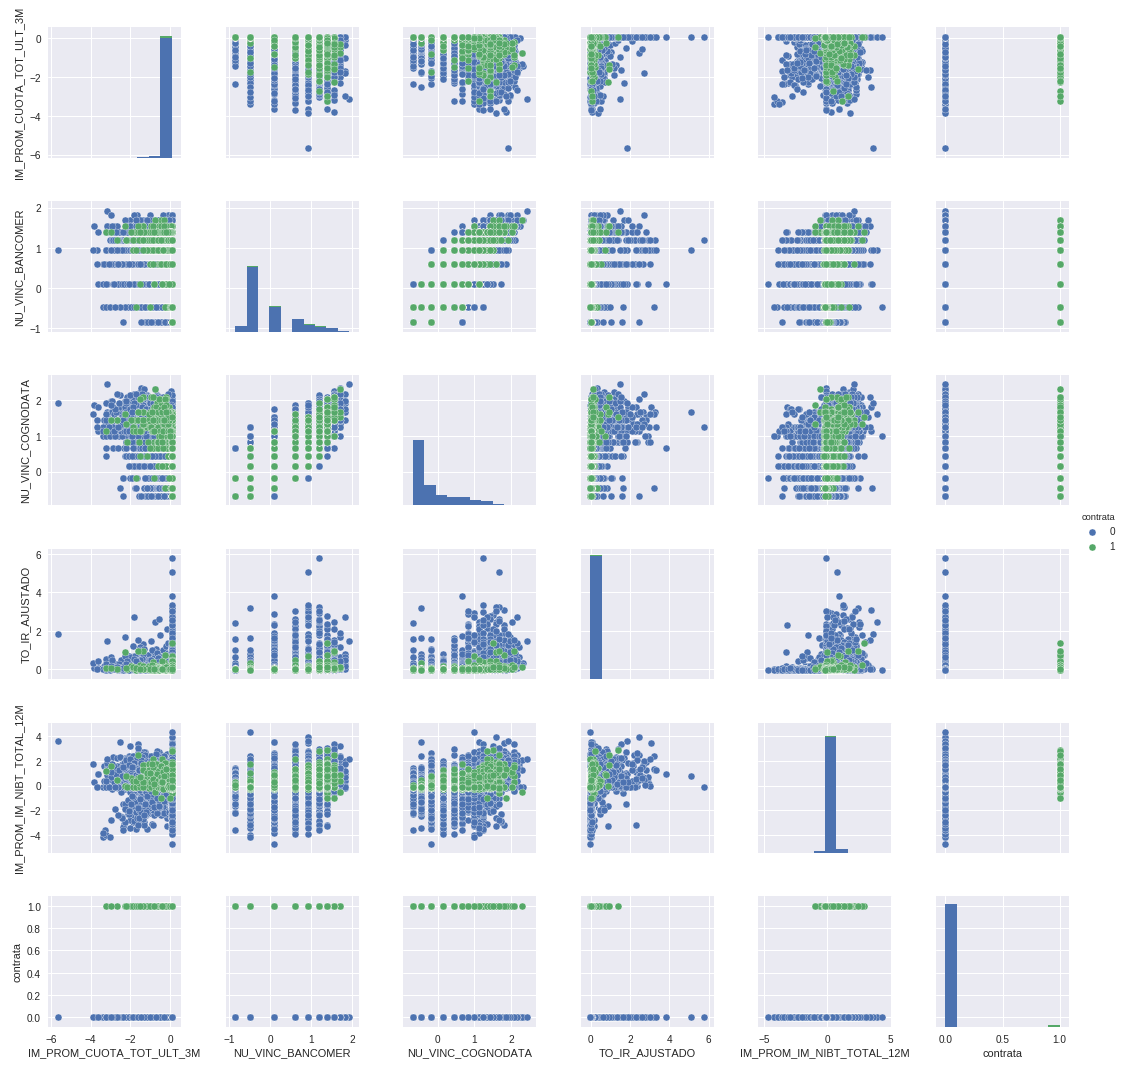

In [94]:
for i in range(8):
    if i>0:
        sns.pairplot(aux[num[(i-1)*5:i*5]+['contrata']], hue='contrata')

# Anexo4

**Selección de variables por correlación**

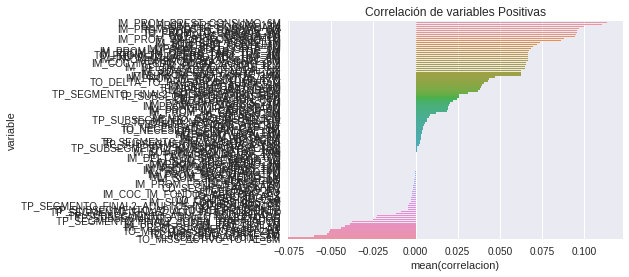

CPU times: user 2.14 s, sys: 404 ms, total: 2.54 s
Wall time: 2.12 s


In [108]:
ax = plt.axes()
sns.barplot(y='variable',x='correlacion',data=tabcor.sort_values(by='correlacion',ascending=False))
ax.set_title('Correlación de variables Positivas')
%time plt.show()

# Anexo5

**Selección de variables correlación con el target **    

In [117]:
print('Número de Variables:',len(a[abs(a['correlacion'])>0.05])) 
a[abs(a['correlacion'])>0.05]

Número de Variables: 32


variable  correlacion
17         IM_PROM_PREST_CONSUMO_6M     0.113385
2             IM_PROM_PREST_NOM_12M     0.110579
66                NU_VINC_COGNODATA     0.100227
24         IM_PROM_PREST_CONSUMO_3M     0.097032
48             TO_PROM_TO_CARGOS_6M     0.096008
49             TO_PROM_TO_CARGOS_3M     0.095624
23                IM_PROM_NOMINA_3M     0.095091
65                 NU_VINC_BANCOMER     0.094894
33         IM_PROM_PREST_CONSUMO_1M     0.087862
32                IM_PROM_ACTIVO_1M     0.086590
34              IM_SUM_SDO_CORTE_1M     0.074010
60                 TO_PREST_CONSUMO     0.072303
19              IM_SUM_SDO_CORTE_3M     0.069643
30             IM_PROM_SDO_CORTE_1M     0.068497
50     IM_PROM_IM_OPERS_TARJ_TDC_1M     0.067509
51     IM_PROM_IM_OPERS_TARJ_TDC_3M     0.066624
52     TO_PROM_TO_OPERS_TARJ_TDC_3M     0.066624
62        NU_REGULARIDAD_TDC_ULT_6M     0.066578
53     IM_PROM_IM_OPERS_TARJ_TDC_6M     0.066578
18             IM_PROM_SDO_CORTE_3M     0.066542
41   IM_COC_IM_SDO_CORTE_ACTIVO_0_2     0.065833
15               IM_PROM_ACTIVO_12M     0.065814
42        IM_DELTA_IM_SDO_CORTE_0_2     0.064993
28           IM_SUM_ACTIVO_TOTAL_3M     0.064769
98               CD_SEGMENTACION_OT     0.062741
7             IM_PROM_SDO_CORTE_12M     0.062542
37          IM_SUM_IM_SDO_CORTE_2MA     0.062384
38         TO_MISS_TO_SDO_CORTE_2MA    -0.050689
35             TO_MISS_SDO_CORTE_1M    -0.051625
20             TO_MISS_SDO_CORTE_3M    -0.052575
106                CD_OCUPACION_SER    -0.060371
29          TO_MISS_ACTIVO_TOTAL_3M    -0.075900

# Anexo6

**Selección de variables por importancia de variables Random Forest **  

In [146]:
print('Número de Variables:',len(b[b['v_importance']>0.01])) 
b[b['v_importance']>0.01]

Número de Variables: 36


feature  v_importance
73   TO_NECESIDAD_FINAN_CAP_1M      0.028514
48        TO_PROM_TO_CARGOS_6M      0.028227
49        TO_PROM_TO_CARGOS_3M      0.027313
74   TO_NECESIDAD_FINAN_CAP_3M      0.026983
69   IM_PROM_IM_NIBT_TOTAL_12M      0.025722
71           IM_PROM_GASTOS_1M      0.024893
45        IM_PROM_IM_CARGOS_6M      0.024427
67              TO_IR_AJUSTADO      0.024380
72           IM_PROM_GASTOS_3M      0.024120
47        IM_PROM_IM_CARGOS_1M      0.023777
44       IM_PROM_IM_CARGOS_12M      0.023657
46        IM_PROM_IM_CARGOS_3M      0.023180
39     IM_SUM_IM_SDO_MEDIO_2MA      0.022450
0         IM_MAX_SDO_MEDIO_12M      0.022443
16            IM_PROM_VISTA_6M      0.021906
9            IM_PROM_VISTA_12M      0.021570
22            IM_PROM_VISTA_3M      0.021410
27         IM_SUM_SDO_MEDIO_3M      0.021339
21        IM_PROM_SDO_MEDIO_3M      0.021282
36         IM_SUM_SDO_MEDIO_1M      0.021225
8        IM_PROM_SDO_MEDIO_12M      0.020639
31        IM_PROM_SDO_MEDIO_1M      0.020201
70               TO_RANGO_EDAD      0.018720
66           NU_VINC_COGNODATA      0.018047
65            NU_VINC_BANCOMER      0.016553
68        TP_NIVEL_IR_AJUSTADO      0.015685
15          IM_PROM_ACTIVO_12M      0.015298
28      IM_SUM_ACTIVO_TOTAL_3M      0.014075
19         IM_SUM_SDO_CORTE_3M      0.011742
24    IM_PROM_PREST_CONSUMO_3M      0.011444
75    TO_DELTA_NEC_FIN_CAP_0_2      0.011259
34         IM_SUM_SDO_CORTE_1M      0.011229
60            TO_PREST_CONSUMO      0.011150
37     IM_SUM_IM_SDO_CORTE_2MA      0.010963
91                CD_ESTADO_OT      0.010873
104           CD_OCUPACION_OTR      0.010053

# Anexo7

**Selección de variables por estadístico F **  

In [152]:
print('Número de Variables:',len(kbest_feat[kbest_feat['P Value']<0.05])) 
kbest_feat[kbest_feat['P Value']<0.05][['Attribute','F Score','P Value']]

Número de Variables: 65


Attribute      F Score        P Value
17                IM_PROM_PREST_CONSUMO_6M  1837.134325   0.000000e+00
2                    IM_PROM_PREST_NOM_12M  1746.211533   0.000000e+00
66                       NU_VINC_COGNODATA  1431.418713  1.158220e-311
24                IM_PROM_PREST_CONSUMO_3M  1340.745299  3.764763e-292
48                    TO_PROM_TO_CARGOS_6M  1312.337169  4.916031e-286
49                    TO_PROM_TO_CARGOS_3M  1301.775504  9.241268e-284
23                       IM_PROM_NOMINA_3M  1287.173769  1.288396e-280
65                        NU_VINC_BANCOMER  1281.776133  1.872654e-279
33                IM_PROM_PREST_CONSUMO_1M  1097.429181  1.003492e-239
32                       IM_PROM_ACTIVO_1M  1065.658664  7.148593e-233
29                 TO_MISS_ACTIVO_TOTAL_3M   817.348257  2.976870e-179
34                     IM_SUM_SDO_CORTE_1M   776.924877  1.633750e-170
60                        TO_PREST_CONSUMO   741.318027  8.200389e-163
19                     IM_SUM_SDO_CORTE_3M   687.509429  3.594019e-151
30                    IM_PROM_SDO_CORTE_1M   664.956736  2.733112e-146
50            IM_PROM_IM_OPERS_TARJ_TDC_1M   645.837714  3.761724e-142
51            IM_PROM_IM_OPERS_TARJ_TDC_3M   628.932089  1.720283e-138
52            TO_PROM_TO_OPERS_TARJ_TDC_3M   628.932089  1.720283e-138
53            IM_PROM_IM_OPERS_TARJ_TDC_6M   628.056134  2.662366e-138
62               NU_REGULARIDAD_TDC_ULT_6M   628.056134  2.662366e-138
18                    IM_PROM_SDO_CORTE_3M   627.372304  3.744005e-138
41          IM_COC_IM_SDO_CORTE_ACTIVO_0_2   614.021173  2.913616e-135
15                      IM_PROM_ACTIVO_12M   613.661598  3.485789e-135
42               IM_DELTA_IM_SDO_CORTE_0_2   598.381530  7.105031e-132
28                  IM_SUM_ACTIVO_TOTAL_3M   594.243662  5.595073e-131
98                      CD_SEGMENTACION_OT   557.468790  5.184045e-123
7                    IM_PROM_SDO_CORTE_12M   553.926226  3.035862e-122
37                 IM_SUM_IM_SDO_CORTE_2MA   551.116840  1.233242e-121
106                       CD_OCUPACION_SER   515.999314  5.037065e-114
20                    TO_MISS_SDO_CORTE_3M   390.987838   6.620198e-87
35                    TO_MISS_SDO_CORTE_1M   376.959912   7.355277e-84
38                TO_MISS_TO_SDO_CORTE_2MA   363.378067   6.547039e-81
69               IM_PROM_IM_NIBT_TOTAL_12M   314.960359   2.164682e-70
99                      CD_SEGMENTACION_R1   275.146409   9.815817e-62
94                          CD_EDO_CIVIL_C   265.333550   1.338138e-59
61           TO_DELTA_TO_PREST_CONSUMO_0_2   261.603806   8.668424e-59
64                IM_PROM_CUOTA_TOT_ULT_3M   247.305303   1.120261e-55
3                         IM_PROM_AUTO_12M   230.103166   6.221652e-52
72                       IM_PROM_GASTOS_3M   219.835147   1.071120e-49
96                          CD_EDO_CIVIL_S   214.562072   1.507745e-48
68                    TP_NIVEL_IR_AJUSTADO   211.769959   6.116833e-48
71                       IM_PROM_GASTOS_1M   206.229458   9.852488e-47
63                IM_PROM_CUOTA_TOT_ULT_1M   201.075875   1.307536e-45
102                       CD_OCUPACION_EDU   196.946839   1.038136e-44
78    TP_SEGMENTO_FINAL2_HOGARES CON HIJOS   135.957454   2.107373e-31
85                 TP_SUBSEGMENTO_OTROSEGM    94.638284   2.322877e-22
105                       CD_OCUPACION_PEN    94.072650   3.090612e-22
79     TP_SEGMENTO_FINAL2_JOVEN TRABAJADOR    89.426388   3.229057e-21
104                       CD_OCUPACION_OTR    87.061002   1.066803e-20
84         TP_SUBSEGMENTO_JOVEN TRABAJADOR    77.684635   1.222107e-18
82       TP_SUBSEGMENTO_ADULTO NO JUBILADO    72.807484   1.443195e-17
4                         IM_PROM_PPIS_12M    68.975385   1.005684e-16
47                    IM_PROM_IM_CARGOS_1M    57.425731   3.531134e-14
44                   IM_PROM_IM_CARGOS_12M    54.278217   1.749644e-13
67                          TO_IR_AJUSTADO    52.922236   3.488099e-13
45                    IM_PROM_IM_CARGOS_6M    52.585124  

# Anexo8

**Selección de variables por AUC-Variables ** 

In [116]:
print('Número de Variables:',len(ll[ll['roc']>0.6])) 
ll[ll['roc']>0.6]

Número de Variables: 43


variable       roc
45            IM_PROM_IM_CARGOS_6M  0.746829
46            IM_PROM_IM_CARGOS_3M  0.744452
44           IM_PROM_IM_CARGOS_12M  0.743873
47            IM_PROM_IM_CARGOS_1M  0.739342
48            TO_PROM_TO_CARGOS_6M  0.732587
72               IM_PROM_GASTOS_3M  0.732213
49            TO_PROM_TO_CARGOS_3M  0.731875
71               IM_PROM_GASTOS_1M  0.731477
66               NU_VINC_COGNODATA  0.720574
15              IM_PROM_ACTIVO_12M  0.716312
65                NU_VINC_BANCOMER  0.709723
73       TO_NECESIDAD_FINAN_CAP_1M  0.705235
28          IM_SUM_ACTIVO_TOTAL_3M  0.699075
67                  TO_IR_AJUSTADO  0.684564
74       TO_NECESIDAD_FINAN_CAP_3M  0.683527
32               IM_PROM_ACTIVO_1M  0.670085
17        IM_PROM_PREST_CONSUMO_6M  0.665963
24        IM_PROM_PREST_CONSUMO_3M  0.647173
2            IM_PROM_PREST_NOM_12M  0.644600
0             IM_MAX_SDO_MEDIO_12M  0.632896
19             IM_SUM_SDO_CORTE_3M  0.632856
34             IM_SUM_SDO_CORTE_1M  0.631903
53    IM_PROM_IM_OPERS_TARJ_TDC_6M  0.625585
62       NU_REGULARIDAD_TDC_ULT_6M  0.625585
18            IM_PROM_SDO_CORTE_3M  0.624421
30            IM_PROM_SDO_CORTE_1M  0.623725
51    IM_PROM_IM_OPERS_TARJ_TDC_3M  0.623676
52    TO_PROM_TO_OPERS_TARJ_TDC_3M  0.623676
50    IM_PROM_IM_OPERS_TARJ_TDC_1M  0.622931
7            IM_PROM_SDO_CORTE_12M  0.622781
33        IM_PROM_PREST_CONSUMO_1M  0.620650
41  IM_COC_IM_SDO_CORTE_ACTIVO_0_2  0.616366
37         IM_SUM_IM_SDO_CORTE_2MA  0.616200
16                IM_PROM_VISTA_6M  0.615533
23               IM_PROM_NOMINA_3M  0.614473
9                IM_PROM_VISTA_12M  0.613844
22                IM_PROM_VISTA_3M  0.609063
8            IM_PROM_SDO_MEDIO_12M  0.608905
68            TP_NIVEL_IR_AJUSTADO  0.606427
27             IM_SUM_SDO_MEDIO_3M  0.606261
21            IM_PROM_SDO_MEDIO_3M  0.604394
39         IM_SUM_IM_SDO_MEDIO_2MA  0.601452
98              CD_SEGMENTACION_OT  0.600417

# Anexo9

**Explicación de PCA con respecto a variables originales, en las primeras 5 componentes ** 

Gráfica de las variables 40-80

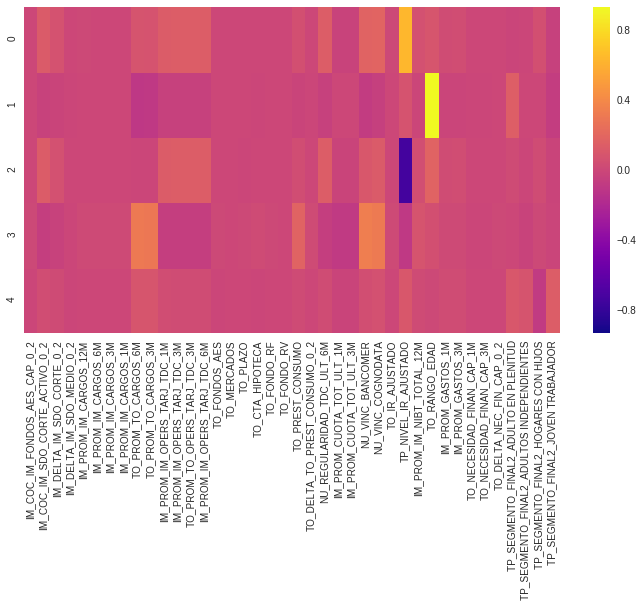

In [120]:
df_comp = pd.DataFrame(pca.components_,columns=features)
df_comp
plt.figure(figsize=(12,6))
sns.heatmap(df_comp[features[40:80]][0:5],cmap='plasma',) 

Variables de 80 a 120

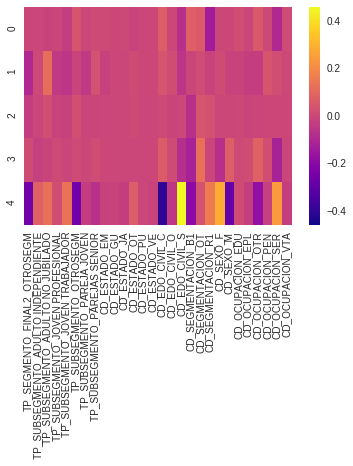

In [121]:
sns.heatmap(df_comp[features[80:120]][0:5],cmap='plasma',) 

# Anexo10 

**Desempeño de cada modelo haciendo cross validation con 30 iteraciones**

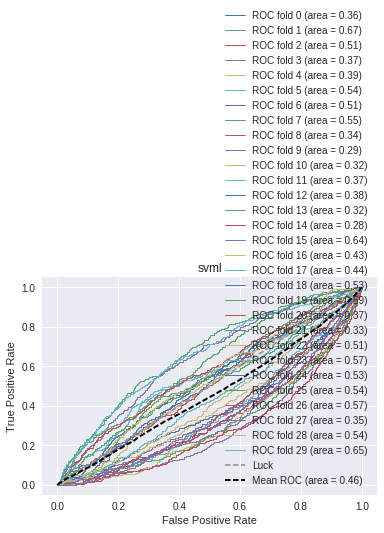

In [91]:
from PIL import Image
myImage = Image.open("/home/abraham/Proyml-vf-img/svmcv.png");
myImage

Curvas ROC por iteracion  del modelo svml, maquina de soporte vectorial kernel lineal,AUC promedio=0.46

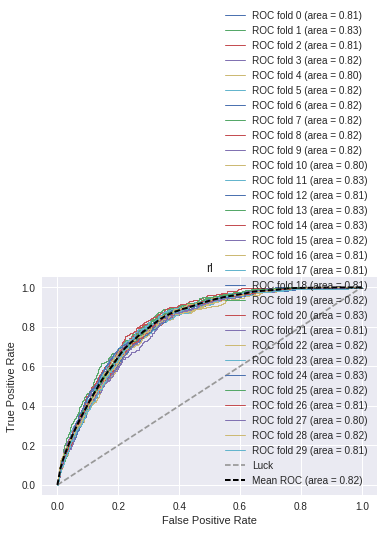

In [92]:
from PIL import Image
myImage = Image.open("/home/abraham/Proyml-vf-img/RLcv.png");
myImage

Curvas ROC por iteracion  del modelo rl, Regresión Logística,AUC promedio=0.82

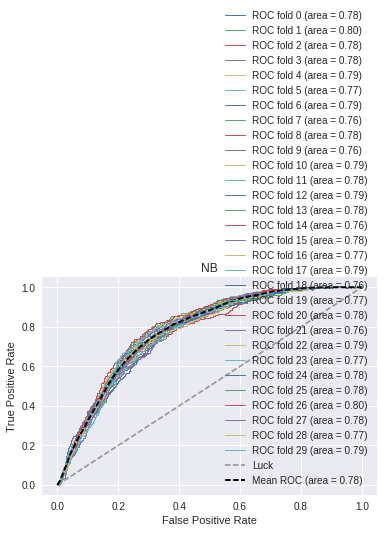

In [93]:
from PIL import Image
myImage = Image.open("/home/abraham/Proyml-vf-img/NBcv.png");
myImage

Curvas ROC por iteración  del modelo NB, Naive Bayes,AUC promedio=0.78

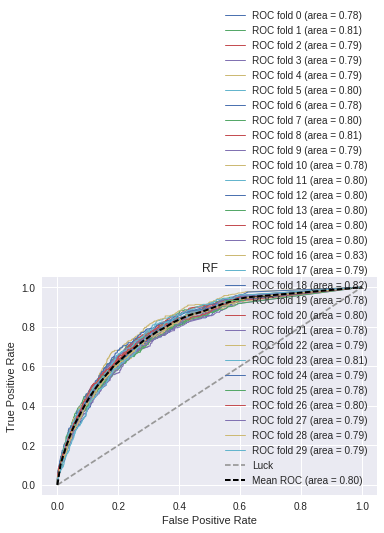

In [94]:
from PIL import Image
myImage = Image.open("/home/abraham/Proyml-vf-img/RFcv.png");
myImage

Curvas ROC por iteración  del modelo RF, Random Forest,AUC promedio=0.80

# [Apéndice A](#Apéndice A) 

Diagrama de caja y brazos de cada modelo,**construido con la seleccion de variables de correlación con el target** con respecto a su AUC.

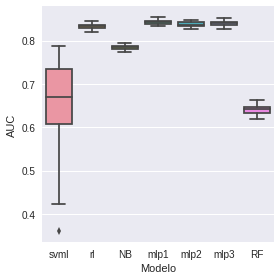

In [45]:
from PIL import Image
myImage = Image.open("/home/abraham/Proyml-vf-img/corrbox.png");
myImage

Diagrama de caja y brazos de cada modelo,**construido con la seleccion de variables más importantes de acuerdo con él árbol de decisión** con respecto a su AUC.

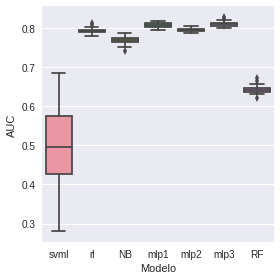

In [46]:
from PIL import Image
myImage = Image.open("/home/abraham/Proyml-vf-img/dtbox.png");
myImage

Diagrama de caja y brazos de cada modelo,**construido con la seleccion de variables relevantes del ANOVA-Fvalue** con respecto a su AUC.

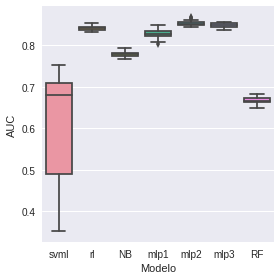

In [48]:
from PIL import Image
myImage = Image.open("/home/abraham/Proyml-vf-img/Fbox.png");
myImage

Diagrama de caja y brazos de cada modelo,**construido con la seleccion de variables AUC o ídice ROC** con respecto a su AUC.

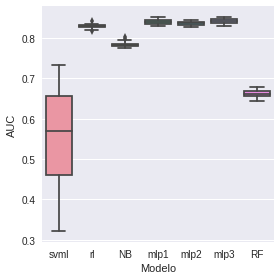

In [51]:
from PIL import Image
myImage = Image.open("/home/abraham/Proyml-vf-img/aucbox.png");
myImage

# [Apéndice B](#Apéndice B)

**1.-Output gridsearchcv de SVM**

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV]  C=0.1, gamma=0.1, kernel=linear, score=0.6701451343741653, total=   5.1s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s
[CV]  C=0.1, gamma=0.1, kernel=linear, score=0.5584316983605012, total=   5.2s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.0s remaining:    0.0s
[CV]  C=0.1, gamma=0.1, kernel=linear, score=0.5481613970284386, total=   5.2s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV]  C=0.1, gamma=0.01, kernel=linear, score=0.6701451343741653, total=   5.2s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV]  C=0.1, gamma=0.01, kernel=linear, score=0.5584316983605012, total=   5.1s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV]  C=0.1, gamma=0.01, kernel=linear, score=0.5481613970284386, total=   5.1s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV]  C=0.1, gamma=0.001, kernel=linear, score=0.6701451343741653, total=   5.4s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV]  C=0.1, gamma=0.001, kernel=linear, score=0.5584316983605012, total=   5.2s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV]  C=0.1, gamma=0.001, kernel=linear, score=0.5481613970284386, total=   5.8s
[CV] C=0.1, gamma=0.0001, kernel=linear ..............................
[CV]  C=0.1, gamma=0.0001, kernel=linear, score=0.6701451343741653, total=   5.7s
[CV] C=0.1, gamma=0.0001, kernel=linear ..............................
[CV]  C=0.1, gamma=0.0001, kernel=linear, score=0.5584316983605012, total=   5.6s
[CV] C=0.1, gamma=0.0001, kernel=linear ..............................
[CV]  C=0.1, gamma=0.0001, kernel=linear, score=0.5481613970284386, total=   5.5s
[CV] C=0.5, gamma=0.1, kernel=linear .................................
[CV]  C=0.5, gamma=0.1, kernel=linear, score=0.3933815385838305, total=   7.9s
[CV] C=0.5, gamma=0.1, kernel=linear .................................
[CV]  C=0.5, gamma=0.1, kernel=linear, score=0.6174610983841348, total=   7.4s
[CV] C=0.5, gamma=0.1, kernel=linear .................................
[CV]  C=0.5, gamma=0.1, kernel=linear, score=0.6334799420852012, total=   7.0s
[CV] C=0.5, gamma=0.01, kernel=linear ................................
[CV]  C=0.5, gamma=0.01, kernel=linear, score=0.3933815385838305, total=   7.7s
[CV] C=0.5, gamma=0.01, kernel=linear ................................
[CV]  C=0.5, gamma=0.01, kernel=linear, score=0.6174610983841348, total=   7.1s
[CV] C=0.5, gamma=0.01, kernel=linear ................................
[CV]  C=0.5, gamma=0.01, kernel=linear, score=0.6334799420852012, total=   7.0s
[CV] C=0.5, gamma=0.001, kernel=linear ...............................
[CV]  C=0.5, gamma=0.001, kernel=linear, score=0.3933815385838305, total=   7.0s
[CV] C=0.5, gamma=0.001, kernel=linear ...............................
[CV]  C=0.5, gamma=0.001, kernel=linear, score=0.6174610983841348, total=   7.2s
[CV] C=0.5, gamma=0.001, kernel=linear ...............................
[CV]  C=0.5, gamma=0.001, kernel=linear, score=0.6334799420852012, total=   9.1s
[CV] C=0.5, gamma=0.0001, kernel=linear ..............................
[CV]  C=0.5, gamma=0.0001, kernel=linear, score=0.3933815385838305, total=   7.6s
[CV] C=0.5, gamma=0.0001, kernel=linear ..............................
[CV]  C=0.5, gamma=0.0001, kernel=linear, score=0.6174610983841348, total=   7.3s
[CV] C=0.5, gamma=0.0001, kernel=linear ..............................
[CV]  C=0.5, gamma=0.0001, kernel=linear, score=0.6334799420852012, total=   7.1s
[CV] C=1.0, gamma=0.1, kernel=linear .................................
[CV]  C=1.0, gamma=0.1, kernel=linear, score=0.5875109722624114, total=  11.5s
[CV] C=1.0, gamma=0.1, kernel=linear .................................
[CV]  C=1.0, gamma=0.1, kernel=linear, score=0.42917475149807977, total=  11.2s
[CV] C=1.0, gamma=0.1, kernel=linear .................................
[CV]  C=1.0, gamma=0.1, kernel=linear, score=0.6116885972542876, total=  11.1s
[CV] C=1.0, gamma=0.01, kernel=linear ................................
[CV]  C=1.0, gamma=0.01, kernel=linear, score=0.5875109722624114, total=  12.2s
[CV] C=1.0, gamma=0.01, kernel=linear ................................
[CV]  C=1.0, gamma=0.01, kernel=linear, score=0.42917475149807977, total=  10.2s
[CV] C=1.0, gamma=0.01, kernel=linear ................................
[CV]  C=1.0, gamma=0.01, kernel=linear, score=0.6116885972542876, total=  11.0s
[CV] C=1.0, gamma=0.001, kernel=linear ...............................
[CV]  C=1.0, gamma=0.001, kernel=linear, score=0.5875109722624114, total=  13.7s
[CV] C=1.0, gamma=0.001, kernel=linear ...............................
[CV]  C=1.0, gamma=0.001, kernel=linear, score=0.42917475149807977, total=  11.3s
[CV] C=1.0, gamma=0.001, kernel=linear ...............................
[CV]  C=1.0, gamma=0.001, kernel=linear, score=0.6116885972542876, total=  11.2s
[CV] C=1.0, gamma=0.0001, kernel=linear ..............................
[CV]  C=1.0, gamma=0.0001, kernel=linear, score=0.5875109722624114, total=  12.9s
[CV] C=1.0, gamma=0.0001, kernel=linear ..............................
[CV]  C=1.0, gamma=0.0001, kernel=linear, score=0.42917475149807977, total=  10.3s
[CV] C=1.0, gamma=0.0001, kernel=linear ..............................
[CV]  C=1.0, gamma=0.0001, kernel=linear, score=0.6116885972542876, total=  10.6s
[CV] C=1.5, gamma=0.1, kernel=linear .................................
[CV]  C=1.5, gamma=0.1, kernel=linear, score=0.640538625998894, total=  12.7s
[CV] C=1.5, gamma=0.1, kernel=linear .................................
[CV]  C=1.5, gamma=0.1, kernel=linear, score=0.7336473063469079, total=  13.4s
[CV] C=1.5, gamma=0.1, kernel=linear .................................
[CV]  C=1.5, gamma=0.1, kernel=linear, score=0.5052276771430319, total=  12.8s
[CV] C=1.5, gamma=0.01, kernel=linear ................................
[CV]  C=1.5, gamma=0.01, kernel=linear, score=0.640538625998894, total=  13.2s
[CV] C=1.5, gamma=0.01, kernel=linear ................................
[CV]  C=1.5, gamma=0.01, kernel=linear, score=0.7336473063469079, total=  14.1s
[CV] C=1.5, gamma=0.01, kernel=linear ................................
[CV]  C=1.5, gamma=0.01, kernel=linear, score=0.5052276771430319, total=  13.0s
[CV] C=1.5, gamma=0.001, kernel=linear ...............................
[CV]  C=1.5, gamma=0.001, kernel=linear, score=0.640538625998894, total=  13.5s
[CV] C=1.5, gamma=0.001, kernel=linear ...............................
[CV]  C=1.5, gamma=0.001, kernel=linear, score=0.7336473063469079, total=  13.7s
[CV] C=1.5, gamma=0.001, kernel=linear ...............................
[CV]  C=1.5, gamma=0.001, kernel=linear, score=0.5052276771430319, total=  13.6s
[CV] C=1.5, gamma=0.0001, kernel=linear ..............................
[CV]  C=1.5, gamma=0.0001, kernel=linear, score=0.640538625998894, total=  14.1s
[CV] C=1.5, gamma=0.0001, kernel=linear ..............................
[CV]  C=1.5, gamma=0.0001, kernel=linear, score=0.7336473063469079, total=  14.0s
[CV] C=1.5, gamma=0.0001, kernel=linear ..............................
[CV]  C=1.5, gamma=0.0001, kernel=linear, score=0.5052276771430319, total=  14.9s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 11.0min finished
Out[60]:
{'C': 1.5, 'gamma': 0.1, 'kernel': 'linear'}

**2.-Output gridsearchcv de Regresión Logística**

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=0.01, penalty=l1 ..............................................
[CV] ..... C=0.01, penalty=l1, score=0.7773153594224772, total=   0.9s
[CV] C=0.01, penalty=l1 ..............................................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[CV] ..... C=0.01, penalty=l1, score=0.7828854021980216, total=   0.2s
[CV] C=0.01, penalty=l1 ..............................................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[CV] ..... C=0.01, penalty=l1, score=0.7987257311142174, total=   0.2s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ..... C=0.01, penalty=l2, score=0.8049457700019922, total=   0.5s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ...... C=0.01, penalty=l2, score=0.805355596359066, total=   0.3s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ..... C=0.01, penalty=l2, score=0.8268656484393421, total=   0.3s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ...... C=0.1, penalty=l1, score=0.7991038733358635, total=   0.3s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ....... C=0.1, penalty=l1, score=0.798828363861681, total=   0.3s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ...... C=0.1, penalty=l1, score=0.8223480609454701, total=   0.3s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ...... C=0.1, penalty=l2, score=0.7988058470586582, total=   0.3s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ...... C=0.1, penalty=l2, score=0.7982814270660057, total=   0.4s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ...... C=0.1, penalty=l2, score=0.8230060787706118, total=   0.3s
[CV] C=1, penalty=l1 .................................................
[CV] ........ C=1, penalty=l1, score=0.7970536779314419, total=   0.4s
[CV] C=1, penalty=l1 .................................................
[CV] ........ C=1, penalty=l1, score=0.7958167198827406, total=   0.4s
[CV] C=1, penalty=l1 .................................................
[CV] ........ C=1, penalty=l1, score=0.8213044383593787, total=   0.4s
[CV] C=1, penalty=l2 .................................................
[CV] ........ C=1, penalty=l2, score=0.7968950012044648, total=   0.4s
[CV] C=1, penalty=l2 .................................................
[CV] ........ C=1, penalty=l2, score=0.7956465118402981, total=   0.4s
[CV] C=1, penalty=l2 .................................................
[CV] ........ C=1, penalty=l2, score=0.8212263458046415, total=   0.3s
[CV] C=10, penalty=l1 ................................................
[CV] ....... C=10, penalty=l1, score=0.7966828869543131, total=   0.4s
[CV] C=10, penalty=l1 ................................................
[CV] ....... C=10, penalty=l1, score=0.7953511526114576, total=   0.4s
[CV] C=10, penalty=l1 ................................................
[CV] ........ C=10, penalty=l1, score=0.821030082090092, total=   0.3s
[CV] C=10, penalty=l2 ................................................
[CV] ....... C=10, penalty=l2, score=0.7966706484285976, total=   0.3s
[CV] C=10, penalty=l2 ................................................
[CV] ....... C=10, penalty=l2, score=0.7953393722474785, total=   0.3s
[CV] C=10, penalty=l2 ................................................
[CV] ....... C=10, penalty=l2, score=0.8210201838891416, total=   0.3s
[CV] C=100, penalty=l1 ...............................................
[CV] ....... C=100, penalty=l1, score=0.796646474310971, total=   0.4s
[CV] C=100, penalty=l1 ...............................................
[CV] ...... C=100, penalty=l1, score=0.7953072495024011, total=   0.4s
[CV] C=100, penalty=l1 ...............................................
[CV] ...... C=100, penalty=l1, score=0.8209989908085791, total=   0.4s
[CV] C=100, penalty=l2 ...............................................
[CV] ...... C=100, penalty=l2, score=0.7966451414022296, total=   0.4s
[CV] C=100, penalty=l2 ...............................................
[CV] ...... C=100, penalty=l2, score=0.7953071280553498, total=   0.4s
[CV] C=100, penalty=l2 ...............................................
[CV] ...... C=100, penalty=l2, score=0.8209978977557134, total=   0.3s
[CV] C=100000.0, penalty=l1 ..........................................
[CV] .. C=100000.0, penalty=l1, score=0.796642536171508, total=   0.4s
[CV] C=100000.0, penalty=l1 ..........................................
[CV] . C=100000.0, penalty=l1, score=0.7953023308968221, total=   0.4s
[CV] C=100000.0, penalty=l1 ..........................................
[CV] . C=100000.0, penalty=l1, score=0.8209954687493453, total=   0.4s
[CV] C=100000.0, penalty=l2 ..........................................
[CV] . C=100000.0, penalty=l2, score=0.7966416273700935, total=   0.3s
[CV] C=100000.0, penalty=l2 ..........................................
[CV] . C=100000.0, penalty=l2, score=0.7953042133261177, total=   0.3s
[CV] C=100000.0, penalty=l2 ..........................................
[CV] . C=100000.0, penalty=l2, score=0.8209967439776886, total=   0.3s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   13.8s finished
Out[63]:
{'C': 0.01, 'penalty': 'l2'}

**3.-Output gridsearchcv de mlp1**

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] activation=relu, hidden_layer_sizes=(3,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=relu, hidden_layer_sizes=(3,), max_iter=40000, random_state=0, verbose=0, score=0.7903407254028656, total=   2.9s
[CV] activation=relu, hidden_layer_sizes=(3,), max_iter=40000, random_state=0, verbose=0 
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
[CV]  activation=relu, hidden_layer_sizes=(3,), max_iter=40000, random_state=0, verbose=0, score=0.8162531617221725, total=   3.9s
[CV] activation=relu, hidden_layer_sizes=(3,), max_iter=40000, random_state=0, verbose=0 
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.8s remaining:    0.0s
[CV]  activation=relu, hidden_layer_sizes=(3,), max_iter=40000, random_state=0, verbose=0, score=0.8353283673512638, total=   3.3s
[CV] activation=relu, hidden_layer_sizes=(10,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=relu, hidden_layer_sizes=(10,), max_iter=40000, random_state=0, verbose=0, score=0.8314291520228465, total=   3.7s
[CV] activation=relu, hidden_layer_sizes=(10,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=relu, hidden_layer_sizes=(10,), max_iter=40000, random_state=0, verbose=0, score=0.8284546433519094, total=   3.8s
[CV] activation=relu, hidden_layer_sizes=(10,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=relu, hidden_layer_sizes=(10,), max_iter=40000, random_state=0, verbose=0, score=0.8469690160198436, total=   4.7s
[CV] activation=relu, hidden_layer_sizes=(50,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=relu, hidden_layer_sizes=(50,), max_iter=40000, random_state=0, verbose=0, score=0.8355366920694838, total=   9.9s
[CV] activation=relu, hidden_layer_sizes=(50,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=relu, hidden_layer_sizes=(50,), max_iter=40000, random_state=0, verbose=0, score=0.8344461729058671, total=  10.1s
[CV] activation=relu, hidden_layer_sizes=(50,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=relu, hidden_layer_sizes=(50,), max_iter=40000, random_state=0, verbose=0, score=0.8397720523263839, total=  15.5s
[CV] activation=relu, hidden_layer_sizes=(100,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=relu, hidden_layer_sizes=(100,), max_iter=40000, random_state=0, verbose=0, score=0.8063907036643357, total=  56.2s
[CV] activation=relu, hidden_layer_sizes=(100,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=relu, hidden_layer_sizes=(100,), max_iter=40000, random_state=0, verbose=0, score=0.8161411268173184, total=  49.2s
[CV] activation=relu, hidden_layer_sizes=(100,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=relu, hidden_layer_sizes=(100,), max_iter=40000, random_state=0, verbose=0, score=0.8162342519167441, total= 1.1min
[CV] activation=tanh, hidden_layer_sizes=(3,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(3,), max_iter=40000, random_state=0, verbose=0, score=0.7953601567888435, total=   2.9s
[CV] activation=tanh, hidden_layer_sizes=(3,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(3,), max_iter=40000, random_state=0, verbose=0, score=0.807407565738378, total=   3.3s
[CV] activation=tanh, hidden_layer_sizes=(3,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(3,), max_iter=40000, random_state=0, verbose=0, score=0.8203578545776962, total=   2.9s
[CV] activation=tanh, hidden_layer_sizes=(10,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(10,), max_iter=40000, random_state=0, verbose=0, score=0.817630698972497, total=   5.0s
[CV] activation=tanh, hidden_layer_sizes=(10,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(10,), max_iter=40000, random_state=0, verbose=0, score=0.8286460439048093, total=   7.7s
[CV] activation=tanh, hidden_layer_sizes=(10,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(10,), max_iter=40000, random_state=0, verbose=0, score=0.8383108835456011, total=   4.9s
[CV] activation=tanh, hidden_layer_sizes=(50,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(50,), max_iter=40000, random_state=0, verbose=0, score=0.8195534198318403, total=  35.8s
[CV] activation=tanh, hidden_layer_sizes=(50,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(50,), max_iter=40000, random_state=0, verbose=0, score=0.8162768438971825, total=  44.6s
[CV] activation=tanh, hidden_layer_sizes=(50,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(50,), max_iter=40000, random_state=0, verbose=0, score=0.8283670172755184, total= 1.0min
[CV] activation=tanh, hidden_layer_sizes=(100,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(100,), max_iter=40000, random_state=0, verbose=0, score=0.7664598476994238, total= 2.8min
[CV] activation=tanh, hidden_layer_sizes=(100,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(100,), max_iter=40000, random_state=0, verbose=0, score=0.747921828419363, total= 3.2min
[CV] activation=tanh, hidden_layer_sizes=(100,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(100,), max_iter=40000, random_state=0, verbose=0, score=0.768802740939366, total= 3.6min
[CV] activation=logistic, hidden_layer_sizes=(3,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=logistic, hidden_layer_sizes=(3,), max_iter=40000, random_state=0, verbose=0, score=0.8095034696826272, total=   2.4s
[CV] activation=logistic, hidden_layer_sizes=(3,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=logistic, hidden_layer_sizes=(3,), max_iter=40000, random_state=0, verbose=0, score=0.8078484792582404, total=   2.4s
[CV] activation=logistic, hidden_layer_sizes=(3,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=logistic, hidden_layer_sizes=(3,), max_iter=40000, random_state=0, verbose=0, score=0.8326410361558205, total=   2.9s
[CV] activation=logistic, hidden_layer_sizes=(10,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=logistic, hidden_layer_sizes=(10,), max_iter=40000, random_state=0, verbose=0, score=0.8067191444955473, total=   2.2s
[CV] activation=logistic, hidden_layer_sizes=(10,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=logistic, hidden_layer_sizes=(10,), max_iter=40000, random_state=0, verbose=0, score=0.8059617993157916, total=   2.5s
[CV] activation=logistic, hidden_layer_sizes=(10,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=logistic, hidden_layer_sizes=(10,), max_iter=40000, random_state=0, verbose=0, score=0.8281961974026757, total=   1.9s
[CV] activation=logistic, hidden_layer_sizes=(50,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=logistic, hidden_layer_sizes=(50,), max_iter=40000, random_state=0, verbose=0, score=0.8050081137790289, total=   4.5s
[CV] activation=logistic, hidden_layer_sizes=(50,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=logistic, hidden_layer_sizes=(50,), max_iter=40000, random_state=0, verbose=0, score=0.8068875294645727, total=   7.3s
[CV] activation=logistic, hidden_layer_sizes=(50,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=logistic, hidden_layer_sizes=(50,), max_iter=40000, random_state=0, verbose=0, score=0.8291321542814972, total=   6.4s
[CV] activation=logistic, hidden_layer_sizes=(100,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=logistic, hidden_layer_sizes=(100,), max_iter=40000, random_state=0, verbose=0, score=0.8039834098907646, total=   7.3s
[CV] activation=logistic, hidden_layer_sizes=(100,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=logistic, hidden_layer_sizes=(100,), max_iter=40000, random_state=0, verbose=0, score=0.8067351134151506, total=  12.2s
[CV] activation=logistic, hidden_layer_sizes=(100,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=logistic, hidden_layer_sizes=(100,), max_iter=40000, random_state=0, verbose=0, score=0.8283858420748718, total=   7.1s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 17.2min finished
Out[67]:
{'activation': 'relu',
 'hidden_layer_sizes': (50,),
 'max_iter': 40000,
 'random_state': 0,
 'verbose': 0}

**4.-Output gridsearchcv de mlp2**

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] activation=logistic, hidden_layer_sizes=(12, 2), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=logistic, hidden_layer_sizes=(12, 2), max_iter=40000, random_state=0, verbose=0, score=0.8233728092433101, total=   6.5s
[CV] activation=logistic, hidden_layer_sizes=(12, 2), max_iter=40000, random_state=0, verbose=0 
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s
[CV]  activation=logistic, hidden_layer_sizes=(12, 2), max_iter=40000, random_state=0, verbose=0, score=0.8174029009571363, total=   5.7s
[CV] activation=logistic, hidden_layer_sizes=(12, 2), max_iter=40000, random_state=0, verbose=0 
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.4s remaining:    0.0s
[CV]  activation=logistic, hidden_layer_sizes=(12, 2), max_iter=40000, random_state=0, verbose=0, score=0.8371837031404441, total=   5.5s
[CV] activation=logistic, hidden_layer_sizes=(15, 3), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=logistic, hidden_layer_sizes=(15, 3), max_iter=40000, random_state=0, verbose=0, score=0.8263164776117378, total=   8.0s
[CV] activation=logistic, hidden_layer_sizes=(15, 3), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=logistic, hidden_layer_sizes=(15, 3), max_iter=40000, random_state=0, verbose=0, score=0.8220242041544366, total=   7.7s
[CV] activation=logistic, hidden_layer_sizes=(15, 3), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=logistic, hidden_layer_sizes=(15, 3), max_iter=40000, random_state=0, verbose=0, score=0.8448305795384511, total=   8.5s
[CV] activation=logistic, hidden_layer_sizes=(20, 4), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=logistic, hidden_layer_sizes=(20, 4), max_iter=40000, random_state=0, verbose=0, score=0.8323558265318636, total=   8.9s
[CV] activation=logistic, hidden_layer_sizes=(20, 4), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=logistic, hidden_layer_sizes=(20, 4), max_iter=40000, random_state=0, verbose=0, score=0.8313145999637359, total=   8.7s
[CV] activation=logistic, hidden_layer_sizes=(20, 4), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=logistic, hidden_layer_sizes=(20, 4), max_iter=40000, random_state=0, verbose=0, score=0.8471429936009648, total=   9.8s
[CV] activation=logistic, hidden_layer_sizes=(25, 2), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=logistic, hidden_layer_sizes=(25, 2), max_iter=40000, random_state=0, verbose=0, score=0.8273096157975375, total=   8.4s
[CV] activation=logistic, hidden_layer_sizes=(25, 2), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=logistic, hidden_layer_sizes=(25, 2), max_iter=40000, random_state=0, verbose=0, score=0.8251079876818685, total=   8.3s
[CV] activation=logistic, hidden_layer_sizes=(25, 2), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=logistic, hidden_layer_sizes=(25, 2), max_iter=40000, random_state=0, verbose=0, score=0.8490070130879114, total=   9.4s
[CV] activation=logistic, hidden_layer_sizes=(50, 3), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=logistic, hidden_layer_sizes=(50, 3), max_iter=40000, random_state=0, verbose=0, score=0.8331650838981232, total=  14.1s
[CV] activation=logistic, hidden_layer_sizes=(50, 3), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=logistic, hidden_layer_sizes=(50, 3), max_iter=40000, random_state=0, verbose=0, score=0.8305428039525186, total=  12.5s
[CV] activation=logistic, hidden_layer_sizes=(50, 3), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=logistic, hidden_layer_sizes=(50, 3), max_iter=40000, random_state=0, verbose=0, score=0.8382175489759035, total=  10.9s
[CV] activation=logistic, hidden_layer_sizes=(100,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=logistic, hidden_layer_sizes=(100,), max_iter=40000, random_state=0, verbose=0, score=0.8039834098907646, total=   7.0s
[CV] activation=logistic, hidden_layer_sizes=(100,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=logistic, hidden_layer_sizes=(100,), max_iter=40000, random_state=0, verbose=0, score=0.8067351134151506, total=  10.7s
[CV] activation=logistic, hidden_layer_sizes=(100,), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=logistic, hidden_layer_sizes=(100,), max_iter=40000, random_state=0, verbose=0, score=0.8283858420748718, total=   7.1s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  2.7min finished
Out[70]:
{'activation': 'logistic',
 'hidden_layer_sizes': (20, 4),
 'max_iter': 40000,
 'random_state': 0,
 'verbose': 0}

**5.-Output gridsearchcv de mlp3**

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] activation=tanh, hidden_layer_sizes=(12, 4), max_iter=400, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(12, 4), max_iter=400, random_state=0, verbose=0, score=0.8257272713613167, total=   6.6s
[CV] activation=tanh, hidden_layer_sizes=(12, 4), max_iter=400, random_state=0, verbose=0 
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s
[CV]  activation=tanh, hidden_layer_sizes=(12, 4), max_iter=400, random_state=0, verbose=0, score=0.8277660385708547, total=   9.4s
[CV] activation=tanh, hidden_layer_sizes=(12, 4), max_iter=400, random_state=0, verbose=0 
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.3s remaining:    0.0s
[CV]  activation=tanh, hidden_layer_sizes=(12, 4), max_iter=400, random_state=0, verbose=0, score=0.851151157734269, total=   7.0s
[CV] activation=tanh, hidden_layer_sizes=(12, 4), max_iter=4000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(12, 4), max_iter=4000, random_state=0, verbose=0, score=0.8257272713613167, total=   6.8s
[CV] activation=tanh, hidden_layer_sizes=(12, 4), max_iter=4000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(12, 4), max_iter=4000, random_state=0, verbose=0, score=0.8277660385708547, total=   9.4s
[CV] activation=tanh, hidden_layer_sizes=(12, 4), max_iter=4000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(12, 4), max_iter=4000, random_state=0, verbose=0, score=0.851151157734269, total=   7.4s
[CV] activation=tanh, hidden_layer_sizes=(12, 4), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(12, 4), max_iter=40000, random_state=0, verbose=0, score=0.8257272713613167, total=   6.4s
[CV] activation=tanh, hidden_layer_sizes=(12, 4), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(12, 4), max_iter=40000, random_state=0, verbose=0, score=0.8277660385708547, total=   9.1s
[CV] activation=tanh, hidden_layer_sizes=(12, 4), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(12, 4), max_iter=40000, random_state=0, verbose=0, score=0.851151157734269, total=   7.0s
[CV] activation=tanh, hidden_layer_sizes=(12, 4), max_iter=100000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(12, 4), max_iter=100000, random_state=0, verbose=0, score=0.8257272713613167, total=   6.5s
[CV] activation=tanh, hidden_layer_sizes=(12, 4), max_iter=100000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(12, 4), max_iter=100000, random_state=0, verbose=0, score=0.8277660385708547, total=   9.3s
[CV] activation=tanh, hidden_layer_sizes=(12, 4), max_iter=100000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(12, 4), max_iter=100000, random_state=0, verbose=0, score=0.851151157734269, total=   7.4s
[CV] activation=tanh, hidden_layer_sizes=(15, 3), max_iter=400, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(15, 3), max_iter=400, random_state=0, verbose=0, score=0.83539073856231, total=   8.9s
[CV] activation=tanh, hidden_layer_sizes=(15, 3), max_iter=400, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(15, 3), max_iter=400, random_state=0, verbose=0, score=0.8329336106050481, total=   9.5s
[CV] activation=tanh, hidden_layer_sizes=(15, 3), max_iter=400, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(15, 3), max_iter=400, random_state=0, verbose=0, score=0.8383790171742288, total=   9.3s
[CV] activation=tanh, hidden_layer_sizes=(15, 3), max_iter=4000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(15, 3), max_iter=4000, random_state=0, verbose=0, score=0.83539073856231, total=   8.8s
[CV] activation=tanh, hidden_layer_sizes=(15, 3), max_iter=4000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(15, 3), max_iter=4000, random_state=0, verbose=0, score=0.8329336106050481, total=  10.0s
[CV] activation=tanh, hidden_layer_sizes=(15, 3), max_iter=4000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(15, 3), max_iter=4000, random_state=0, verbose=0, score=0.8383790171742288, total=   8.6s
[CV] activation=tanh, hidden_layer_sizes=(15, 3), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(15, 3), max_iter=40000, random_state=0, verbose=0, score=0.83539073856231, total=   8.6s
[CV] activation=tanh, hidden_layer_sizes=(15, 3), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(15, 3), max_iter=40000, random_state=0, verbose=0, score=0.8329336106050481, total=   9.5s
[CV] activation=tanh, hidden_layer_sizes=(15, 3), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(15, 3), max_iter=40000, random_state=0, verbose=0, score=0.8383790171742288, total=   8.6s
[CV] activation=tanh, hidden_layer_sizes=(15, 3), max_iter=100000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(15, 3), max_iter=100000, random_state=0, verbose=0, score=0.83539073856231, total=   8.6s
[CV] activation=tanh, hidden_layer_sizes=(15, 3), max_iter=100000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(15, 3), max_iter=100000, random_state=0, verbose=0, score=0.8329336106050481, total=   9.6s
[CV] activation=tanh, hidden_layer_sizes=(15, 3), max_iter=100000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(15, 3), max_iter=100000, random_state=0, verbose=0, score=0.8383790171742288, total=   9.3s
[CV] activation=tanh, hidden_layer_sizes=(20, 4), max_iter=400, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(20, 4), max_iter=400, random_state=0, verbose=0, score=0.8305316197458555, total=  12.6s
[CV] activation=tanh, hidden_layer_sizes=(20, 4), max_iter=400, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(20, 4), max_iter=400, random_state=0, verbose=0, score=0.8354025684351098, total=   7.7s
[CV] activation=tanh, hidden_layer_sizes=(20, 4), max_iter=400, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(20, 4), max_iter=400, random_state=0, verbose=0, score=0.8405926921278757, total=   8.1s
[CV] activation=tanh, hidden_layer_sizes=(20, 4), max_iter=4000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(20, 4), max_iter=4000, random_state=0, verbose=0, score=0.8305316197458555, total=  11.6s
[CV] activation=tanh, hidden_layer_sizes=(20, 4), max_iter=4000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(20, 4), max_iter=4000, random_state=0, verbose=0, score=0.8354025684351098, total=   7.6s
[CV] activation=tanh, hidden_layer_sizes=(20, 4), max_iter=4000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(20, 4), max_iter=4000, random_state=0, verbose=0, score=0.8405926921278757, total=   8.1s
[CV] activation=tanh, hidden_layer_sizes=(20, 4), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(20, 4), max_iter=40000, random_state=0, verbose=0, score=0.8305316197458555, total=  11.8s
[CV] activation=tanh, hidden_layer_sizes=(20, 4), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(20, 4), max_iter=40000, random_state=0, verbose=0, score=0.8354025684351098, total=   7.7s
[CV] activation=tanh, hidden_layer_sizes=(20, 4), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(20, 4), max_iter=40000, random_state=0, verbose=0, score=0.8405926921278757, total=   8.1s
[CV] activation=tanh, hidden_layer_sizes=(20, 4), max_iter=100000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(20, 4), max_iter=100000, random_state=0, verbose=0, score=0.8305316197458555, total=  11.7s
[CV] activation=tanh, hidden_layer_sizes=(20, 4), max_iter=100000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(20, 4), max_iter=100000, random_state=0, verbose=0, score=0.8354025684351098, total=   8.1s
[CV] activation=tanh, hidden_layer_sizes=(20, 4), max_iter=100000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(20, 4), max_iter=100000, random_state=0, verbose=0, score=0.8405926921278757, total=   8.7s
[CV] activation=tanh, hidden_layer_sizes=(25, 3), max_iter=400, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(25, 3), max_iter=400, random_state=0, verbose=0, score=0.826612504525831, total=   9.5s
[CV] activation=tanh, hidden_layer_sizes=(25, 3), max_iter=400, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(25, 3), max_iter=400, random_state=0, verbose=0, score=0.8237990920861336, total=  10.8s
[CV] activation=tanh, hidden_layer_sizes=(25, 3), max_iter=400, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(25, 3), max_iter=400, random_state=0, verbose=0, score=0.8401261407297064, total=  11.3s
[CV] activation=tanh, hidden_layer_sizes=(25, 3), max_iter=4000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(25, 3), max_iter=4000, random_state=0, verbose=0, score=0.826612504525831, total=  10.0s
[CV] activation=tanh, hidden_layer_sizes=(25, 3), max_iter=4000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(25, 3), max_iter=4000, random_state=0, verbose=0, score=0.8237990920861336, total=  11.2s
[CV] activation=tanh, hidden_layer_sizes=(25, 3), max_iter=4000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(25, 3), max_iter=4000, random_state=0, verbose=0, score=0.8401261407297064, total=  11.3s
[CV] activation=tanh, hidden_layer_sizes=(25, 3), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(25, 3), max_iter=40000, random_state=0, verbose=0, score=0.826612504525831, total=   9.0s
[CV] activation=tanh, hidden_layer_sizes=(25, 3), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(25, 3), max_iter=40000, random_state=0, verbose=0, score=0.8237990920861336, total=  10.6s
[CV] activation=tanh, hidden_layer_sizes=(25, 3), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(25, 3), max_iter=40000, random_state=0, verbose=0, score=0.8401261407297064, total=  11.3s
[CV] activation=tanh, hidden_layer_sizes=(25, 3), max_iter=100000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(25, 3), max_iter=100000, random_state=0, verbose=0, score=0.826612504525831, total=   9.0s
[CV] activation=tanh, hidden_layer_sizes=(25, 3), max_iter=100000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(25, 3), max_iter=100000, random_state=0, verbose=0, score=0.8237990920861336, total=  10.6s
[CV] activation=tanh, hidden_layer_sizes=(25, 3), max_iter=100000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(25, 3), max_iter=100000, random_state=0, verbose=0, score=0.8401261407297064, total=  11.3s
[CV] activation=tanh, hidden_layer_sizes=(50, 3), max_iter=400, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(50, 3), max_iter=400, random_state=0, verbose=0, score=0.7836384967309807, total=  31.7s
[CV] activation=tanh, hidden_layer_sizes=(50, 3), max_iter=400, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(50, 3), max_iter=400, random_state=0, verbose=0, score=0.799165440152654, total=  24.2s
[CV] activation=tanh, hidden_layer_sizes=(50, 3), max_iter=400, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(50, 3), max_iter=400, random_state=0, verbose=0, score=0.812145991298449, total=  27.8s
[CV] activation=tanh, hidden_layer_sizes=(50, 3), max_iter=4000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(50, 3), max_iter=4000, random_state=0, verbose=0, score=0.7836384967309807, total=  32.1s
[CV] activation=tanh, hidden_layer_sizes=(50, 3), max_iter=4000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(50, 3), max_iter=4000, random_state=0, verbose=0, score=0.799165440152654, total=  24.3s
[CV] activation=tanh, hidden_layer_sizes=(50, 3), max_iter=4000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(50, 3), max_iter=4000, random_state=0, verbose=0, score=0.812145991298449, total=  27.3s
[CV] activation=tanh, hidden_layer_sizes=(50, 3), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(50, 3), max_iter=40000, random_state=0, verbose=0, score=0.7836384967309807, total=  31.6s
[CV] activation=tanh, hidden_layer_sizes=(50, 3), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(50, 3), max_iter=40000, random_state=0, verbose=0, score=0.799165440152654, total=  23.7s
[CV] activation=tanh, hidden_layer_sizes=(50, 3), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(50, 3), max_iter=40000, random_state=0, verbose=0, score=0.812145991298449, total=  27.3s
[CV] activation=tanh, hidden_layer_sizes=(50, 3), max_iter=100000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(50, 3), max_iter=100000, random_state=0, verbose=0, score=0.7836384967309807, total=  31.5s
[CV] activation=tanh, hidden_layer_sizes=(50, 3), max_iter=100000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(50, 3), max_iter=100000, random_state=0, verbose=0, score=0.799165440152654, total=  23.2s
[CV] activation=tanh, hidden_layer_sizes=(50, 3), max_iter=100000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(50, 3), max_iter=100000, random_state=0, verbose=0, score=0.812145991298449, total=  27.5s
[CV] activation=tanh, hidden_layer_sizes=(50, 2), max_iter=400, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(50, 2), max_iter=400, random_state=0, verbose=0, score=0.8252688719278272, total=  13.5s
[CV] activation=tanh, hidden_layer_sizes=(50, 2), max_iter=400, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(50, 2), max_iter=400, random_state=0, verbose=0, score=0.821187859035436, total=  12.5s
[CV] activation=tanh, hidden_layer_sizes=(50, 2), max_iter=400, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(50, 2), max_iter=400, random_state=0, verbose=0, score=0.8372776449617336, total=  19.4s
[CV] activation=tanh, hidden_layer_sizes=(50, 2), max_iter=4000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(50, 2), max_iter=4000, random_state=0, verbose=0, score=0.8252688719278272, total=  13.3s
[CV] activation=tanh, hidden_layer_sizes=(50, 2), max_iter=4000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(50, 2), max_iter=4000, random_state=0, verbose=0, score=0.821187859035436, total=  12.4s
[CV] activation=tanh, hidden_layer_sizes=(50, 2), max_iter=4000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(50, 2), max_iter=4000, random_state=0, verbose=0, score=0.8372776449617336, total=  21.0s
[CV] activation=tanh, hidden_layer_sizes=(50, 2), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(50, 2), max_iter=40000, random_state=0, verbose=0, score=0.8252688719278272, total=  13.7s
[CV] activation=tanh, hidden_layer_sizes=(50, 2), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(50, 2), max_iter=40000, random_state=0, verbose=0, score=0.821187859035436, total=  12.2s
[CV] activation=tanh, hidden_layer_sizes=(50, 2), max_iter=40000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(50, 2), max_iter=40000, random_state=0, verbose=0, score=0.8372776449617336, total=  19.3s
[CV] activation=tanh, hidden_layer_sizes=(50, 2), max_iter=100000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(50, 2), max_iter=100000, random_state=0, verbose=0, score=0.8252688719278272, total=  13.7s
[CV] activation=tanh, hidden_layer_sizes=(50, 2), max_iter=100000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(50, 2), max_iter=100000, random_state=0, verbose=0, score=0.821187859035436, total=  13.5s
[CV] activation=tanh, hidden_layer_sizes=(50, 2), max_iter=100000, random_state=0, verbose=0 
[CV]  activation=tanh, hidden_layer_sizes=(50, 2), max_iter=100000, random_state=0, verbose=0, score=0.8372776449617336, total=  20.2s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 16.1min finished
Out[73]:
{'activation': 'tanh',
 'hidden_layer_sizes': (15, 3),
 'max_iter': 400,
 'random_state': 0,
 'verbose': 0}

**6.-Output gridsearchcv de Random Forest**

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] criterion=gini, min_samples_split=2, n_estimators=10 ............
[CV]  criterion=gini, min_samples_split=2, n_estimators=10, score=0.6186216681522541, total=   5.7s
[CV] criterion=gini, min_samples_split=2, n_estimators=10 ............
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s
[CV]  criterion=gini, min_samples_split=2, n_estimators=10, score=0.6070639252342804, total=   6.1s
[CV] criterion=gini, min_samples_split=2, n_estimators=10 ............
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.0s remaining:    0.0s
[CV]  criterion=gini, min_samples_split=2, n_estimators=10, score=0.6109342996892269, total=   6.1s
[CV] criterion=gini, min_samples_split=2, n_estimators=15 ............
[CV]  criterion=gini, min_samples_split=2, n_estimators=15, score=0.6258862934328312, total=   8.7s
[CV] criterion=gini, min_samples_split=2, n_estimators=15 ............
[CV]  criterion=gini, min_samples_split=2, n_estimators=15, score=0.6326463215327687, total=   8.6s
[CV] criterion=gini, min_samples_split=2, n_estimators=15 ............
[CV]  criterion=gini, min_samples_split=2, n_estimators=15, score=0.6434755461909264, total=   9.1s
[CV] criterion=gini, min_samples_split=2, n_estimators=35 ............
[CV]  criterion=gini, min_samples_split=2, n_estimators=35, score=0.6765849617842946, total=  21.1s
[CV] criterion=gini, min_samples_split=2, n_estimators=35 ............
[CV]  criterion=gini, min_samples_split=2, n_estimators=35, score=0.7112796438589509, total=  21.0s
[CV] criterion=gini, min_samples_split=2, n_estimators=35 ............
[CV]  criterion=gini, min_samples_split=2, n_estimators=35, score=0.7160187626167904, total=  20.6s
[CV] criterion=gini, min_samples_split=2, n_estimators=50 ............
[CV]  criterion=gini, min_samples_split=2, n_estimators=50, score=0.7052839410670152, total=  30.9s
[CV] criterion=gini, min_samples_split=2, n_estimators=50 ............
[CV]  criterion=gini, min_samples_split=2, n_estimators=50, score=0.7223490567996929, total=  31.7s
[CV] criterion=gini, min_samples_split=2, n_estimators=50 ............
[CV]  criterion=gini, min_samples_split=2, n_estimators=50, score=0.7400997799380955, total=  31.1s
[CV] criterion=gini, min_samples_split=2, n_estimators=100 ...........
[CV]  criterion=gini, min_samples_split=2, n_estimators=100, score=0.7586813860990705, total=  59.5s
[CV] criterion=gini, min_samples_split=2, n_estimators=100 ...........
[CV]  criterion=gini, min_samples_split=2, n_estimators=100, score=0.758673262617954, total= 1.0min
[CV] criterion=gini, min_samples_split=2, n_estimators=100 ...........
[CV]  criterion=gini, min_samples_split=2, n_estimators=100, score=0.7758580024738215, total= 1.0min
[CV] criterion=gini, min_samples_split=2, n_estimators=200 ...........
[CV]  criterion=gini, min_samples_split=2, n_estimators=200, score=0.773027634348719, total= 2.0min
[CV] criterion=gini, min_samples_split=2, n_estimators=200 ...........
[CV]  criterion=gini, min_samples_split=2, n_estimators=200, score=0.7783320182641791, total= 2.0min
[CV] criterion=gini, min_samples_split=2, n_estimators=200 ...........
[CV]  criterion=gini, min_samples_split=2, n_estimators=200, score=0.7983146217864018, total= 2.1min
[CV] criterion=gini, min_samples_split=4, n_estimators=10 ............
[CV]  criterion=gini, min_samples_split=4, n_estimators=10, score=0.6002616681619479, total=   5.9s
[CV] criterion=gini, min_samples_split=4, n_estimators=10 ............
[CV]  criterion=gini, min_samples_split=4, n_estimators=10, score=0.6162802687040301, total=   5.7s
[CV] criterion=gini, min_samples_split=4, n_estimators=10 ............
[CV]  criterion=gini, min_samples_split=4, n_estimators=10, score=0.6275954919827913, total=   5.9s
[CV] criterion=gini, min_samples_split=4, n_estimators=15 ............
[CV]  criterion=gini, min_samples_split=4, n_estimators=15, score=0.6395610283172828, total=   8.3s
[CV] criterion=gini, min_samples_split=4, n_estimators=15 ............
[CV]  criterion=gini, min_samples_split=4, n_estimators=15, score=0.6396622569647151, total=   9.1s
[CV] criterion=gini, min_samples_split=4, n_estimators=15 ............
[CV]  criterion=gini, min_samples_split=4, n_estimators=15, score=0.675927526708595, total=   9.0s
[CV] criterion=gini, min_samples_split=4, n_estimators=35 ............
[CV]  criterion=gini, min_samples_split=4, n_estimators=35, score=0.710252812800965, total=  20.4s
[CV] criterion=gini, min_samples_split=4, n_estimators=35 ............
[CV]  criterion=gini, min_samples_split=4, n_estimators=35, score=0.697109505527116, total=  20.4s
[CV] criterion=gini, min_samples_split=4, n_estimators=35 ............
[CV]  criterion=gini, min_samples_split=4, n_estimators=35, score=0.7347236601433879, total=  21.5s
[CV] criterion=gini, min_samples_split=4, n_estimators=50 ............
[CV]  criterion=gini, min_samples_split=4, n_estimators=50, score=0.7241083688735274, total=  30.2s
[CV] criterion=gini, min_samples_split=4, n_estimators=50 ............
[CV]  criterion=gini, min_samples_split=4, n_estimators=50, score=0.7282931612801056, total=  30.7s
[CV] criterion=gini, min_samples_split=4, n_estimators=50 ............
[CV]  criterion=gini, min_samples_split=4, n_estimators=50, score=0.7572667824452551, total=  31.1s
[CV] criterion=gini, min_samples_split=4, n_estimators=100 ...........
[CV]  criterion=gini, min_samples_split=4, n_estimators=100, score=0.757079169205252, total=  59.6s
[CV] criterion=gini, min_samples_split=4, n_estimators=100 ...........
[CV]  criterion=gini, min_samples_split=4, n_estimators=100, score=0.7586751146854868, total=  58.6s
[CV] criterion=gini, min_samples_split=4, n_estimators=100 ...........
[CV]  criterion=gini, min_samples_split=4, n_estimators=100, score=0.7739481658542552, total= 1.0min
[CV] criterion=gini, min_samples_split=4, n_estimators=200 ...........
[CV]  criterion=gini, min_samples_split=4, n_estimators=200, score=0.7746129475362273, total= 2.0min
[CV] criterion=gini, min_samples_split=4, n_estimators=200 ...........
[CV]  criterion=gini, min_samples_split=4, n_estimators=200, score=0.7676479871790778, total= 2.0min
[CV] criterion=gini, min_samples_split=4, n_estimators=200 ...........
[CV]  criterion=gini, min_samples_split=4, n_estimators=200, score=0.8047882577459949, total= 2.1min
[CV] criterion=gini, min_samples_split=8, n_estimators=10 ............
[CV]  criterion=gini, min_samples_split=8, n_estimators=10, score=0.6578733162333259, total=   6.3s
[CV] criterion=gini, min_samples_split=8, n_estimators=10 ............
[CV]  criterion=gini, min_samples_split=8, n_estimators=10, score=0.6540219437819171, total=   6.0s
[CV] criterion=gini, min_samples_split=8, n_estimators=10 ............
[CV]  criterion=gini, min_samples_split=8, n_estimators=10, score=0.658230970450591, total=   6.4s
[CV] criterion=gini, min_samples_split=8, n_estimators=15 ............
[CV]  criterion=gini, min_samples_split=8, n_estimators=15, score=0.6635686535246711, total=   8.5s
[CV] criterion=gini, min_samples_split=8, n_estimators=15 ............
[CV]  criterion=gini, min_samples_split=8, n_estimators=15, score=0.6860455273419213, total=   8.3s
[CV] criterion=gini, min_samples_split=8, n_estimators=15 ............
[CV]  criterion=gini, min_samples_split=8, n_estimators=15, score=0.7088797914503712, total=   9.0s
[CV] criterion=gini, min_samples_split=8, n_estimators=35 ............
[CV]  criterion=gini, min_samples_split=8, n_estimators=35, score=0.7311404924588871, total=  20.7s
[CV] criterion=gini, min_samples_split=8, n_estimators=35 ............
[CV]  criterion=gini, min_samples_split=8, n_estimators=35, score=0.7430755445594697, total=  20.4s
[CV] criterion=gini, min_samples_split=8, n_estimators=35 ............
[CV]  criterion=gini, min_samples_split=8, n_estimators=35, score=0.7579948771041192, total=  20.8s
[CV] criterion=gini, min_samples_split=8, n_estimators=50 ............
[CV]  criterion=gini, min_samples_split=8, n_estimators=50, score=0.7356242157043791, total=  33.1s
[CV] criterion=gini, min_samples_split=8, n_estimators=50 ............
[CV]  criterion=gini, min_samples_split=8, n_estimators=50, score=0.7412662567504825, total=  29.8s
[CV] criterion=gini, min_samples_split=8, n_estimators=50 ............
[CV]  criterion=gini, min_samples_split=8, n_estimators=50, score=0.7713715062614622, total=  32.0s
[CV] criterion=gini, min_samples_split=8, n_estimators=100 ...........
[CV]  criterion=gini, min_samples_split=8, n_estimators=100, score=0.7686362756203236, total=  58.2s
[CV] criterion=gini, min_samples_split=8, n_estimators=100 ...........
[CV]  criterion=gini, min_samples_split=8, n_estimators=100, score=0.7689022619634758, total= 1.0min
[CV] criterion=gini, min_samples_split=8, n_estimators=100 ...........
[CV]  criterion=gini, min_samples_split=8, n_estimators=100, score=0.7916882013262497, total= 1.0min
[CV] criterion=gini, min_samples_split=8, n_estimators=200 ...........
[CV]  criterion=gini, min_samples_split=8, n_estimators=200, score=0.7764457879356734, total= 2.0min
[CV] criterion=gini, min_samples_split=8, n_estimators=200 ...........
[CV]  criterion=gini, min_samples_split=8, n_estimators=200, score=0.7850384762475678, total= 2.0min
[CV] criterion=gini, min_samples_split=8, n_estimators=200 ...........
[CV]  criterion=gini, min_samples_split=8, n_estimators=200, score=0.805756854397889, total= 2.1min
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed: 38.0min finished
Out[76]:
{'criterion': 'gini', 'min_samples_split': 8, 'n_estimators': 200}

# Referencias


https://statcompute.wordpress.com/2012/11/18/calculating-k-s-statistic-with-python/amp/%20Recibidos%20x/

https://www2.ulpgc.es/hege/almacen/download/5/5015/Complemento_3_Prueba_de_Bondad_de_Ajuste_de_Kolmogorov_Smirnov.pdf


In [28]:
#jupyter nbconvert --to pdf --template hidecode.tplx Proyecto_Final_ML17-Reporte.ipynb
